In [1]:
# current date, for retrieving data from proper location.
year = "2023"
month = "October"
day = "23"

## Imports and initialization

In [2]:
from matplotlib import gridspec
import scipy.signal
%config Completer.use_jedi = False
import numpy as np 
from numpy import array as arr
import pandas as pd
import plotly.offline as pltly
pltly.init_notebook_mode(connected=True)
from plotly import graph_objs as go
import math
import scipy.optimize as opt
from scipy import ndimage
from scipy.optimize import curve_fit
import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib.colors import ListedColormap
import warnings 
warnings.filterwarnings('module')
from datetime import datetime
import uncertainties.unumpy
import IPython
import pandas as pd
import pickle
from matplotlib.ticker import ScalarFormatter
from matplotlib.pyplot import *
from matplotlib import rcParams
from matplotlib import style
from mpl_toolkits.axes_grid1 import make_axes_locatable
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
%matplotlib inline

# ## set matplotlib plot defaults :D
# Style controls many default colors in matplotlib plots.
# Change the following if you don't like dark backgrounds. Many other options.
import matplotlib as mpl

if False:
    # My Dark Settings
    style.use(['dark_background'])
    c = '#0A0A0A'
    mpl.rcParams['axes.facecolor'] = '#000000'
    mpl.rcParams['figure.edgecolor'] = c
    mpl.rcParams['figure.facecolor'] = c
else:
    # My Light Settings
    style.use(['default'])
    c = '#FFFFFF'
    mpl.rcParams['axes.facecolor'] = c
    mpl.rcParams['figure.edgecolor'] = c
    mpl.rcParams['figure.facecolor'] = c  
# the default cycling of colors in this mode isn't very good.
#rcParams['axes.prop_cycle'] = ("cycler('color', ['r','c','g','#FFFFFF','b']) + cycler('marker', ['o','v','<','>','^'])")
### General
mpl.rcParams['figure.figsize'] = (25.0, 8.0)
mpl.rcParams['axes.grid'] = True
mpl.rcParams['axes.formatter.useoffset'] = False
mpl.rcParams['grid.alpha'] = 0.15
mpl.rcParams['axes.formatter.limits'] = (-3,3)
mpl.rcParams['image.cmap'] = 'viridis'
#rcParams['image.cmap'] = dark_viridis_cmap
# to see all available options, decomment this line.
# print(mpl.rcParams)
mpl.rcParams['font.size'] = 14
viridis = cm.get_cmap('viridis', 256)
dark_viridis = []
bl = 0.15
for i in range(256):
    dark_viridis.append(list(viridis(i)))
    dark_viridis[-1][0] = dark_viridis[-1][0] *(bl+(1-bl)*i/255)
    dark_viridis[-1][1] = dark_viridis[-1][1] *(bl+(1-bl)*i/255)
    dark_viridis[-1][2] = dark_viridis[-1][2] *(bl+(1-bl)*i/255)
dark_viridis_cmap = ListedColormap(dark_viridis)
import mpl_toolkits.axes_grid1
import matplotlib.gridspec as gridspec
from skimage.transform import iradon

In [3]:
import sys
sys.path.append("..")
from Analysis_Python_Files.fitters.Gaussian import dip, double_dip,arb_1d_sum, bump, bump2, bump3, bump2r, gaussian, bump3_Sym, gaussian_2d, poly_nom
from Analysis_Python_Files.fitters.Sinc_Squared import sinc_sq3_Sym, sinc_sq
from Analysis_Python_Files.fitters import decaying_cos, exponential_decay_fixed_limit as decay, linear, LargeBeamMotExpansion, n1State
import Analysis_Python_Files.PictureWindow as pw
import Analysis_Python_Files.ExpFile as exp
# import Analysis_Python_Files.UnitConversion as uc
exp.setPath(day, month, year)
import Analysis_Python_Files.PlotlyPlotters as pp
import Analysis_Python_Files.MatplotlibPlotters as mp
import Analysis_Python_Files.MatplotlibPlotters_pres as mp_pres
import Analysis_Python_Files.MainAnalysis as ma
import Analysis_Python_Files.AnalysisHelpers as ah
import Analysis_Python_Files.Miscellaneous as misc
import Analysis_Python_Files.PopulationAnalysis as pa
import Analysis_Python_Files.MarksConstants as mc
import Analysis_Python_Files.fitters as fitters
import Analysis_Python_Files.LoadingFunctions as lf
import Analysis_Python_Files.FreeSpaceImaging as fsi
import Analysis_Python_Files.TransferAnalysis as ta
import Analysis_Python_Files.LightShiftCalculations as lsc
import Analysis_Python_Files.CalibrationAnalysis as ca
# It's important to explicitly import calPoint here or else pickling doesn't work.
from Analysis_Python_Files.CalibrationAnalysis import calPoint 
from Analysis_Python_Files.TransferAnalysisOptions import TransferAnalysisOptions as ao
import Analysis_Python_Files.ThresholdOptions as to
import Analysis_Python_Files.TransferAnalysisOptions as tao
from importlib import reload
def reloadMyModules(day_=None, month_=None, year_=None):
    reload(exp)
    if day_ is None:
        day_ = day
    if month_ is None:
        month_ = month
    if year_ is None:
        year_ = year
    exp.setPath(day_,month_,year_)
    reload(lf)
    reload(misc)
    reload(ma)
    reload(ah)
    reload(pp)
    reload(mp)
    reload(fitters)
    reload(fsi)
    reload(ta)
    reload(pa)
    reload(tao)
    reload(to)
    reload(ca)
reloadMyModules();

In [4]:
atomlocs = [2, 2, 3, 3, 1]

In [5]:
loadNone = tao.condition([0,0,0], [0,1,2], [0,0,0])

loadOne = tao.condition([0,0,0], [0,1,2], [1,1,1], numRequired = 1, name = 'Load any one tweezer')
# tao.condition([0 = 1st pic, 1 = 2nd pic],

loadTwo = tao.condition([0,0,0], [0,1,2], [1,1,1], numRequired = 2, name = 'Load any two tweezers')
loadThree = tao.condition([0,0,0], [0,1,2], [1,1,1], numRequired = 3, name = 'Load all three tweezers')
loadOuter = tao.condition([0,0,0], [0,1,2], [1,0,1], numRequired = 2, name = 'Load outer tweezers')

finCenter = tao.condition([1],[1],[1], markerWhichPicList=[1], markerLocList=[1])
# 
# loadOpt= tao.TransferAnalysisOptions(atomlocs, atomlocs, 0,1, [[loadOne], [loadTwo], [loadThree]],[finCenter for _ in range(3)]);
loadOpt= tao.TransferAnalysisOptions(atomlocs, atomlocs, 0,1, [[loadOne], [loadTwo]],[finCenter for _ in range(2)]);
loadOneOpt = tao.TransferAnalysisOptions(atomlocs, atomlocs, 0,1, [[loadOne]],[finCenter for _ in range(1)]);
loadTwoOpt = tao.TransferAnalysisOptions(atomlocs, atomlocs, 0,1, [[loadTwo]],[finCenter for _ in range(1)]);
loadThreeOpt = tao.TransferAnalysisOptions(atomlocs, atomlocs, 0,1, [[loadThree]],[finCenter for _ in range(1)]);
loadOuterOpt = tao.TransferAnalysisOptions(atomlocs, atomlocs, 0,1, [[loadOuter]],[finCenter for _ in range(1)]);

### File 6 (3x1_Atom_Loading_And_Imaging):  

Number of Pictures: 800; Picture Dimensions: 5 x 10
Variations: 8;	Repetitions: 50;	Exp File Version: 4;
Experiment started at (H:M:S) 10:51:39: on (Y-M-D) 2023-10-26, And ended at 10:54:5: on 2023-10-26
Experiment Notes:  



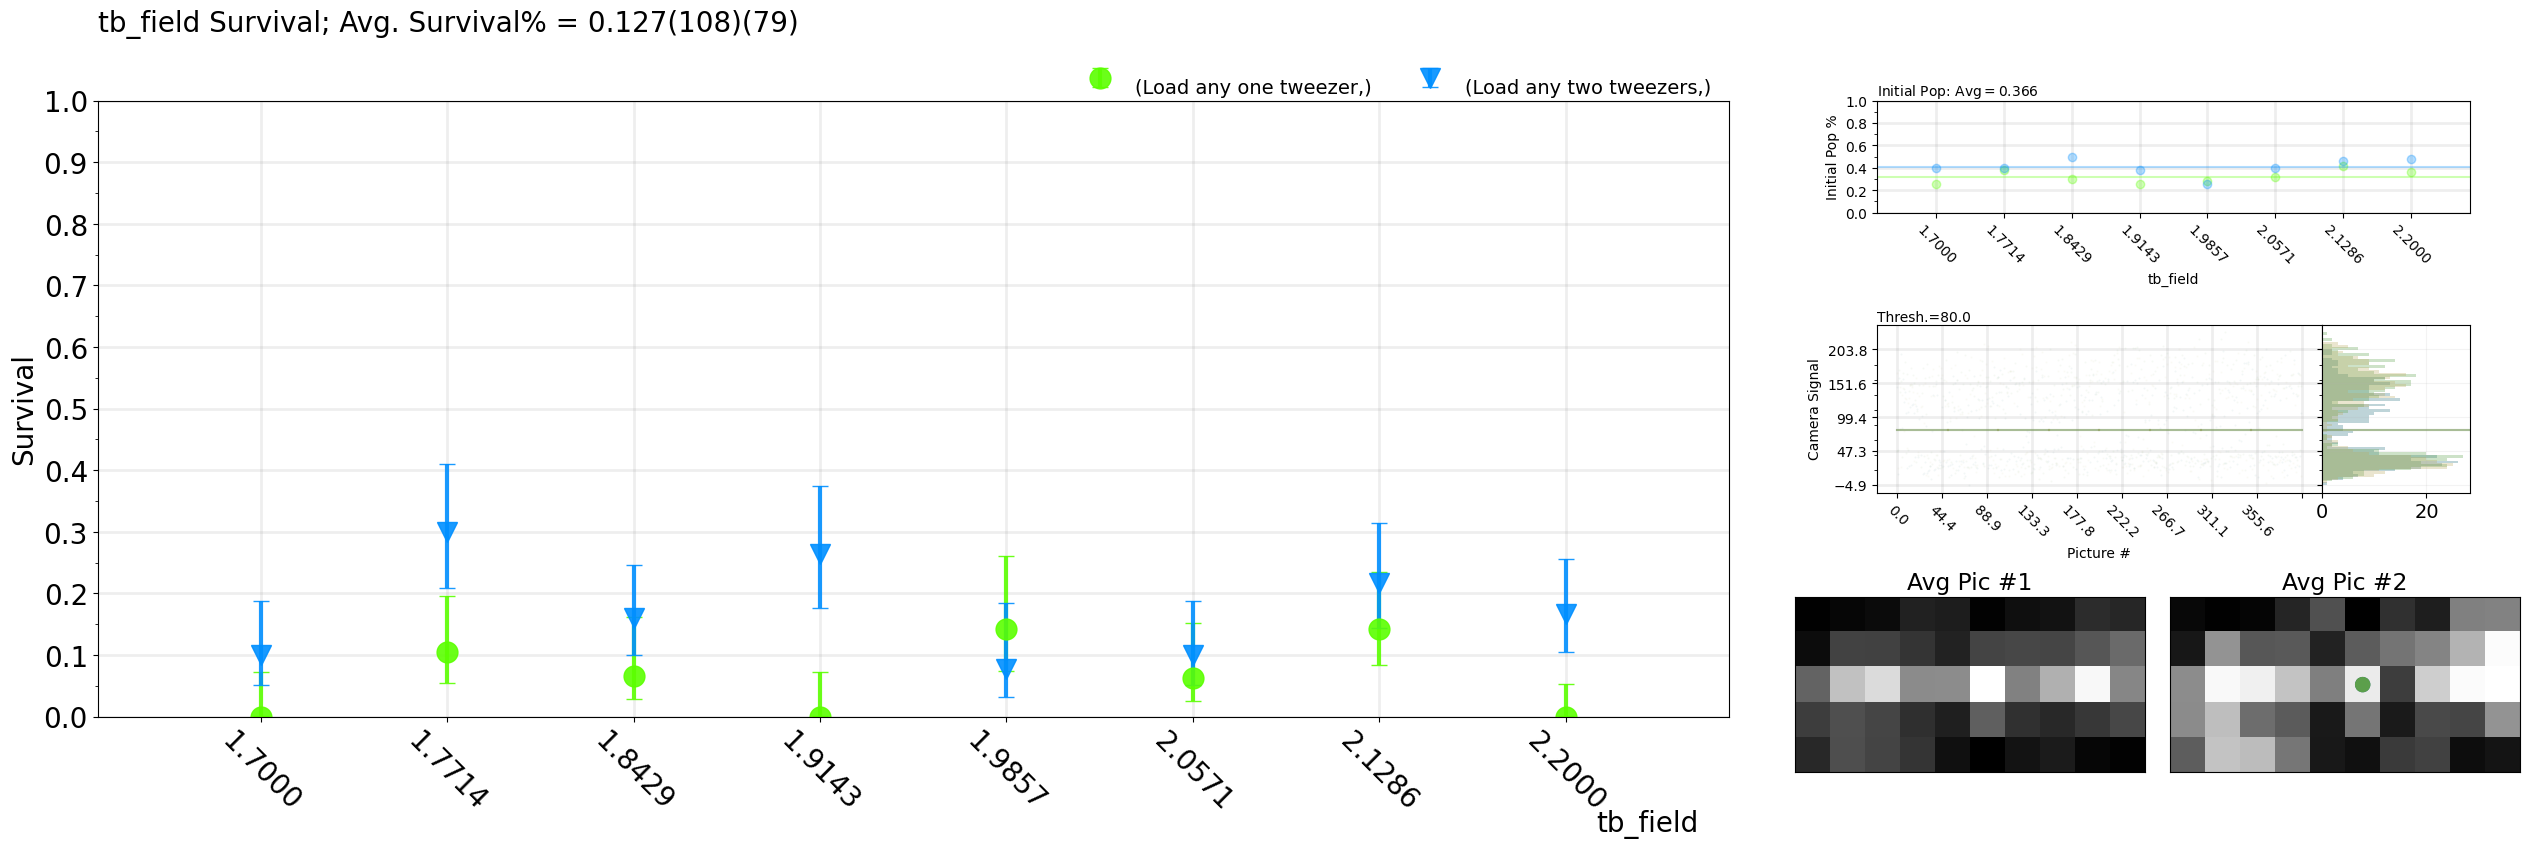

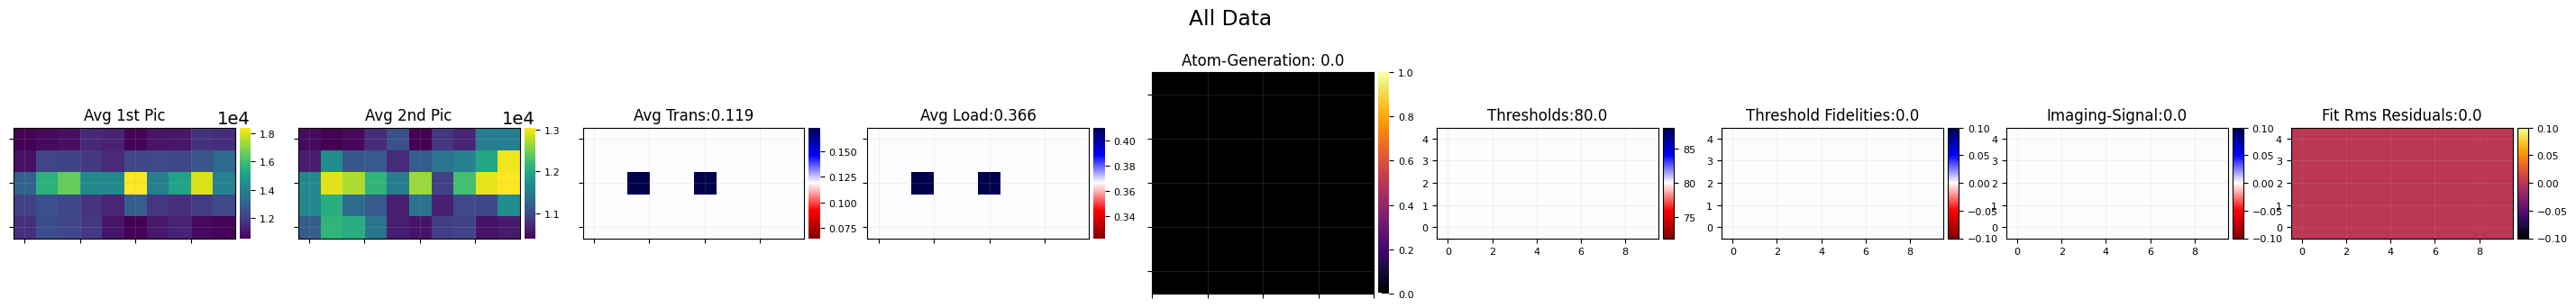

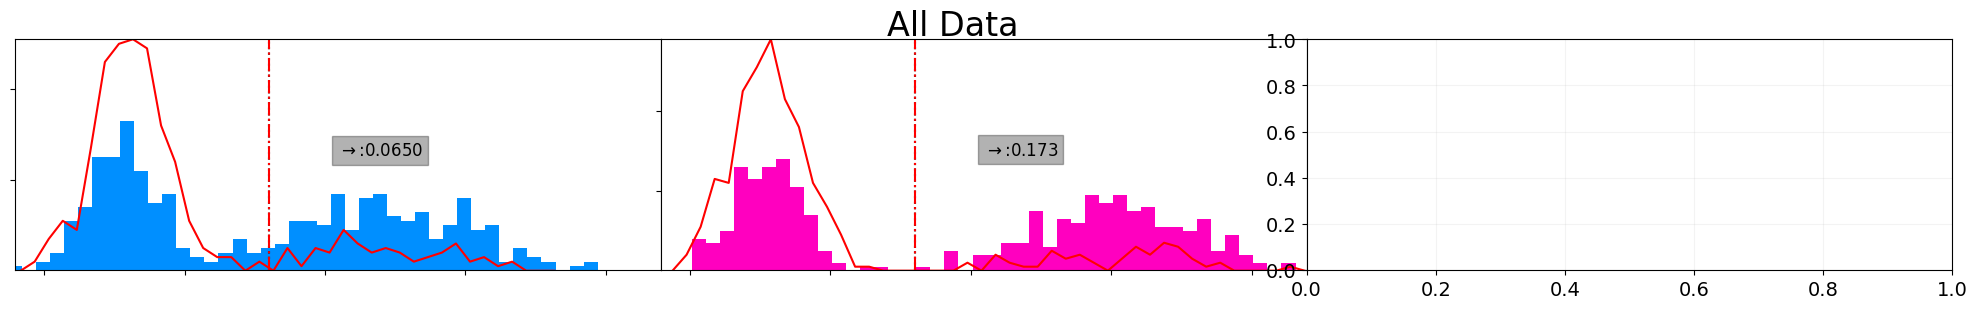

In [6]:
reloadMyModules(26,'October')
mp.Transfer(6, loadOpt, plotIndvHists = True, plotAvg=False, 
            tOptions = [to.ThresholdOptions(manualThreshold = True, manualThresholdValue = 80)]);

## temp-field comparisons

### $ \Delta = 100 \ \mathrm{(MHz) \ D1 \ F=2-2}$

Number of Pictures: 1600; Picture Dimensions: 5 x 10
Variations: 8;	Repetitions: 100;	Exp File Version: 4;
Experiment started at (H:M:S) 22:35:16: on (Y-M-D) 2023-10-24, And ended at 22:41:30: on 2023-10-24
Experiment Notes: HDF5 NOT ANNOTATED: please call exp.Annotate() to annotate this file.

Number of Pictures: 1600; Picture Dimensions: 5 x 10
Variations: 8;	Repetitions: 100;	Exp File Version: 4;
Experiment started at (H:M:S) 22:42:44: on (Y-M-D) 2023-10-24, And ended at 22:49:0: on 2023-10-24
Experiment Notes: HDF5 NOT ANNOTATED: please call exp.Annotate() to annotate this file.

Number of Pictures: 1600; Picture Dimensions: 5 x 10
Variations: 8;	Repetitions: 100;	Exp File Version: 4;
Experiment started at (H:M:S) 22:55:1: on (Y-M-D) 2023-10-24, And ended at 23:1:16: on 2023-10-24
Experiment Notes: HDF5 NOT ANNOTATED: please call exp.Annotate() to annotate this file.



<Figure size 30000x9600 with 0 Axes>

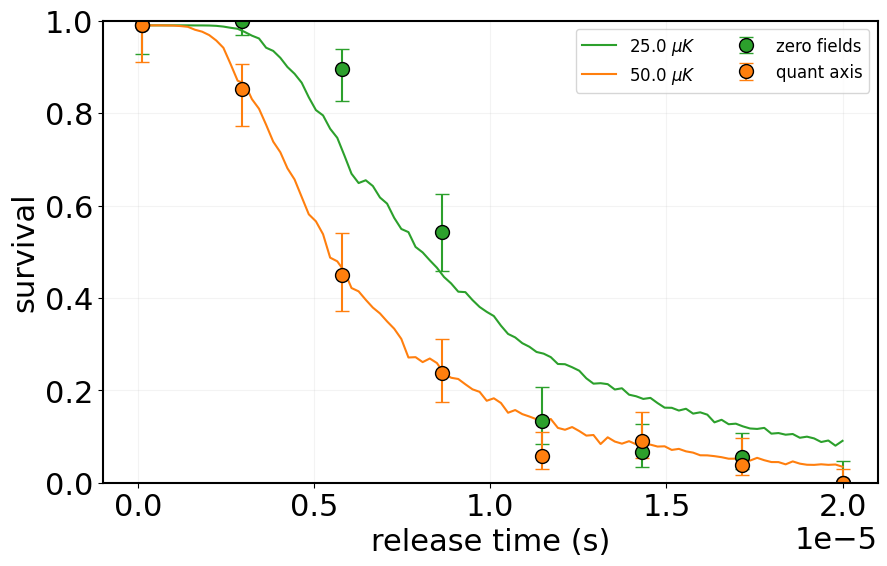

In [90]:
reloadMyModules(24,'october')
fileId = 54
threshold = 70

dataset1 = ta.standardTransferAnalysis(54, loadOneOpt, tOptions = [to.ThresholdOptions(manualThreshold = True, manualThresholdValue = threshold)]);
(tferAtomsVarAvg, tferAtomsVarErrs, loadAtomsVarAvg, initPicCounts, keyName, key1, repetitions, initThresholds, 
            fits, avgTferData1, avgTferErr1, avgFit, avgPics, genAvgs, genErrs, tferVarAvg, tferVarErr, initAtomImages, 
            tferAtomImages, tferPicCounts, tferThresholds, fitModules, basicInfoStr, ensembleHits, tOptions, analysisOpts,
            tferAtomsPs, tferAtomsPs, tferList, isAnnotated, hmm) = dataset1

color1 = 'tab:green'
upperbound = []
lowerbound = []
for i in np.arange(0,len(avgTferErr1)):
    up = avgTferErr1[i][0]
    lo = avgTferErr1[i][1]
    upperbound.append(up)  
    lowerbound.append(lo)
err1= [upperbound,lowerbound]

dataset2 = ta.standardTransferAnalysis(55, loadOneOpt, tOptions = [to.ThresholdOptions(manualThreshold = True, manualThresholdValue = threshold)]);
(tferAtomsVarAvg, tferAtomsVarErrs, loadAtomsVarAvg, initPicCounts, keyName, key2, repetitions, initThresholds, 
            fits, avgTferData2, avgTferErr2, avgFit, avgPics, genAvgs, genErrs, tferVarAvg, tferVarErr, initAtomImages, 
            tferAtomImages, tferPicCounts, tferThresholds, fitModules, basicInfoStr, ensembleHits, tOptions, analysisOpts,
            tferAtomsPs, tferAtomsPs, tferList, isAnnotated, hmm) = dataset2
color2 = 'tab:blue'
upperbound = []
lowerbound = []
for i in np.arange(0,len(avgTferErr2)):
    up = avgTferErr2[i][0]
    lo = avgTferErr2[i][1]
    upperbound.append(up)  
    lowerbound.append(lo)
err2= [upperbound,lowerbound]   


dataset3 = ta.standardTransferAnalysis(56, loadOneOpt, tOptions = [to.ThresholdOptions(manualThreshold = True, manualThresholdValue = threshold)]);
(tferAtomsVarAvg, tferAtomsVarErrs, loadAtomsVarAvg, initPicCounts, keyName, key3, repetitions, initThresholds, 
            fits, avgTferData3, avgTferErr3, avgFit, avgPics, genAvgs, genErrs, tferVarAvg, tferVarErr, initAtomImages, 
            tferAtomImages, tferPicCounts, tferThresholds, fitModules, basicInfoStr, ensembleHits, tOptions, analysisOpts,
            tferAtomsPs, tferAtomsPs, tferList, isAnnotated, hmm) = dataset3
color3 = 'tab:red'
upperbound = []
lowerbound = []
for i in np.arange(0,len(avgTferErr3)):
    up = avgTferErr3[i][0]
    lo = avgTferErr3[i][1]
    upperbound.append(up)  
    lowerbound.append(lo)
err3= [upperbound,lowerbound]  

plt.figure(dpi=1200)
font = {'family' : 'normal',
        'weight' : 'normal',
        'size'   : 22}

matplotlib.rc('font', **font)


fig, ax = plt.subplots(figsize=(10, 6))

t = np.linspace(key1[0], max(key1), len(key1))
ticks = np.arange(0,max(key1),100)
avgTferData1[0]=.99
avgTferData2[2]=.45
avgTferData2[0]=.99
avgTferData3[0]=.99
avgTferData3[3]=.6
tempGuess1 = 25e-6
tempGuess2 = 50e-6
tempGuess3 = 25e-6
color3 = 'tab:orange'
t_temp = np.linspace(0, 20e-6, 100)
ax.errorbar(key1*1e-3,avgTferData1, yerr=err1,ls='none',ecolor=color1,marker = 'o',markersize = 10,markerfacecolor=color1,markeredgecolor='k',capsize=5,label= 'zero fields')
ax.errorbar(key2*1e-3,avgTferData2, yerr=err2,ls='none',ecolor=color3,marker = 'o',markersize = 10,markerfacecolor=color3,markeredgecolor='k',capsize=5,label= 'quant axis')
# ax.errorbar(key3*1e-3,avgTferData3, yerr=err3,ls='none',ecolor=color3,marker = 'o',markersize = 10,markerfacecolor=color3,markeredgecolor='k',capsize=5,label= 'no fields')
ax.plot(t_temp, mp.get_survival_release_capture(t_temp, T=tempGuess1, initial_survival=.99, tweezer_depth=1e-3, verbose=True),color=color1,label= str(tempGuess1*1e6)+r'$ \ \mu K$')
ax.plot(t_temp, mp.get_survival_release_capture(t_temp, T=tempGuess2, initial_survival=.99, tweezer_depth=1e-3, verbose=True),color=color3,label= str(tempGuess2*1e6)+r'$ \ \mu K$')
# ax.plot(t_temp, mp.get_survival_release_capture(t_temp, T=tempGuess3, initial_survival=.99, tweezer_depth=1e-3, verbose=True),color=color3,label= str(tempGuess3*1e6)+r'$ \ \mu K$')
ax.grid(which='minor', alpha=.1)
plt.legend(loc=1, ncol = 2,prop={'size': 12})
plt.ylim(0,1)
plt.ylabel('survival')
plt.xlabel('release time (s)')
plt.rcParams["axes.linewidth"] = 1.5
plt.ticklabel_format(style='sci') 
# plt.title(r'U = 10 MHz,I=Isat, $ \Delta = 100 \ \mathrm{(MHz) \ D1 \ F=2-2}$',fontsize=15);

### $ \Delta = -100 \ \mathrm{(MHz) \ D1 \ F=2-2}$

Number of Pictures: 1600; Picture Dimensions: 5 x 10
Variations: 8;	Repetitions: 100;	Exp File Version: 4;
Experiment started at (H:M:S) 23:14:50: on (Y-M-D) 2023-10-24, And ended at 23:21:4: on 2023-10-24
Experiment Notes: HDF5 NOT ANNOTATED: please call exp.Annotate() to annotate this file.

Number of Pictures: 1600; Picture Dimensions: 5 x 10
Variations: 8;	Repetitions: 100;	Exp File Version: 4;
Experiment started at (H:M:S) 23:8:13: on (Y-M-D) 2023-10-24, And ended at 23:14:28: on 2023-10-24
Experiment Notes: HDF5 NOT ANNOTATED: please call exp.Annotate() to annotate this file.

Number of Pictures: 1600; Picture Dimensions: 5 x 10
Variations: 8;	Repetitions: 100;	Exp File Version: 4;
Experiment started at (H:M:S) 23:21:21: on (Y-M-D) 2023-10-24, And ended at 23:27:34: on 2023-10-24
Experiment Notes: HDF5 NOT ANNOTATED: please call exp.Annotate() to annotate this file.



<Figure size 30000x9600 with 0 Axes>

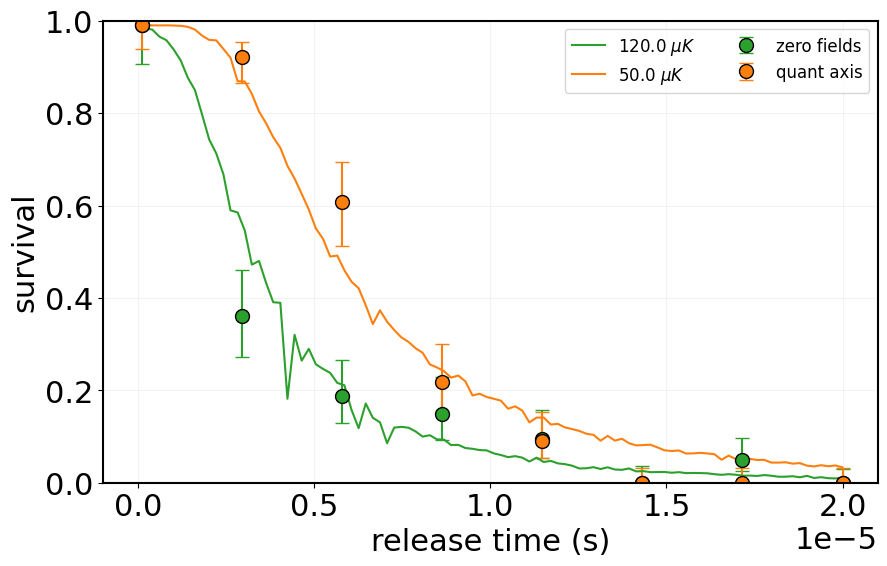

In [89]:
reloadMyModules(24,'october')
threshold = 70

dataset1 = ta.standardTransferAnalysis(58, loadOneOpt, tOptions = [to.ThresholdOptions(manualThreshold = True, manualThresholdValue = threshold)]);
(tferAtomsVarAvg, tferAtomsVarErrs, loadAtomsVarAvg, initPicCounts, keyName, key1, repetitions, initThresholds, 
            fits, avgTferData1, avgTferErr1, avgFit, avgPics, genAvgs, genErrs, tferVarAvg, tferVarErr, initAtomImages, 
            tferAtomImages, tferPicCounts, tferThresholds, fitModules, basicInfoStr, ensembleHits, tOptions, analysisOpts,
            tferAtomsPs, tferAtomsPs, tferList, isAnnotated, hmm) = dataset1

color1 = 'tab:green'
upperbound = []
lowerbound = []
for i in np.arange(0,len(avgTferErr1)):
    up = avgTferErr1[i][0]
    lo = avgTferErr1[i][1]
    upperbound.append(up)  
    lowerbound.append(lo)
err1= [upperbound,lowerbound]

dataset2 = ta.standardTransferAnalysis(57, loadOneOpt, tOptions = [to.ThresholdOptions(manualThreshold = True, manualThresholdValue = threshold)]);
(tferAtomsVarAvg, tferAtomsVarErrs, loadAtomsVarAvg, initPicCounts, keyName, key2, repetitions, initThresholds, 
            fits, avgTferData2, avgTferErr2, avgFit, avgPics, genAvgs, genErrs, tferVarAvg, tferVarErr, initAtomImages, 
            tferAtomImages, tferPicCounts, tferThresholds, fitModules, basicInfoStr, ensembleHits, tOptions, analysisOpts,
            tferAtomsPs, tferAtomsPs, tferList, isAnnotated, hmm) = dataset2
color2 = 'tab:blue'
upperbound = []
lowerbound = []
for i in np.arange(0,len(avgTferErr2)):
    up = avgTferErr2[i][0]
    lo = avgTferErr2[i][1]
    upperbound.append(up)  
    lowerbound.append(lo)
err2= [upperbound,lowerbound]   


dataset3 = ta.standardTransferAnalysis(59, loadOneOpt, tOptions = [to.ThresholdOptions(manualThreshold = True, manualThresholdValue = threshold)]);
(tferAtomsVarAvg, tferAtomsVarErrs, loadAtomsVarAvg, initPicCounts, keyName, key3, repetitions, initThresholds, 
            fits, avgTferData3, avgTferErr3, avgFit, avgPics, genAvgs, genErrs, tferVarAvg, tferVarErr, initAtomImages, 
            tferAtomImages, tferPicCounts, tferThresholds, fitModules, basicInfoStr, ensembleHits, tOptions, analysisOpts,
            tferAtomsPs, tferAtomsPs, tferList, isAnnotated, hmm) = dataset3
color3 = 'tab:orange'
upperbound = []
lowerbound = []
for i in np.arange(0,len(avgTferErr3)):
    up = avgTferErr3[i][0]
    lo = avgTferErr3[i][1]
    upperbound.append(up)  
    lowerbound.append(lo)
err3= [upperbound,lowerbound]  

plt.figure(dpi=1200)
font = {'family' : 'normal',
        'weight' : 'normal',
        'size'   : 22}

matplotlib.rc('font', **font)


fig, ax = plt.subplots(figsize=(10, 6))

t = np.linspace(key1[0], max(key1), len(key1))
ticks = np.arange(0,max(key1),100)
avgTferData1[0]=.99
avgTferData2[0]=.99
avgTferData3[0]=.99
tempGuess1 = 120e-6
tempGuess2 = 50e-6
tempGuess3 = 120e-6
t_temp = np.linspace(0, 20e-6, 100)
ax.errorbar(key1*1e-3,avgTferData1, yerr=err1,ls='none',ecolor=color1,marker = 'o',markersize = 10,markerfacecolor=color1,markeredgecolor='k',capsize=5,label= 'zero fields')
ax.errorbar(key2*1e-3,avgTferData2, yerr=err2,ls='none',ecolor=color3,marker = 'o',markersize = 10,markerfacecolor=color3,markeredgecolor='k',capsize=5,label= 'quant axis')

# ax.errorbar(key3*1e-3,avgTferData3, yerr=err3,ls='none',ecolor=color3,marker = 'o',markersize = 10,markerfacecolor=color3,markeredgecolor='k',capsize=5,label= 'no fields')
ax.plot(t_temp, mp.get_survival_release_capture(t_temp, T=tempGuess1, initial_survival=.99, tweezer_depth=1e-3, verbose=True),color=color1,label= str(tempGuess1*1e6)+r'$ \ \mu K$')
ax.plot(t_temp, mp.get_survival_release_capture(t_temp, T=tempGuess2, initial_survival=.99, tweezer_depth=1e-3, verbose=True),color=color3,label= str(tempGuess2*1e6)+r'$ \ \mu K$')
# ax.plot(t_temp, mp.get_survival_release_capture(t_temp, T=tempGuess3, initial_survival=.99, tweezer_depth=1e-3, verbose=True),color=color3,label= str(tempGuess3*1e6)+r'$ \ \mu K$')
ax.grid(which='minor', alpha=.1)
plt.legend(loc=1, ncol = 2,prop={'size': 12})
plt.ylim(0,1)
plt.ylabel('survival')
plt.xlabel('release time (s)')
plt.rcParams["axes.linewidth"] = 1.5
plt.ticklabel_format(style='sci') 
# plt.title(r'U = 10 MHz,I=Isat, $ \Delta = -100 \ \mathrm{(MHz) \ D1 \ F=2-2}$',fontsize=15);

### $ \Delta = -250 \ \mathrm{(MHz) \ D1 \ F=2-2}$

Number of Pictures: 1600; Picture Dimensions: 5 x 10
Variations: 8;	Repetitions: 100;	Exp File Version: 4;
Experiment started at (H:M:S) 8:35:7: on (Y-M-D) 2023-10-25, And ended at 8:41:22: on 2023-10-25
Experiment Notes: HDF5 NOT ANNOTATED: please call exp.Annotate() to annotate this file.

Number of Pictures: 1600; Picture Dimensions: 5 x 10
Variations: 8;	Repetitions: 100;	Exp File Version: 4;
Experiment started at (H:M:S) 8:41:56: on (Y-M-D) 2023-10-25, And ended at 8:48:12: on 2023-10-25
Experiment Notes: HDF5 NOT ANNOTATED: please call exp.Annotate() to annotate this file.

Number of Pictures: 1600; Picture Dimensions: 5 x 10
Variations: 8;	Repetitions: 100;	Exp File Version: 4;
Experiment started at (H:M:S) 8:48:30: on (Y-M-D) 2023-10-25, And ended at 8:54:44: on 2023-10-25
Experiment Notes: HDF5 NOT ANNOTATED: please call exp.Annotate() to annotate this file.



<Figure size 30000x9600 with 0 Axes>

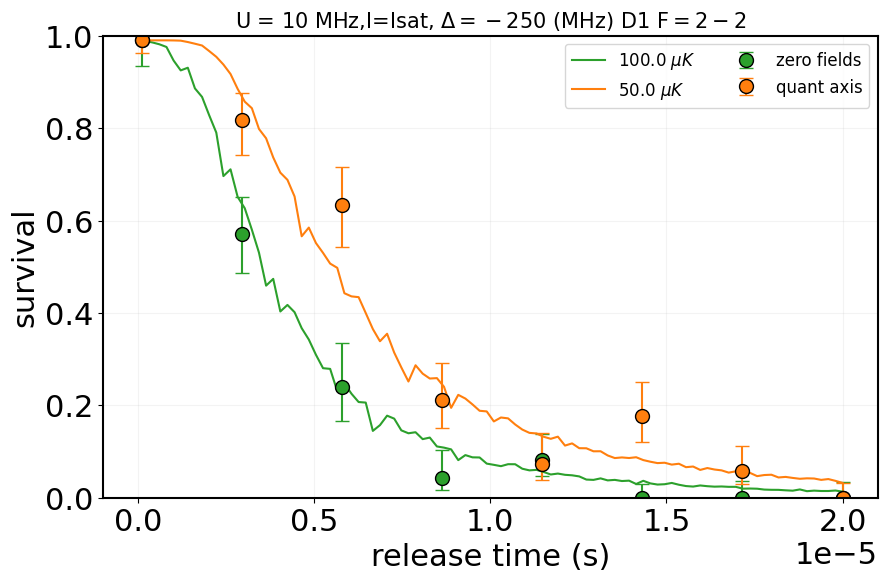

In [91]:
reloadMyModules(25,'october')
threshold = 70

dataset1 = ta.standardTransferAnalysis(1, loadOneOpt, tOptions = [to.ThresholdOptions(manualThreshold = True, manualThresholdValue = threshold)]);
(tferAtomsVarAvg, tferAtomsVarErrs, loadAtomsVarAvg, initPicCounts, keyName, key1, repetitions, initThresholds, 
            fits, avgTferData1, avgTferErr1, avgFit, avgPics, genAvgs, genErrs, tferVarAvg, tferVarErr, initAtomImages, 
            tferAtomImages, tferPicCounts, tferThresholds, fitModules, basicInfoStr, ensembleHits, tOptions, analysisOpts,
            tferAtomsPs, tferAtomsPs, tferList, isAnnotated, hmm) = dataset1

color1 = 'tab:green'
upperbound = []
lowerbound = []
for i in np.arange(0,len(avgTferErr1)):
    up = avgTferErr1[i][0]
    lo = avgTferErr1[i][1]
    upperbound.append(up)  
    lowerbound.append(lo)
err1= [upperbound,lowerbound]

dataset2 = ta.standardTransferAnalysis(2, loadOneOpt, tOptions = [to.ThresholdOptions(manualThreshold = True, manualThresholdValue = threshold)]);
(tferAtomsVarAvg, tferAtomsVarErrs, loadAtomsVarAvg, initPicCounts, keyName, key2, repetitions, initThresholds, 
            fits, avgTferData2, avgTferErr2, avgFit, avgPics, genAvgs, genErrs, tferVarAvg, tferVarErr, initAtomImages, 
            tferAtomImages, tferPicCounts, tferThresholds, fitModules, basicInfoStr, ensembleHits, tOptions, analysisOpts,
            tferAtomsPs, tferAtomsPs, tferList, isAnnotated, hmm) = dataset2
color2 = 'tab:blue'
upperbound = []
lowerbound = []
for i in np.arange(0,len(avgTferErr2)):
    up = avgTferErr2[i][0]
    lo = avgTferErr2[i][1]
    upperbound.append(up)  
    lowerbound.append(lo)
err2= [upperbound,lowerbound]   


dataset3 = ta.standardTransferAnalysis(3, loadOneOpt, tOptions = [to.ThresholdOptions(manualThreshold = True, manualThresholdValue = threshold)]);
(tferAtomsVarAvg, tferAtomsVarErrs, loadAtomsVarAvg, initPicCounts, keyName, key3, repetitions, initThresholds, 
            fits, avgTferData3, avgTferErr3, avgFit, avgPics, genAvgs, genErrs, tferVarAvg, tferVarErr, initAtomImages, 
            tferAtomImages, tferPicCounts, tferThresholds, fitModules, basicInfoStr, ensembleHits, tOptions, analysisOpts,
            tferAtomsPs, tferAtomsPs, tferList, isAnnotated, hmm) = dataset3
color3 = 'tab:orange'
upperbound = []
lowerbound = []
for i in np.arange(0,len(avgTferErr3)):
    up = avgTferErr3[i][0]
    lo = avgTferErr3[i][1]
    upperbound.append(up)  
    lowerbound.append(lo)
err3= [upperbound,lowerbound]  

plt.figure(dpi=1200)
font = {'family' : 'normal',
        'weight' : 'normal',
        'size'   : 22}

matplotlib.rc('font', **font)


fig, ax = plt.subplots(figsize=(10, 6))

t = np.linspace(key1[0], max(key1), len(key1))
ticks = np.arange(0,max(key1),100)
avgTferData1[0]=.99
avgTferData2[0]=.99
avgTferData3[0]=.99
tempGuess1 = 100e-6
tempGuess2 = 50e-6
tempGuess3 = 100e-6
t_temp = np.linspace(0, 20e-6, 100)
ax.errorbar(key1*1e-3,avgTferData1, yerr=err1,ls='none',ecolor=color1,marker = 'o',markersize = 10,markerfacecolor=color1,markeredgecolor='k',capsize=5,label= 'zero fields')
ax.errorbar(key2*1e-3,avgTferData2, yerr=err2,ls='none',ecolor=color3,marker = 'o',markersize = 10,markerfacecolor=color3,markeredgecolor='k',capsize=5,label= 'quant axis')
# ax.errorbar(key3*1e-3,avgTferData3, yerr=err3,ls='none',ecolor=color3,marker = 'o',markersize = 10,markerfacecolor=color3,markeredgecolor='k',capsize=5,label= 'no fields')
ax.plot(t_temp, mp.get_survival_release_capture(t_temp, T=tempGuess1, initial_survival=.99, tweezer_depth=1e-3, verbose=True),color=color1,label= str(tempGuess1*1e6)+r'$ \ \mu K$')
ax.plot(t_temp, mp.get_survival_release_capture(t_temp, T=tempGuess2, initial_survival=.99, tweezer_depth=1e-3, verbose=True),color=color3,label= str(tempGuess2*1e6)+r'$ \ \mu K$')
# ax.plot(t_temp, mp.get_survival_release_capture(t_temp, T=tempGuess3, initial_survival=.99, tweezer_depth=1e-3, verbose=True),color=color3,label= str(tempGuess3*1e6)+r'$ \ \mu K$')

ax.grid(which='minor', alpha=.1)
plt.legend(loc=1, ncol = 2,prop={'size': 12})
plt.ylim(0,1)
plt.ylabel('survival')
plt.xlabel('release time (s)')
plt.rcParams["axes.linewidth"] = 1.5
plt.ticklabel_format(style='sci') 
plt.title(r'U = 10 MHz,I=Isat, $ \Delta = -250 \ \mathrm{(MHz) \ D1 \ F=2-2}$',fontsize=15);

### $ \Delta = 250 \ \mathrm{(MHz) \ D1 \ F=2-2}$'

Number of Pictures: 1600; Picture Dimensions: 5 x 10
Variations: 8;	Repetitions: 100;	Exp File Version: 4;
Experiment started at (H:M:S) 8:57:33: on (Y-M-D) 2023-10-25, And ended at 9:3:48: on 2023-10-25
Experiment Notes: HDF5 NOT ANNOTATED: please call exp.Annotate() to annotate this file.

Number of Pictures: 1600; Picture Dimensions: 5 x 10
Variations: 8;	Repetitions: 100;	Exp File Version: 4;
Experiment started at (H:M:S) 9:4:51: on (Y-M-D) 2023-10-25, And ended at 9:11:9: on 2023-10-25
Experiment Notes: HDF5 NOT ANNOTATED: please call exp.Annotate() to annotate this file.

Number of Pictures: 1600; Picture Dimensions: 5 x 10
Variations: 8;	Repetitions: 100;	Exp File Version: 4;
Experiment started at (H:M:S) 9:11:33: on (Y-M-D) 2023-10-25, And ended at 9:17:47: on 2023-10-25
Experiment Notes: HDF5 NOT ANNOTATED: please call exp.Annotate() to annotate this file.



<Figure size 30000x9600 with 0 Axes>

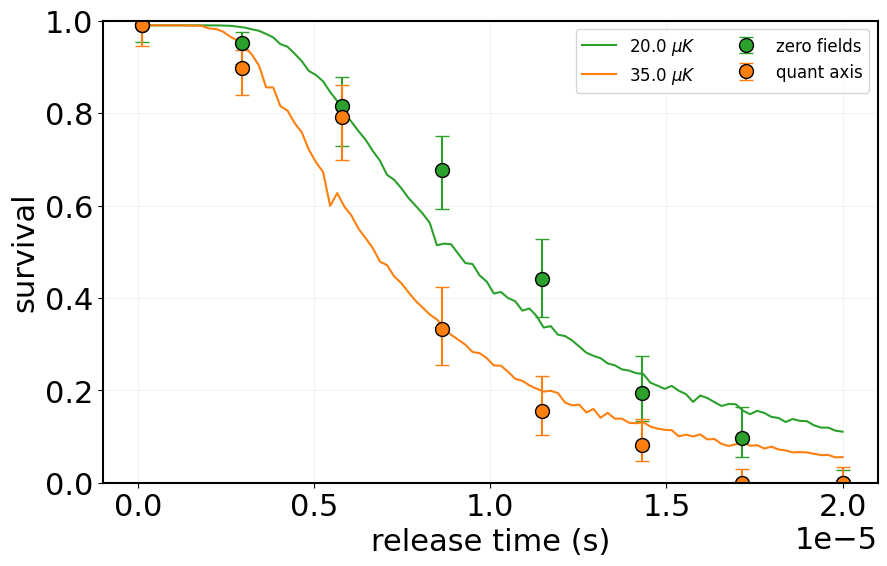

In [93]:
reloadMyModules(25,'october')
threshold = 70

dataset1 = ta.standardTransferAnalysis(4, loadOneOpt, tOptions = [to.ThresholdOptions(manualThreshold = True, manualThresholdValue = threshold)]);
(tferAtomsVarAvg, tferAtomsVarErrs, loadAtomsVarAvg, initPicCounts, keyName, key1, repetitions, initThresholds, 
            fits, avgTferData1, avgTferErr1, avgFit, avgPics, genAvgs, genErrs, tferVarAvg, tferVarErr, initAtomImages, 
            tferAtomImages, tferPicCounts, tferThresholds, fitModules, basicInfoStr, ensembleHits, tOptions, analysisOpts,
            tferAtomsPs, tferAtomsPs, tferList, isAnnotated, hmm) = dataset1

color1 = 'tab:green'
upperbound = []
lowerbound = []
for i in np.arange(0,len(avgTferErr1)):
    up = avgTferErr1[i][0]
    lo = avgTferErr1[i][1]
    upperbound.append(up)  
    lowerbound.append(lo)
err1= [upperbound,lowerbound]

dataset2 = ta.standardTransferAnalysis(5, loadOneOpt, tOptions = [to.ThresholdOptions(manualThreshold = True, manualThresholdValue = threshold)]);
(tferAtomsVarAvg, tferAtomsVarErrs, loadAtomsVarAvg, initPicCounts, keyName, key2, repetitions, initThresholds, 
            fits, avgTferData2, avgTferErr2, avgFit, avgPics, genAvgs, genErrs, tferVarAvg, tferVarErr, initAtomImages, 
            tferAtomImages, tferPicCounts, tferThresholds, fitModules, basicInfoStr, ensembleHits, tOptions, analysisOpts,
            tferAtomsPs, tferAtomsPs, tferList, isAnnotated, hmm) = dataset2
color2 = 'tab:blue'
upperbound = []
lowerbound = []
for i in np.arange(0,len(avgTferErr2)):
    up = avgTferErr2[i][0]
    lo = avgTferErr2[i][1]
    upperbound.append(up)  
    lowerbound.append(lo)
err2= [upperbound,lowerbound]   


dataset3 = ta.standardTransferAnalysis(6, loadOneOpt, tOptions = [to.ThresholdOptions(manualThreshold = True, manualThresholdValue = threshold)]);
(tferAtomsVarAvg, tferAtomsVarErrs, loadAtomsVarAvg, initPicCounts, keyName, key3, repetitions, initThresholds, 
            fits, avgTferData3, avgTferErr3, avgFit, avgPics, genAvgs, genErrs, tferVarAvg, tferVarErr, initAtomImages, 
            tferAtomImages, tferPicCounts, tferThresholds, fitModules, basicInfoStr, ensembleHits, tOptions, analysisOpts,
            tferAtomsPs, tferAtomsPs, tferList, isAnnotated, hmm) = dataset3
color3 = 'tab:orange'
upperbound = []
lowerbound = []
for i in np.arange(0,len(avgTferErr3)):
    up = avgTferErr3[i][0]
    lo = avgTferErr3[i][1]
    upperbound.append(up)  
    lowerbound.append(lo)
err3= [upperbound,lowerbound]  

plt.figure(dpi=1200)
font = {'family' : 'normal',
        'weight' : 'normal',
        'size'   : 22}

matplotlib.rc('font', **font)


fig, ax = plt.subplots(figsize=(10, 6))

t = np.linspace(key1[0], max(key1), len(key1))
ticks = np.arange(0,max(key1),100)
avgTferData1[0]=.99

avgTferData2[0]=.99
avgTferData3[0]=.99

tempGuess1 = 20e-6
tempGuess2 = 35e-6
tempGuess3 = 20e-6
t_temp = np.linspace(0, 20e-6, 100)
ax.errorbar(key1*1e-3,avgTferData1, yerr=err1,ls='none',ecolor=color1,marker = 'o',markersize = 10,markerfacecolor=color1,markeredgecolor='k',capsize=5,label= 'zero fields')
ax.errorbar(key2*1e-3,avgTferData2, yerr=err2,ls='none',ecolor=color3,marker = 'o',markersize = 10,markerfacecolor=color3,markeredgecolor='k',capsize=5,label= 'quant axis')
# ax.errorbar(key3*1e-3,avgTferData3, yerr=err3,ls='none',ecolor=color3,marker = 'o',markersize = 10,markerfacecolor=color3,markeredgecolor='k',capsize=5,label= 'no fields')
ax.plot(t_temp, mp.get_survival_release_capture(t_temp, T=tempGuess1, initial_survival=.99, tweezer_depth=1e-3, verbose=True),color=color1,label= str(tempGuess1*1e6)+r'$ \ \mu K$')
ax.plot(t_temp, mp.get_survival_release_capture(t_temp, T=tempGuess2, initial_survival=.99, tweezer_depth=1e-3, verbose=True),color=color3,label= str(tempGuess2*1e6)+r'$ \ \mu K$')
# ax.plot(t_temp, mp.get_survival_release_capture(t_temp, T=tempGuess3, initial_survival=.99, tweezer_depth=1e-3, verbose=True),color=color3,label= str(tempGuess3*1e6)+r'$ \ \mu K$')

ax.grid(which='minor', alpha=.1)
plt.legend(loc=1, ncol = 2,prop={'size': 12})
plt.ylim(0,1)
plt.ylabel('survival')
plt.xlabel('release time (s)')
plt.rcParams["axes.linewidth"] = 1.5
plt.ticklabel_format(style='sci') 
# plt.title(r'U = 10 MHz,I=Isat, $ \Delta = 250 \ \mathrm{(MHz) \ D1 \ F=2-2}$',fontsize=15);

### $ \Delta = -100 \ \mathrm{(MHz) \ D2 \ F=2-3}$'

Number of Pictures: 1600; Picture Dimensions: 5 x 10
Variations: 8;	Repetitions: 100;	Exp File Version: 4;
Experiment started at (H:M:S) 9:54:16: on (Y-M-D) 2023-10-25, And ended at 10:0:36: on 2023-10-25
Experiment Notes: HDF5 NOT ANNOTATED: please call exp.Annotate() to annotate this file.

Number of Pictures: 1600; Picture Dimensions: 5 x 10
Variations: 8;	Repetitions: 100;	Exp File Version: 4;
Experiment started at (H:M:S) 10:0:50: on (Y-M-D) 2023-10-25, And ended at 10:7:11: on 2023-10-25
Experiment Notes: HDF5 NOT ANNOTATED: please call exp.Annotate() to annotate this file.

Number of Pictures: 1600; Picture Dimensions: 5 x 10
Variations: 8;	Repetitions: 100;	Exp File Version: 4;
Experiment started at (H:M:S) 10:7:27: on (Y-M-D) 2023-10-25, And ended at 10:13:47: on 2023-10-25
Experiment Notes: HDF5 NOT ANNOTATED: please call exp.Annotate() to annotate this file.



<Figure size 30000x9600 with 0 Axes>

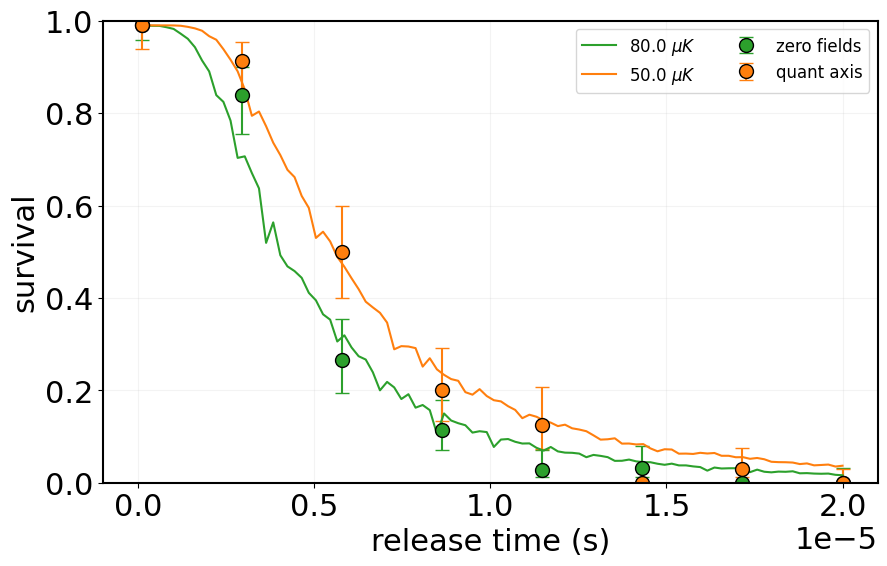

In [94]:
reloadMyModules(25,'october')
threshold = 70

dataset1 = ta.standardTransferAnalysis(9, loadOneOpt, tOptions = [to.ThresholdOptions(manualThreshold = True, manualThresholdValue = threshold)]);
(tferAtomsVarAvg, tferAtomsVarErrs, loadAtomsVarAvg, initPicCounts, keyName, key1, repetitions, initThresholds, 
            fits, avgTferData1, avgTferErr1, avgFit, avgPics, genAvgs, genErrs, tferVarAvg, tferVarErr, initAtomImages, 
            tferAtomImages, tferPicCounts, tferThresholds, fitModules, basicInfoStr, ensembleHits, tOptions, analysisOpts,
            tferAtomsPs, tferAtomsPs, tferList, isAnnotated, hmm) = dataset1

color1 = 'tab:green'
upperbound = []
lowerbound = []
for i in np.arange(0,len(avgTferErr1)):
    up = avgTferErr1[i][0]
    lo = avgTferErr1[i][1]
    upperbound.append(up)  
    lowerbound.append(lo)
err1= [upperbound,lowerbound]

dataset2 = ta.standardTransferAnalysis(10, loadOneOpt, tOptions = [to.ThresholdOptions(manualThreshold = True, manualThresholdValue = threshold)]);
(tferAtomsVarAvg, tferAtomsVarErrs, loadAtomsVarAvg, initPicCounts, keyName, key2, repetitions, initThresholds, 
            fits, avgTferData2, avgTferErr2, avgFit, avgPics, genAvgs, genErrs, tferVarAvg, tferVarErr, initAtomImages, 
            tferAtomImages, tferPicCounts, tferThresholds, fitModules, basicInfoStr, ensembleHits, tOptions, analysisOpts,
            tferAtomsPs, tferAtomsPs, tferList, isAnnotated, hmm) = dataset2
color2 = 'tab:blue'
upperbound = []
lowerbound = []
for i in np.arange(0,len(avgTferErr2)):
    up = avgTferErr2[i][0]
    lo = avgTferErr2[i][1]
    upperbound.append(up)  
    lowerbound.append(lo)
err2= [upperbound,lowerbound]   


dataset3 = ta.standardTransferAnalysis(11, loadOneOpt, tOptions = [to.ThresholdOptions(manualThreshold = True, manualThresholdValue = threshold)]);
(tferAtomsVarAvg, tferAtomsVarErrs, loadAtomsVarAvg, initPicCounts, keyName, key3, repetitions, initThresholds, 
            fits, avgTferData3, avgTferErr3, avgFit, avgPics, genAvgs, genErrs, tferVarAvg, tferVarErr, initAtomImages, 
            tferAtomImages, tferPicCounts, tferThresholds, fitModules, basicInfoStr, ensembleHits, tOptions, analysisOpts,
            tferAtomsPs, tferAtomsPs, tferList, isAnnotated, hmm) = dataset3
color3 = 'tab:orange'
upperbound = []
lowerbound = []
for i in np.arange(0,len(avgTferErr3)):
    up = avgTferErr3[i][0]
    lo = avgTferErr3[i][1]
    upperbound.append(up)  
    lowerbound.append(lo)
err3= [upperbound,lowerbound]  

plt.figure(dpi=1200)
font = {'family' : 'normal',
        'weight' : 'normal',
        'size'   : 22}

matplotlib.rc('font', **font)


fig, ax = plt.subplots(figsize=(10, 6))

t = np.linspace(key1[0], max(key1), len(key1))
ticks = np.arange(0,max(key1),100)
avgTferData1[0]=.99

avgTferData2[0]=.99
avgTferData3[0]=.99

tempGuess1 = 80e-6
tempGuess2 = 50e-6
tempGuess3 = 70e-6
t_temp = np.linspace(0, 20e-6, 100)
ax.errorbar(key1*1e-3,avgTferData1, yerr=err1,ls='none',ecolor=color1,marker = 'o',markersize = 10,markerfacecolor=color1,markeredgecolor='k',capsize=5,label= 'zero fields')
ax.errorbar(key2*1e-3,avgTferData2, yerr=err2,ls='none',ecolor=color3,marker = 'o',markersize = 10,markerfacecolor=color3,markeredgecolor='k',capsize=5,label= 'quant axis')
# ax.errorbar(key3*1e-3,avgTferData3, yerr=err3,ls='none',ecolor=color3,marker = 'o',markersize = 10,markerfacecolor=color3,markeredgecolor='k',capsize=5,label= 'no fields')
ax.plot(t_temp, mp.get_survival_release_capture(t_temp, T=tempGuess1, initial_survival=.99, tweezer_depth=1e-3, verbose=True),color=color1,label= str(tempGuess1*1e6)+r'$ \ \mu K$')
ax.plot(t_temp, mp.get_survival_release_capture(t_temp, T=tempGuess2, initial_survival=.99, tweezer_depth=1e-3, verbose=True),color=color3,label= str(tempGuess2*1e6)+r'$ \ \mu K$')
# ax.plot(t_temp, mp.get_survival_release_capture(t_temp, T=tempGuess3, initial_survival=.99, tweezer_depth=1e-3, verbose=True),color=color3,label= str(tempGuess3*1e6)+r'$ \ \mu K$')

ax.grid(which='minor', alpha=.1)
plt.legend(loc=1, ncol = 2,prop={'size': 12})
plt.ylim(0,1)
plt.ylabel('survival')
plt.xlabel('release time (s)')
plt.rcParams["axes.linewidth"] = 1.5
plt.ticklabel_format(style='sci') 
# plt.title(r'U = 10 MHz,I=Isat, $ \Delta = -100 \ \mathrm{(MHz) \ D2 \ F=2-3}$',fontsize=15);

### $ \Delta = 100 \ \mathrm{(MHz) \ D2 \ F=2-3}$'

Number of Pictures: 1600; Picture Dimensions: 5 x 10
Variations: 8;	Repetitions: 100;	Exp File Version: 4;
Experiment started at (H:M:S) 10:16:58: on (Y-M-D) 2023-10-25, And ended at 10:23:17: on 2023-10-25
Experiment Notes: HDF5 NOT ANNOTATED: please call exp.Annotate() to annotate this file.

Number of Pictures: 1600; Picture Dimensions: 5 x 10
Variations: 8;	Repetitions: 100;	Exp File Version: 4;
Experiment started at (H:M:S) 10:23:36: on (Y-M-D) 2023-10-25, And ended at 10:29:58: on 2023-10-25
Experiment Notes: HDF5 NOT ANNOTATED: please call exp.Annotate() to annotate this file.

Number of Pictures: 1600; Picture Dimensions: 5 x 10
Variations: 8;	Repetitions: 100;	Exp File Version: 4;
Experiment started at (H:M:S) 10:30:15: on (Y-M-D) 2023-10-25, And ended at 10:36:34: on 2023-10-25
Experiment Notes: HDF5 NOT ANNOTATED: please call exp.Annotate() to annotate this file.



<Figure size 30000x9600 with 0 Axes>

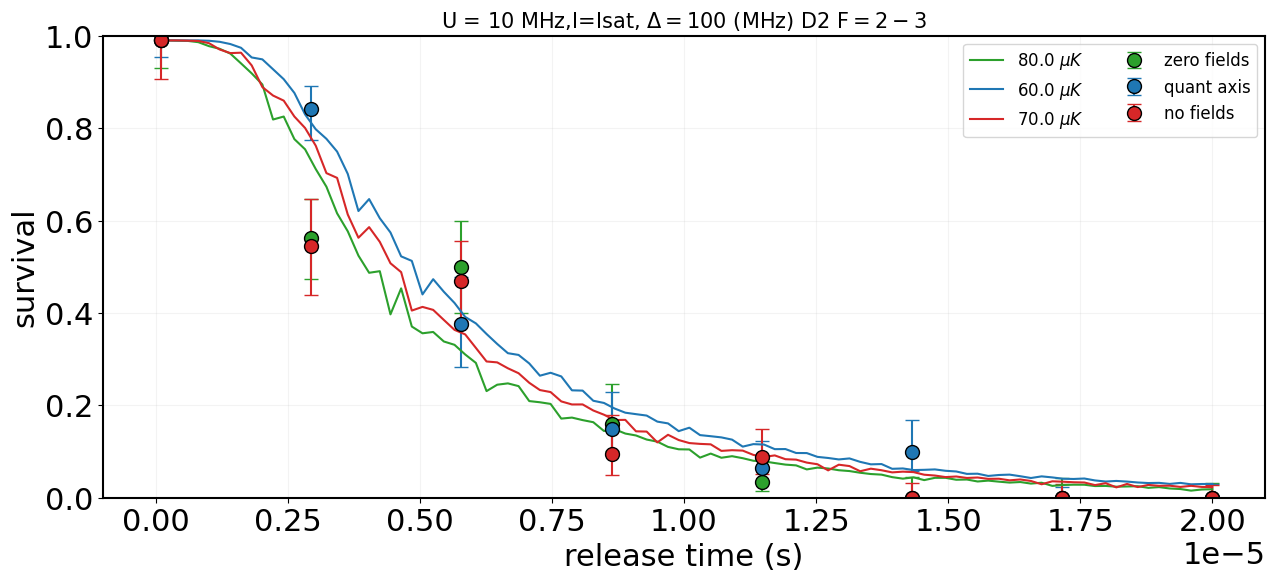

In [391]:
reloadMyModules(25,'october')
threshold = 70

dataset1 = ta.standardTransferAnalysis(12, loadOneOpt, tOptions = [to.ThresholdOptions(manualThreshold = True, manualThresholdValue = threshold)]);
(tferAtomsVarAvg, tferAtomsVarErrs, loadAtomsVarAvg, initPicCounts, keyName, key1, repetitions, initThresholds, 
            fits, avgTferData1, avgTferErr1, avgFit, avgPics, genAvgs, genErrs, tferVarAvg, tferVarErr, initAtomImages, 
            tferAtomImages, tferPicCounts, tferThresholds, fitModules, basicInfoStr, ensembleHits, tOptions, analysisOpts,
            tferAtomsPs, tferAtomsPs, tferList, isAnnotated, hmm) = dataset1

color1 = 'tab:green'
upperbound = []
lowerbound = []
for i in np.arange(0,len(avgTferErr1)):
    up = avgTferErr1[i][0]
    lo = avgTferErr1[i][1]
    upperbound.append(up)  
    lowerbound.append(lo)
err1= [upperbound,lowerbound]

dataset2 = ta.standardTransferAnalysis(13, loadOneOpt, tOptions = [to.ThresholdOptions(manualThreshold = True, manualThresholdValue = threshold)]);
(tferAtomsVarAvg, tferAtomsVarErrs, loadAtomsVarAvg, initPicCounts, keyName, key2, repetitions, initThresholds, 
            fits, avgTferData2, avgTferErr2, avgFit, avgPics, genAvgs, genErrs, tferVarAvg, tferVarErr, initAtomImages, 
            tferAtomImages, tferPicCounts, tferThresholds, fitModules, basicInfoStr, ensembleHits, tOptions, analysisOpts,
            tferAtomsPs, tferAtomsPs, tferList, isAnnotated, hmm) = dataset2
color2 = 'tab:blue'
upperbound = []
lowerbound = []
for i in np.arange(0,len(avgTferErr2)):
    up = avgTferErr2[i][0]
    lo = avgTferErr2[i][1]
    upperbound.append(up)  
    lowerbound.append(lo)
err2= [upperbound,lowerbound]   


dataset3 = ta.standardTransferAnalysis(14, loadOneOpt, tOptions = [to.ThresholdOptions(manualThreshold = True, manualThresholdValue = threshold)]);
(tferAtomsVarAvg, tferAtomsVarErrs, loadAtomsVarAvg, initPicCounts, keyName, key3, repetitions, initThresholds, 
            fits, avgTferData3, avgTferErr3, avgFit, avgPics, genAvgs, genErrs, tferVarAvg, tferVarErr, initAtomImages, 
            tferAtomImages, tferPicCounts, tferThresholds, fitModules, basicInfoStr, ensembleHits, tOptions, analysisOpts,
            tferAtomsPs, tferAtomsPs, tferList, isAnnotated, hmm) = dataset3
color3 = 'tab:red'
upperbound = []
lowerbound = []
for i in np.arange(0,len(avgTferErr3)):
    up = avgTferErr3[i][0]
    lo = avgTferErr3[i][1]
    upperbound.append(up)  
    lowerbound.append(lo)
err3= [upperbound,lowerbound]  

plt.figure(dpi=1200)
font = {'family' : 'normal',
        'weight' : 'normal',
        'size'   : 22}

matplotlib.rc('font', **font)


fig, ax = plt.subplots(figsize=(15, 6))

t = np.linspace(key1[0], max(key1), len(key1))
ticks = np.arange(0,max(key1),100)
avgTferData1[0]=.99

avgTferData2[0]=.99
avgTferData3[0]=.99

tempGuess1 = 80e-6
tempGuess2 = 60e-6
tempGuess3 = 70e-6
t_temp = np.linspace(0, 20e-6, 100)
ax.errorbar(key1*1e-3,avgTferData1, yerr=err1,ls='none',ecolor=color1,marker = 'o',markersize = 10,markerfacecolor=color1,markeredgecolor='k',capsize=5,label= 'zero fields')
ax.errorbar(key2*1e-3,avgTferData2, yerr=err2,ls='none',ecolor=color2,marker = 'o',markersize = 10,markerfacecolor=color2,markeredgecolor='k',capsize=5,label= 'quant axis')
ax.errorbar(key3*1e-3,avgTferData3, yerr=err3,ls='none',ecolor=color3,marker = 'o',markersize = 10,markerfacecolor=color3,markeredgecolor='k',capsize=5,label= 'no fields')
ax.plot(t_temp, mp.get_survival_release_capture(t_temp, T=tempGuess1, initial_survival=.99, tweezer_depth=1e-3, verbose=True),color=color1,label= str(tempGuess1*1e6)+r'$ \ \mu K$')
ax.plot(t_temp, mp.get_survival_release_capture(t_temp, T=tempGuess2, initial_survival=.99, tweezer_depth=1e-3, verbose=True),color=color2,label= str(tempGuess2*1e6)+r'$ \ \mu K$')
ax.plot(t_temp, mp.get_survival_release_capture(t_temp, T=tempGuess3, initial_survival=.99, tweezer_depth=1e-3, verbose=True),color=color3,label= str(tempGuess3*1e6)+r'$ \ \mu K$')

ax.grid(which='minor', alpha=.1)
plt.legend(loc=1, ncol = 2,prop={'size': 12})
plt.ylim(0,1)
plt.ylabel('survival')
plt.xlabel('release time (s)')
plt.rcParams["axes.linewidth"] = 1.5
plt.ticklabel_format(style='sci') 
plt.title(r'U = 10 MHz,I=Isat, $ \Delta = 100 \ \mathrm{(MHz) \ D2 \ F=2-3}$',fontsize=15);

In [19]:
def decay_exponential(x, A, k, C):
    return A * np.exp(-k * x) + C

## Beta vs Intensity -  Non-retro beam, U=10 MHz, $\Delta = -100$ D2 F=2-3' 

D2 non-retro 23-(25-35)

### 0.1 S

Number of Pictures: 1200; Picture Dimensions: 5 x 10
Variations: 6;	Repetitions: 100;	Exp File Version: 4;
Experiment started at (H:M:S) 11:57:52: on (Y-M-D) 2023-10-23, And ended at 12:2:47: on 2023-10-23
Experiment Notes: HDF5 NOT ANNOTATED: please call exp.Annotate() to annotate this file.

gamma = 0.36594574137303404 gamma uncertainty = 0.06120230698242549


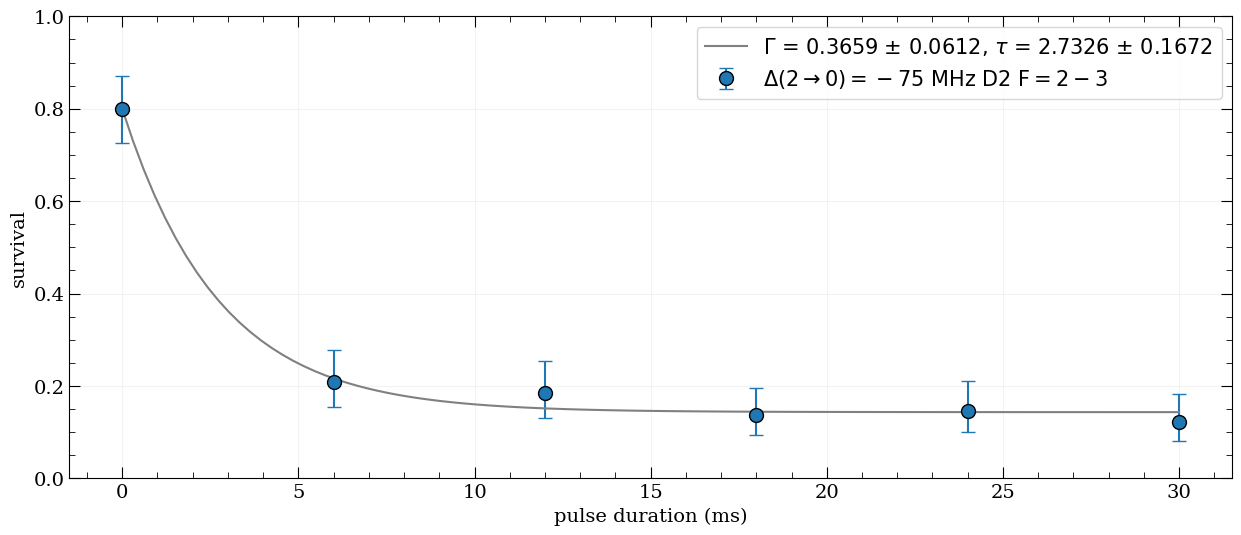

In [20]:
##pulse duration
reloadMyModules(23,'October')
fileId = 30
threshold = 60
dataset1 = ta.standardTransferAnalysis(fileId, loadTwoOpt, tOptions = [to.ThresholdOptions(manualThreshold = True, manualThresholdValue = threshold)]);
(tferAtomsVarAvg, tferAtomsVarErrs, loadAtomsVarAvg, initPicCounts, keyName, key1, repetitions, initThresholds, 
            fits, avgTferData1, avgTferErr1, avgFit, avgPics, genAvgs, genErrs, tferVarAvg, tferVarErr, initAtomImages, 
            tferAtomImages, tferPicCounts, tferThresholds, fitModules, basicInfoStr, ensembleHits, tOptions, analysisOpts,
            tferAtomsPs, tferAtomsPs, tferList, isAnnotated, hmm) = dataset1
color1 = 'tab:blue'
upperbound = []
lowerbound = []
for i in np.arange(0,len(avgTferErr1)):
    up = avgTferErr1[i][0]
    lo = avgTferErr1[i][1]
    upperbound.append(up)  
    lowerbound.append(lo)
err1= [upperbound,lowerbound]
avgTferData1[0] = 0.8

x_data = key1
y_data = avgTferData1
initial_guess = [max(y_data), 0.1, min(y_data)]
popt, pcov = curve_fit(decay_exponential, x_data, y_data, p0=initial_guess)
x_fit = np.linspace(min(x_data), max(x_data), 100)
y_fit = decay_exponential(x_fit, *popt)
decay_constant = popt[1]
decay_constant_uncertainty = np.sqrt(pcov[1, 1])
one_over_e_time = 1 / decay_constant
one_over_e_time_uncertainty = decay_constant_uncertainty / decay_constant

fig, ax = plt.subplots(figsize=(15, 6))
font = {'family' : 'DejaVu Sans',
        'weight' : 'normal',
        'size'   : 22}
matplotlib.rc('font', **font)
decay_constant_str = f"{decay_constant:.4f}"
decay_constant_uncertainty_str = f"{decay_constant_uncertainty:.4f}"
legend_label = fr"$\Gamma$ = {decay_constant_str} ± {decay_constant_uncertainty_str}, $\tau$ = {one_over_e_time:.4f} ± {one_over_e_time_uncertainty:.4f}"
ticks = np.arange(key1[0], max(key1),len(key1))
ax.errorbar(key1,avgTferData1, yerr=err1,ls='none',ecolor=color1,marker = 'o',markersize = 10,
            markerfacecolor=color1,markeredgecolor='k',capsize=5, label=r'$ \Delta(2 \rightarrow 0) = -75 \ \mathrm{MHz} \ \mathrm{D2 \ F=2-3} $')
plt.plot(x_fit, y_fit, 'gray',label=legend_label)
plt.legend(loc= 'upper right', ncol = 1,prop={'size': 15})
plt.ylim(0,1)
plt.ylabel('survival')
plt.xlabel(r'pulse duration (ms)')
plt.rcParams["axes.linewidth"] = 1.5
plt.ticklabel_format(style='plain') 


gamma_p1SD287 = decay_constant
gamma_p1SD287_unc  = decay_constant_uncertainty
tau_p1SD287 = one_over_e_time
tau_p1SD287_unc  = one_over_e_time_uncertainty
print('gamma =',decay_constant,'gamma uncertainty =',decay_constant_uncertainty)

### 0.5 S

Number of Pictures: 1200; Picture Dimensions: 5 x 10
Variations: 6;	Repetitions: 100;	Exp File Version: 4;
Experiment started at (H:M:S) 12:15:52: on (Y-M-D) 2023-10-23, And ended at 12:20:42: on 2023-10-23
Experiment Notes: HDF5 NOT ANNOTATED: please call exp.Annotate() to annotate this file.

gamma = 0.8623739495097485 gamma uncertainty = 0.19113439469794272


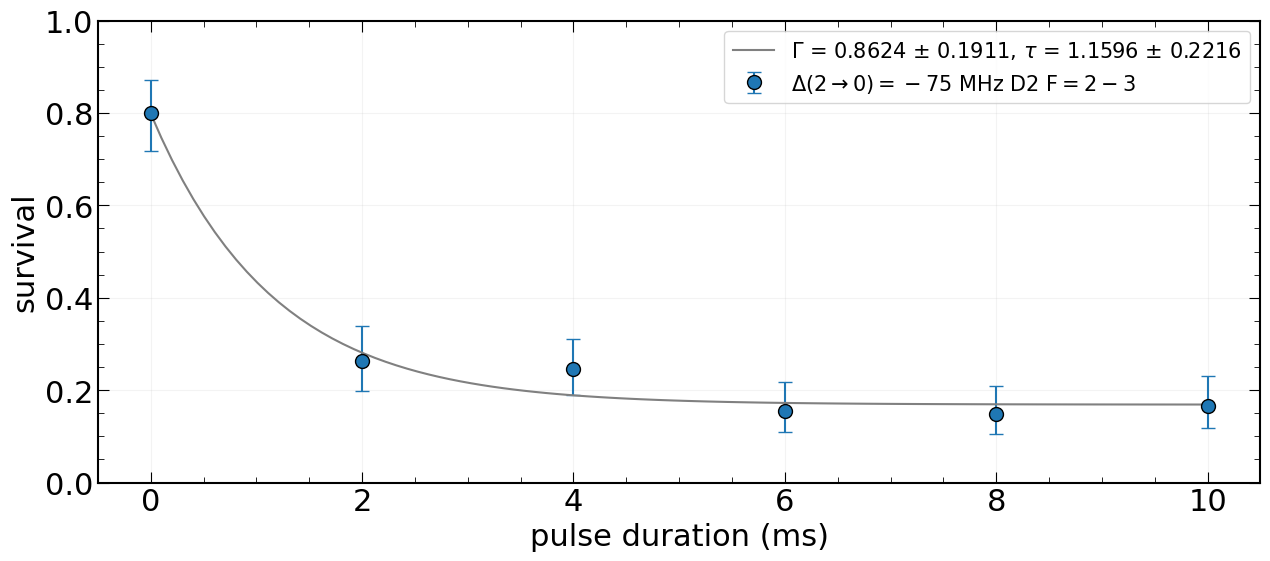

In [21]:
##pulse duration
reloadMyModules(23,'October')
fileId = 33
threshold = 60
dataset1 = ta.standardTransferAnalysis(fileId, loadTwoOpt, tOptions = [to.ThresholdOptions(manualThreshold = True, manualThresholdValue = threshold)]);
(tferAtomsVarAvg, tferAtomsVarErrs, loadAtomsVarAvg, initPicCounts, keyName, key1, repetitions, initThresholds, 
            fits, avgTferData1, avgTferErr1, avgFit, avgPics, genAvgs, genErrs, tferVarAvg, tferVarErr, initAtomImages, 
            tferAtomImages, tferPicCounts, tferThresholds, fitModules, basicInfoStr, ensembleHits, tOptions, analysisOpts,
            tferAtomsPs, tferAtomsPs, tferList, isAnnotated, hmm) = dataset1
color1 = 'tab:blue'
upperbound = []
lowerbound = []
for i in np.arange(0,len(avgTferErr1)):
    up = avgTferErr1[i][0]
    lo = avgTferErr1[i][1]
    upperbound.append(up)  
    lowerbound.append(lo)
err1= [upperbound,lowerbound]
avgTferData1[0] = 0.8

x_data = key1
y_data = avgTferData1
initial_guess = [max(y_data), 0.1, min(y_data)]
popt, pcov = curve_fit(decay_exponential, x_data, y_data, p0=initial_guess)
x_fit = np.linspace(min(x_data), max(x_data), 100)
y_fit = decay_exponential(x_fit, *popt)
decay_constant = popt[1]
decay_constant_uncertainty = np.sqrt(pcov[1, 1])
one_over_e_time = 1 / decay_constant
one_over_e_time_uncertainty = decay_constant_uncertainty / decay_constant

fig, ax = plt.subplots(figsize=(15, 6))
font = {'family' : 'DejaVu Sans',
        'weight' : 'normal',
        'size'   : 22}
matplotlib.rc('font', **font)
decay_constant_str = f"{decay_constant:.4f}"
decay_constant_uncertainty_str = f"{decay_constant_uncertainty:.4f}"
legend_label = fr"$\Gamma$ = {decay_constant_str} ± {decay_constant_uncertainty_str}, $\tau$ = {one_over_e_time:.4f} ± {one_over_e_time_uncertainty:.4f}"
ticks = np.arange(key1[0], max(key1),len(key1))
ax.errorbar(key1,avgTferData1, yerr=err1,ls='none',ecolor=color1,marker = 'o',markersize = 10,
            markerfacecolor=color1,markeredgecolor='k',capsize=5, label=r'$ \Delta(2 \rightarrow 0) = -75 \ \mathrm{MHz} \ \mathrm{D2 \ F=2-3} $')
plt.plot(x_fit, y_fit, 'gray',label=legend_label)
plt.legend(loc= 'upper right', ncol = 1,prop={'size': 15})
plt.ylim(0,1)
plt.ylabel('survival')
plt.xlabel(r'pulse duration (ms)')
plt.rcParams["axes.linewidth"] = 1.5
plt.ticklabel_format(style='plain') 


gamma_p5SD287 = decay_constant
gamma_p5SD287_unc = decay_constant_uncertainty
tau_p5SD287 = one_over_e_time
tau_p5SD287_unc = one_over_e_time_uncertainty
print('gamma =',decay_constant,'gamma uncertainty =',decay_constant_uncertainty)

### 1 S

Number of Pictures: 600; Picture Dimensions: 5 x 10
Variations: 6;	Repetitions: 50;	Exp File Version: 4;
Experiment started at (H:M:S) 14:57:57: on (Y-M-D) 2023-10-25, And ended at 15:0:35: on 2023-10-25
Experiment Notes: HDF5 NOT ANNOTATED: please call exp.Annotate() to annotate this file.

gamma = 6.802541069261712 gamma uncertainty = 5.2080785880053515


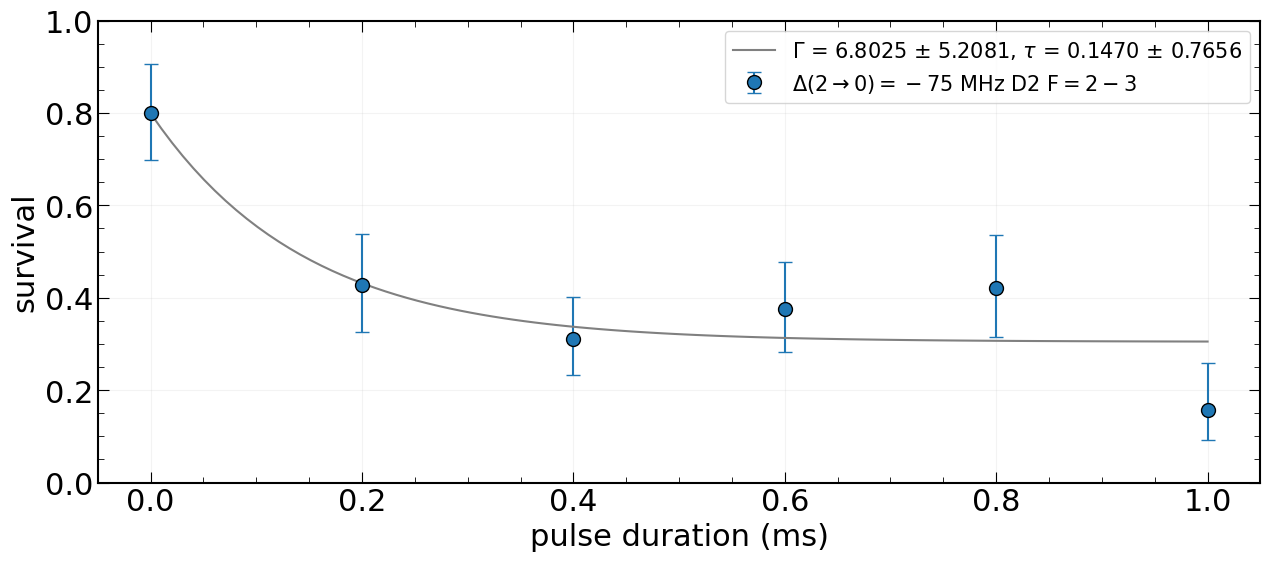

In [22]:
##pulse duration
reloadMyModules(25,'October')
fileId = 43
threshold = 60
dataset1 = ta.standardTransferAnalysis(fileId, loadTwoOpt, tOptions = [to.ThresholdOptions(manualThreshold = True, manualThresholdValue = threshold)]);
(tferAtomsVarAvg, tferAtomsVarErrs, loadAtomsVarAvg, initPicCounts, keyName, key1, repetitions, initThresholds, 
            fits, avgTferData1, avgTferErr1, avgFit, avgPics, genAvgs, genErrs, tferVarAvg, tferVarErr, initAtomImages, 
            tferAtomImages, tferPicCounts, tferThresholds, fitModules, basicInfoStr, ensembleHits, tOptions, analysisOpts,
            tferAtomsPs, tferAtomsPs, tferList, isAnnotated, hmm) = dataset1
color1 = 'tab:blue'
upperbound = []
lowerbound = []
for i in np.arange(0,len(avgTferErr1)):
    up = avgTferErr1[i][0]
    lo = avgTferErr1[i][1]
    upperbound.append(up)  
    lowerbound.append(lo)
err1= [upperbound,lowerbound]
avgTferData1[0] = 0.8

x_data = key1
y_data = avgTferData1
initial_guess = [max(y_data), 0.1, min(y_data)]
popt, pcov = curve_fit(decay_exponential, x_data, y_data, p0=initial_guess)
x_fit = np.linspace(min(x_data), max(x_data), 100)
y_fit = decay_exponential(x_fit, *popt)
decay_constant = popt[1]
decay_constant_uncertainty = np.sqrt(pcov[1, 1])
one_over_e_time = 1 / decay_constant
one_over_e_time_uncertainty = decay_constant_uncertainty / decay_constant

fig, ax = plt.subplots(figsize=(15, 6))
font = {'family' : 'DejaVu Sans',
        'weight' : 'normal',
        'size'   : 22}
matplotlib.rc('font', **font)
decay_constant_str = f"{decay_constant:.4f}"
decay_constant_uncertainty_str = f"{decay_constant_uncertainty:.4f}"
legend_label = fr"$\Gamma$ = {decay_constant_str} ± {decay_constant_uncertainty_str}, $\tau$ = {one_over_e_time:.4f} ± {one_over_e_time_uncertainty:.4f}"
ticks = np.arange(key1[0], max(key1),len(key1))
ax.errorbar(key1,avgTferData1, yerr=err1,ls='none',ecolor=color1,marker = 'o',markersize = 10,
            markerfacecolor=color1,markeredgecolor='k',capsize=5, label=r'$ \Delta(2 \rightarrow 0) = -75 \ \mathrm{MHz} \ \mathrm{D2 \ F=2-3} $')
plt.plot(x_fit, y_fit, 'gray',label=legend_label)
plt.legend(loc= 'upper right', ncol = 1,prop={'size': 15})
plt.ylim(0,1)
plt.ylabel('survival')
plt.xlabel(r'pulse duration (ms)')
plt.rcParams["axes.linewidth"] = 1.5
plt.ticklabel_format(style='plain') 


gamma_S = decay_constant
gamma_S = decay_constant_uncertainty
tau_S = one_over_e_time
tau_S  = one_over_e_time_uncertainty
print('gamma =',decay_constant,'gamma uncertainty =',decay_constant_uncertainty)

### 2 S

Number of Pictures: 1200; Picture Dimensions: 5 x 10
Variations: 6;	Repetitions: 100;	Exp File Version: 4;
Experiment started at (H:M:S) 12:15:52: on (Y-M-D) 2023-10-23, And ended at 12:20:42: on 2023-10-23
Experiment Notes: HDF5 NOT ANNOTATED: please call exp.Annotate() to annotate this file.

gamma = 0.8281630328230732 gamma uncertainty = 0.1479065965123615


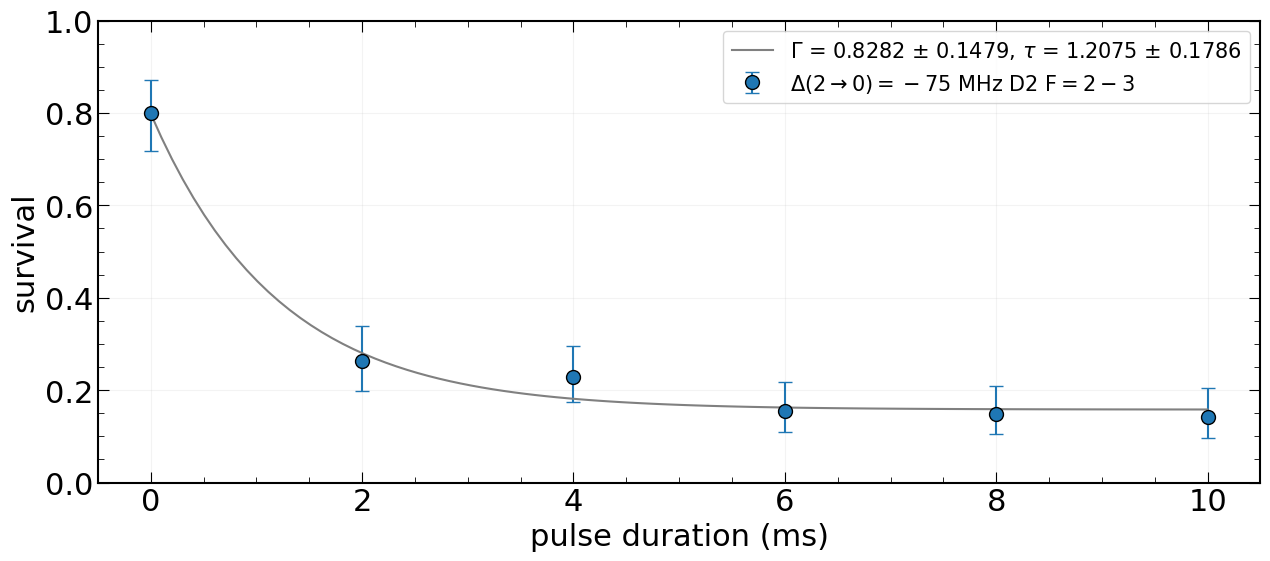

In [23]:
##pulse duration
reloadMyModules(23,'October')
fileId = 33
threshold = 65
dataset1 = ta.standardTransferAnalysis(fileId, loadTwoOpt, tOptions = [to.ThresholdOptions(manualThreshold = True, manualThresholdValue = threshold)]);
(tferAtomsVarAvg, tferAtomsVarErrs, loadAtomsVarAvg, initPicCounts, keyName, key1, repetitions, initThresholds, 
            fits, avgTferData1, avgTferErr1, avgFit, avgPics, genAvgs, genErrs, tferVarAvg, tferVarErr, initAtomImages, 
            tferAtomImages, tferPicCounts, tferThresholds, fitModules, basicInfoStr, ensembleHits, tOptions, analysisOpts,
            tferAtomsPs, tferAtomsPs, tferList, isAnnotated, hmm) = dataset1
color1 = 'tab:blue'
upperbound = []
lowerbound = []
for i in np.arange(0,len(avgTferErr1)):
    up = avgTferErr1[i][0]
    lo = avgTferErr1[i][1]
    upperbound.append(up)  
    lowerbound.append(lo)
err1= [upperbound,lowerbound]
avgTferData1[0] = 0.8

x_data = key1
y_data = avgTferData1
initial_guess = [max(y_data), 0.1, min(y_data)]
popt, pcov = curve_fit(decay_exponential, x_data, y_data, p0=initial_guess)
x_fit = np.linspace(min(x_data), max(x_data), 100)
y_fit = decay_exponential(x_fit, *popt)
decay_constant = popt[1]
decay_constant_uncertainty = np.sqrt(pcov[1, 1])
one_over_e_time = 1 / decay_constant
one_over_e_time_uncertainty = decay_constant_uncertainty / decay_constant

fig, ax = plt.subplots(figsize=(15, 6))
font = {'family' : 'DejaVu Sans',
        'weight' : 'normal',
        'size'   : 22}
matplotlib.rc('font', **font)
decay_constant_str = f"{decay_constant:.4f}"
decay_constant_uncertainty_str = f"{decay_constant_uncertainty:.4f}"
legend_label = fr"$\Gamma$ = {decay_constant_str} ± {decay_constant_uncertainty_str}, $\tau$ = {one_over_e_time:.4f} ± {one_over_e_time_uncertainty:.4f}"
ticks = np.arange(key1[0], max(key1),len(key1))
ax.errorbar(key1,avgTferData1, yerr=err1,ls='none',ecolor=color1,marker = 'o',markersize = 10,
            markerfacecolor=color1,markeredgecolor='k',capsize=5, label=r'$ \Delta(2 \rightarrow 0) = -75 \ \mathrm{MHz} \ \mathrm{D2 \ F=2-3} $')
plt.plot(x_fit, y_fit, 'gray',label=legend_label)
plt.legend(loc= 'upper right', ncol = 1,prop={'size': 15})
plt.ylim(0,1)
plt.ylabel('survival')
plt.xlabel(r'pulse duration (ms)')
plt.rcParams["axes.linewidth"] = 1.5
plt.ticklabel_format(style='plain') 


gamma_2SD287 = decay_constant
gamma_2SD287_unc  = decay_constant_uncertainty
tau_2SD287 = one_over_e_time
tau_2SD287_unc  = one_over_e_time_uncertainty
print('gamma =',decay_constant,'gamma uncertainty =',decay_constant_uncertainty)

### 4 S

Number of Pictures: 600; Picture Dimensions: 5 x 10
Variations: 6;	Repetitions: 50;	Exp File Version: 4;
Experiment started at (H:M:S) 14:25:4: on (Y-M-D) 2023-10-23, And ended at 14:27:41: on 2023-10-23
Experiment Notes: HDF5 NOT ANNOTATED: please call exp.Annotate() to annotate this file.

gamma = 1.722074418485316 gamma uncertainty = 1.6249934441508973


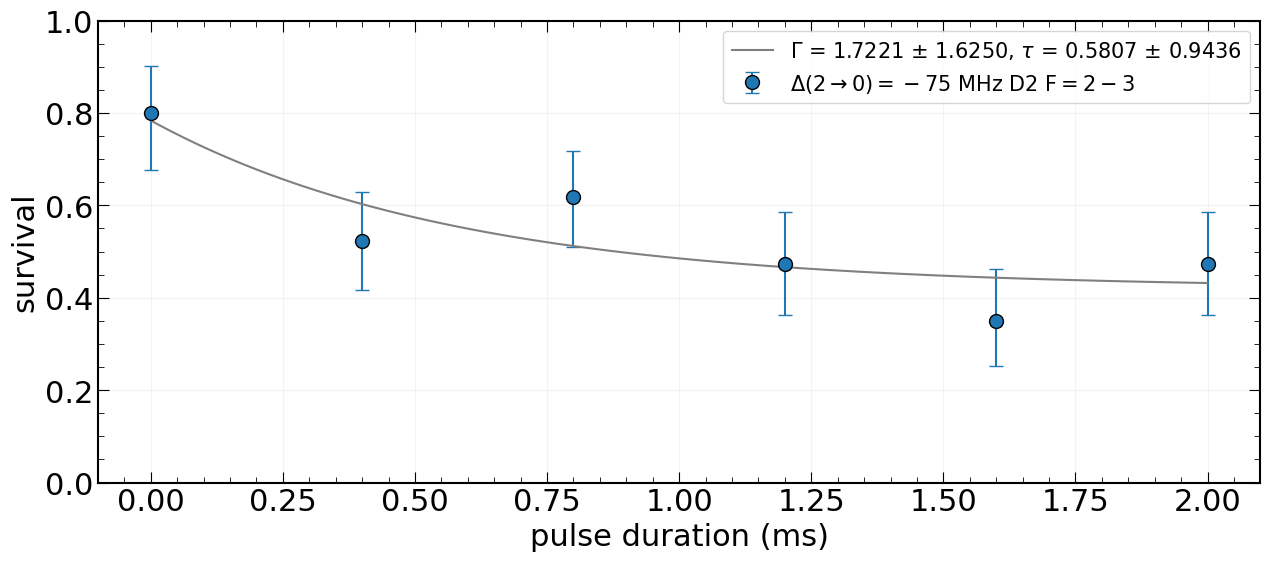

In [24]:
##pulse duration
reloadMyModules(23,'October')
fileId = 41
threshold = 60
dataset1 = ta.standardTransferAnalysis(fileId, loadTwoOpt, tOptions = [to.ThresholdOptions(manualThreshold = True, manualThresholdValue = threshold)]);
(tferAtomsVarAvg, tferAtomsVarErrs, loadAtomsVarAvg, initPicCounts, keyName, key1, repetitions, initThresholds, 
            fits, avgTferData1, avgTferErr1, avgFit, avgPics, genAvgs, genErrs, tferVarAvg, tferVarErr, initAtomImages, 
            tferAtomImages, tferPicCounts, tferThresholds, fitModules, basicInfoStr, ensembleHits, tOptions, analysisOpts,
            tferAtomsPs, tferAtomsPs, tferList, isAnnotated, hmm) = dataset1
color1 = 'tab:blue'
upperbound = []
lowerbound = []
for i in np.arange(0,len(avgTferErr1)):
    up = avgTferErr1[i][0]
    lo = avgTferErr1[i][1]
    upperbound.append(up)  
    lowerbound.append(lo)
err1= [upperbound,lowerbound]
avgTferData1[0] = .8


x_data = key1
y_data = avgTferData1
initial_guess = [max(y_data), 0.1, min(y_data)]
popt, pcov = curve_fit(decay_exponential, x_data, y_data, p0=initial_guess)
x_fit = np.linspace(min(x_data), max(x_data), 100)
y_fit = decay_exponential(x_fit, *popt)
decay_constant = popt[1]
decay_constant_uncertainty = np.sqrt(pcov[1, 1])
one_over_e_time = 1 / decay_constant
one_over_e_time_uncertainty = decay_constant_uncertainty / decay_constant

fig, ax = plt.subplots(figsize=(15, 6))
font = {'family' : 'DejaVu Sans',
        'weight' : 'normal',
        'size'   : 22}
matplotlib.rc('font', **font)
decay_constant_str = f"{decay_constant:.4f}"
decay_constant_uncertainty_str = f"{decay_constant_uncertainty:.4f}"
legend_label = fr"$\Gamma$ = {decay_constant_str} ± {decay_constant_uncertainty_str}, $\tau$ = {one_over_e_time:.4f} ± {one_over_e_time_uncertainty:.4f}"
ticks = np.arange(key1[0], max(key1),len(key1))
ax.errorbar(key1,avgTferData1, yerr=err1,ls='none',ecolor=color1,marker = 'o',markersize = 10,
            markerfacecolor=color1,markeredgecolor='k',capsize=5, label=r'$ \Delta(2 \rightarrow 0) = -75 \ \mathrm{MHz} \ \mathrm{D2 \ F=2-3} $')
plt.plot(x_fit, y_fit, 'gray',label=legend_label)
plt.legend(loc= 'upper right', ncol = 1,prop={'size': 15})
plt.ylim(0,1)
plt.ylabel('survival')
plt.xlabel(r'pulse duration (ms)')
plt.rcParams["axes.linewidth"] = 1.5
plt.ticklabel_format(style='plain') 


gamma_4SD287 = decay_constant
gamma_4SD287_unc  = decay_constant_uncertainty
tau_4SD287 = one_over_e_time
tau_4SD287_unc  = one_over_e_time_uncertainty
print('gamma =',decay_constant,'gamma uncertainty =',decay_constant_uncertainty)

# Light assisted two body loss rate

In [25]:
import scipy.constants as const
from arc import *
import random

In [26]:
def trap_depth_gaussian(pol, P, wx, wy):
    """ trap depth for a focused gaussian beam
        pol: polarizability in units of Hz m^2/W
        P: power of the beam (W)
        wx: waist along x direction in m
        wy: waist along y direction in m
        return trap depth in Hz
    """
    I0_elliptical_xy= 2*P/ (np.pi* wx * wy) #multiply waists from um to cm such 
    U0_xy = - pol * I0_elliptical_xy/4 #in Hz. Divide by 4 because we used peak electric field in the calculation
                                    #of polarizability instead of rms.
    return U0_xy

mass_Rb = 87*const.u

### Sanity check: Tweezer
1.7 mW of 852nm focused on a round waist of 0.75 um, should yieald 1 mK trap depth

In [10]:
atom = Rubidium87()
calc = DynamicPolarizability(atom, atom.groundStateN, 0, 0.5)
calc.defineBasis(atom.groundStateN, atom.groundStateN+15)

alpha0_twz, alpha1_twz, alpha2_twz, core, dynamic, closestState = calc.getPolarizability(852e-9, units="SI", accountForStateLifetime=True)

tweez_polB_GS=2*alpha0_twz*1/(const.epsilon_0*const.speed_of_light) # units of Hz m^2/W. We consider only the scalar polarizability
print("Polarization of GS with 852nm = %.3e Hz m^2/W." % (tweez_polB_GS))
U0_tweezer = trap_depth_gaussian(tweez_polB_GS, 1.76e-3, 0.707e-6, 0.707e-6) #in Hz
print("Trap depth in uK: ", U0_tweezer*const.h/const.k*1e6)

Polarization of GS with 852nm = 3.884e-02 Hz m^2/W.
Trap depth in uK:  -1044.518430852995


In [26]:

def trap_volume(T0, omega_ax, omega_rad, mass=mass_Rb):
    """
    T0 initial temperature in K
    omega_ax (rad) axial (radial) trap fequencies
    return in m^3
    """
    omega = (omega_ax * omega_rad**2)**(1/3)
    return (2*np.pi*const.k*T0/ (mass* omega**2))**(3/2)

def calc_beta(gamma,V):
    """
    gamma is the fitted two-body loss decay rate. 
    V trap volume
    return in SI units m^3/s
    """
    return gamma * 2* np.sqrt(2) * V

## Monte-Carlo simulation

In [27]:
def dq_two_body(beta_prime, N, dt):
    return beta_prime * N*(N-1)*dt/2

def dq_one_body(gamma, N, dt):
    return gamma * N *dt

def P1(U, T0, alpha, t):
    """ Survival probability of an atom due to heating. Assuming a harmonic trap and a Boltzmann energy distribution
    U: trap depth in J
    T0 initial temperature
    alpha: heating rate"""
    eta= U/ (const.k *(T0 + alpha*t))
    return 1- (1+ eta + 1/2 * eta**2) * np.exp(-eta)

def number_of_lost_atoms(key_name):
    if key_name == 'no_loss':
            return 0 # no loss
    elif key_name== 'one_loss':
            return 1 # one loss
    elif key_name== 'two_loss':
            return 2 # two loss

[0.77085714 0.72542857 0.686      0.64828571 0.61657143 0.58571429
 0.554      0.53085714 0.506      0.49314286 0.48028571 0.46314286
 0.45371429 0.43571429 0.428      0.41       0.40142857 0.39114286
 0.37657143 0.36371429 0.356      0.34057143 0.33457143 0.32514286
 0.31742857 0.308      0.29857143 0.29171429 0.28571429 0.28314286
 0.27714286 0.27371429 0.27028571 0.26514286 0.26       0.25828571
 0.25742857 0.254      0.248      0.24371429 0.24114286 0.24028571
 0.23514286 0.23257143 0.23171429 0.23       0.22828571 0.22657143
 0.22314286 0.22142857 0.22142857 0.21971429 0.21885714 0.21885714
 0.21628571 0.21628571 0.21542857 0.21542857 0.21371429 0.21371429
 0.21285714 0.212      0.21028571 0.20942857 0.20771429 0.206
 0.206      0.206      0.20514286 0.20514286 0.20514286 0.20514286
 0.20428571 0.20428571 0.20342857 0.20342857 0.20257143 0.20257143
 0.20257143 0.20257143 0.20257143 0.20257143 0.20257143 0.20257143
 0.20257143 0.20257143 0.20171429 0.20171429 0.20171429 0.20171429


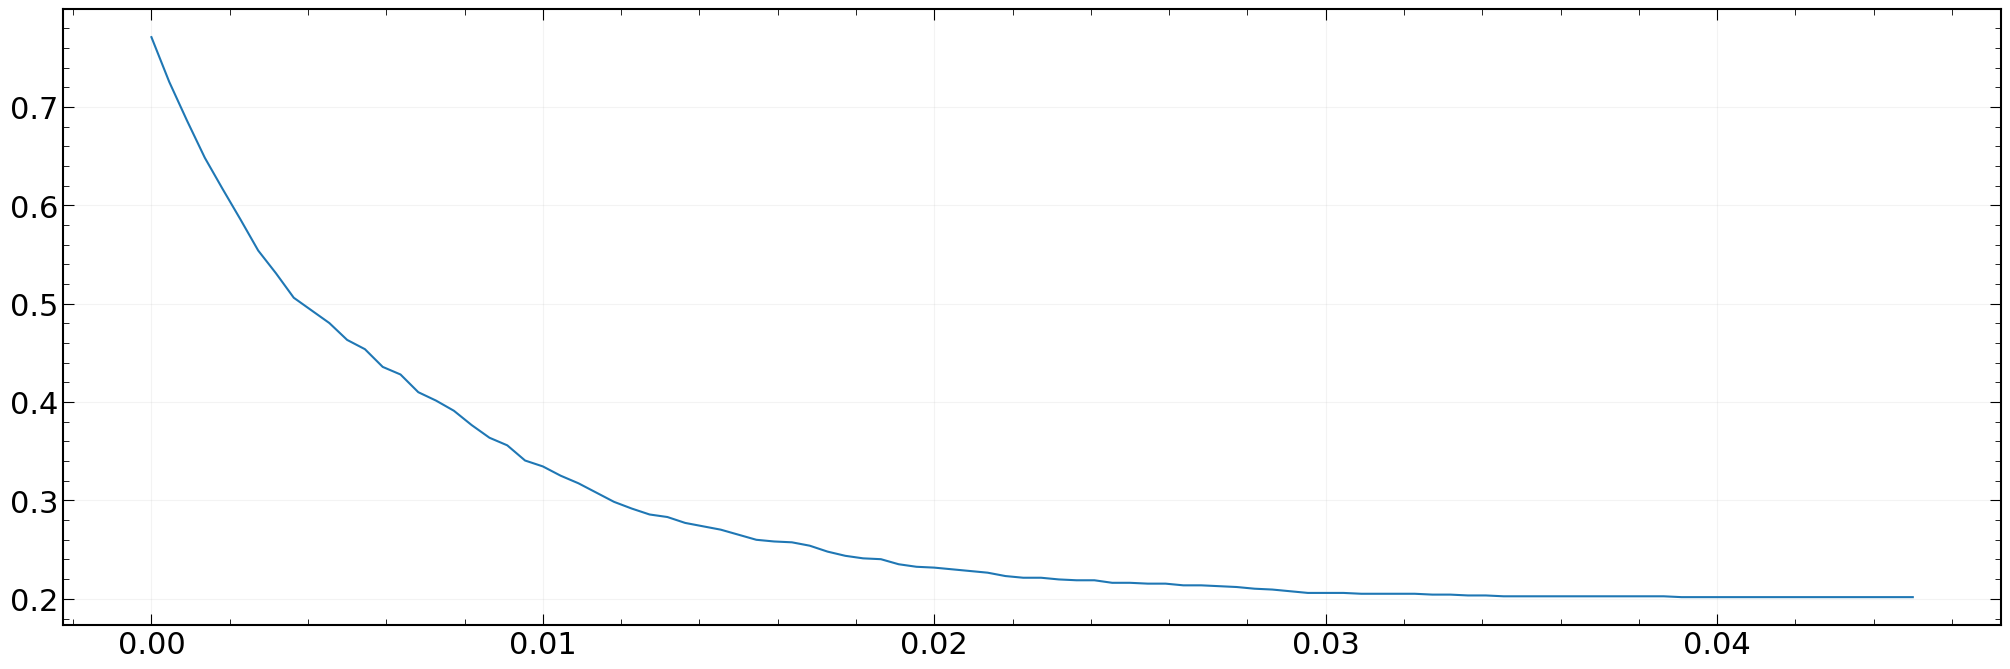

In [61]:
beta_prime = .133 *1e3 #atoms/ms
T= 15e-6
# tweezer_depth= abs(U0_tweezer_inJ)
trajectories = 700
ts = np.linspace(0, 45e-3, 100) 
dt_step = ts[1]-ts[0]
surv_sum_traj = np.zeros(len(ts))
for j in np.arange(trajectories):
    N0= 2 # intial number of atoms
    surv_dts =np.zeros(len(ts))
    surv_dts[0]= N0 
    for i in range(len(ts)):
        if (i==0):
            num_atoms_at_this_step = surv_dts[0]
        else:
            num_atoms_at_this_step = surv_dts[i-1]

        P_two_body_loss = dq_two_body(beta_prime, num_atoms_at_this_step, dt_step)
        P_one_body_loss= 0 # assuming no one body loss for now
        prob_no_loss = (1-P_one_body_loss)*(1-P_two_body_loss)
        prob_one_loss = P_one_body_loss*(1-P_two_body_loss)
        prob_two_loss = (1-P_one_body_loss)*P_two_body_loss

        prob_dict= {'no_loss': prob_no_loss, 'one_loss': prob_one_loss, 'two_loss': prob_two_loss }
        #define a probability order
        ordered_dict = (sorted(prob_dict.items(), key=lambda x:x[1])) # returns an ordered array, ordered by the probability value. eg. [('one_loss', 1), ('no_loss', 2), ('two_loss', 4)]
        #now we choose which decay channel will happen using Monte Carlo
        p_rand = random.random() 
        if p_rand < ordered_dict[0][1]: 
                surv_dts[i] = num_atoms_at_this_step - number_of_lost_atoms(ordered_dict[0][0])
        elif p_rand > ordered_dict[0][1] and p_rand < ordered_dict[1][1] : 
                surv_dts[i] = num_atoms_at_this_step - number_of_lost_atoms(ordered_dict[1][0])
        elif p_rand > ordered_dict[1][1]: 
                surv_dts[i] = num_atoms_at_this_step - number_of_lost_atoms(ordered_dict[2][0])
    
    #in theory this should be it. however in our experiment we apply a 2->1 collision if we still have two atoms at the end.
    for k in range(len(surv_dts)):
          if surv_dts[k] ==2:
                surv_dts[k] -= 1

    surv_sum_traj += surv_dts

surv_average = surv_sum_traj/ trajectories
print(.2+.6*surv_average)
plt.plot(ts, .2+.6*surv_average)

In [29]:
# lambda_l= 826e-9 
#P= 1.0e-3; wx = 0.75e-6; wy= 0.75e-6
lambda_l= 850e-9 
k_l = 2*np.pi/lambda_l
P= 1.8e-3; wx = 0.73e-6; wy= wx

# P= 0.3*1.45e-3; wx = 0.73e-6; wy= wx


atom = Rubidium87()
calc = DynamicPolarizability(atom, atom.groundStateN, 0, 0.5)
calc.defineBasis(atom.groundStateN, atom.groundStateN+15)
alpha0_twz, alpha1_twz, alpha2_twz, core, dynamic, closestState = calc.getPolarizability(lambda_l, units="SI", accountForStateLifetime=True)

tweez_polB_GS=2*alpha0_twz*1/(const.epsilon_0*const.speed_of_light) # units of Hz m^2/W. We consider only the scalar polarizability
print("Polarizability of GS with 826nm = %.3e Hz m^2/W." % (tweez_polB_GS))
U0_tweezer = trap_depth_gaussian(tweez_polB_GS, P, wx, wy) #in Hz
U0_tweezer_inJ = U0_tweezer*const.h
U0_tweezer_inK = abs(U0_tweezer*const.h/const.k)
print("Trap depth in uK: ", abs(U0_tweezer*const.h/const.k*1e6))

mass_Rb = 87*const.u
zr= np.pi * wx**2/ lambda_l
omega_parallel= np.sqrt(2* abs(U0_tweezer_inJ)/ (mass_Rb* zr**2))/ (2* np.pi)
omega_perpendicular= np.sqrt(4* abs(U0_tweezer_inJ)/ (mass_Rb* wx**2))/ (2* np.pi)
print("Trap frequency parallel: "+ str(omega_parallel/1e3)+ " kHz")
print("Trap frequency perpendicular: "+ str(omega_perpendicular/1e3)+ " kHz")


Polarizability of GS with 826nm = 3.993e-02 Hz m^2/W.
Trap depth in uK:  1030.109516830552
Trap frequency parallel: 35.85565234381349 kHz
Trap frequency perpendicular: 136.81270612406223 kHz


In [30]:
def P_survival_lin_heating(t, tau, alpha, U0= U0_tweezer_inK, T0=20e-6):
    P_vacuum = np.exp(-t/tau)
    P_heat = 1- np.exp(- U0/(T0 + alpha*t) ) * ( 1+ U0/(T0 + alpha*t) + U0**2/(2*(T0 + alpha*t)**2) )
    return P_vacuum*P_heat

Text(0.5, 1.0, 'lifetime: tau= 100 s, alpha = 137 uK s^-1')

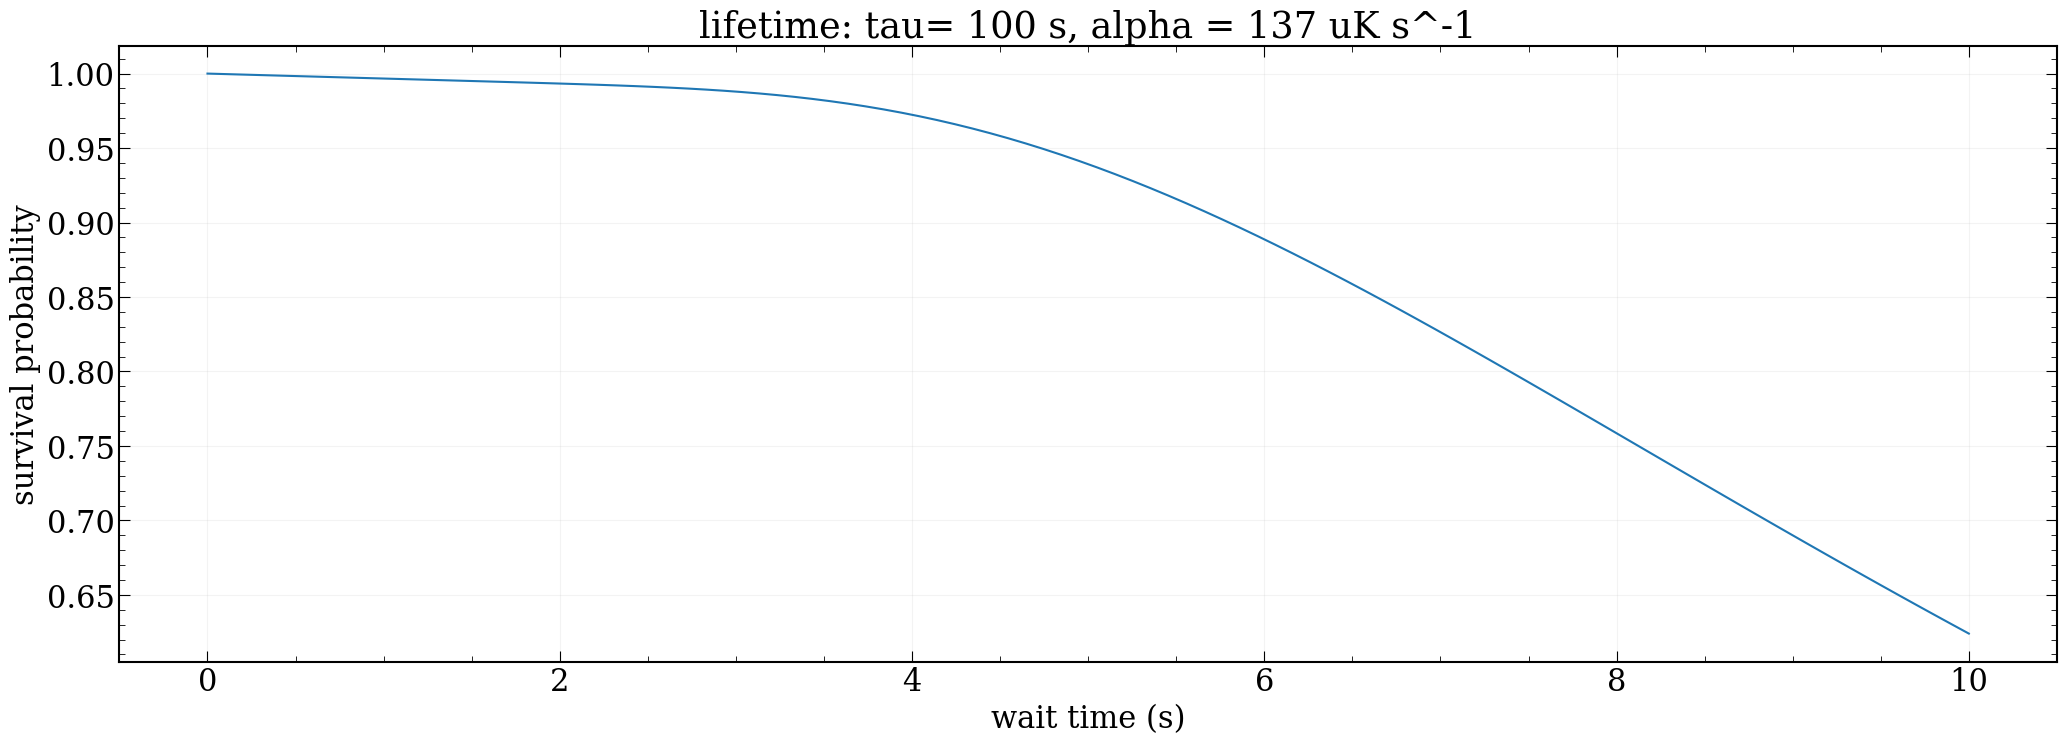

In [31]:
time= np.linspace(0,10, 100)
fig,ax = plt.subplots()
ax.plot(time,P_survival_lin_heating(time, 300, 30e-6, U0=U0_tweezer_inK, T0=10e-6) )
# ax.set_yscale('log')
ax.set_xlabel( "wait time (s)")
ax.set_ylabel("survival probability")
ax.set_title("lifetime: tau= 100 s, alpha = 137 uK s^-1")

### 8 S

Number of Pictures: 2400; Picture Dimensions: 5 x 10
Variations: 6;	Repetitions: 200;	Exp File Version: 4;
Experiment started at (H:M:S) 13:44:21: on (Y-M-D) 2023-10-24, And ended at 13:53:28: on 2023-10-24
Experiment Notes:  

Number of Pictures: 2400; Picture Dimensions: 5 x 10
Variations: 6;	Repetitions: 200;	Exp File Version: 4;
Experiment started at (H:M:S) 13:44:21: on (Y-M-D) 2023-10-24, And ended at 13:53:28: on 2023-10-24
Experiment Notes:  



NameError: name 'P_survival_lin_heating' is not defined

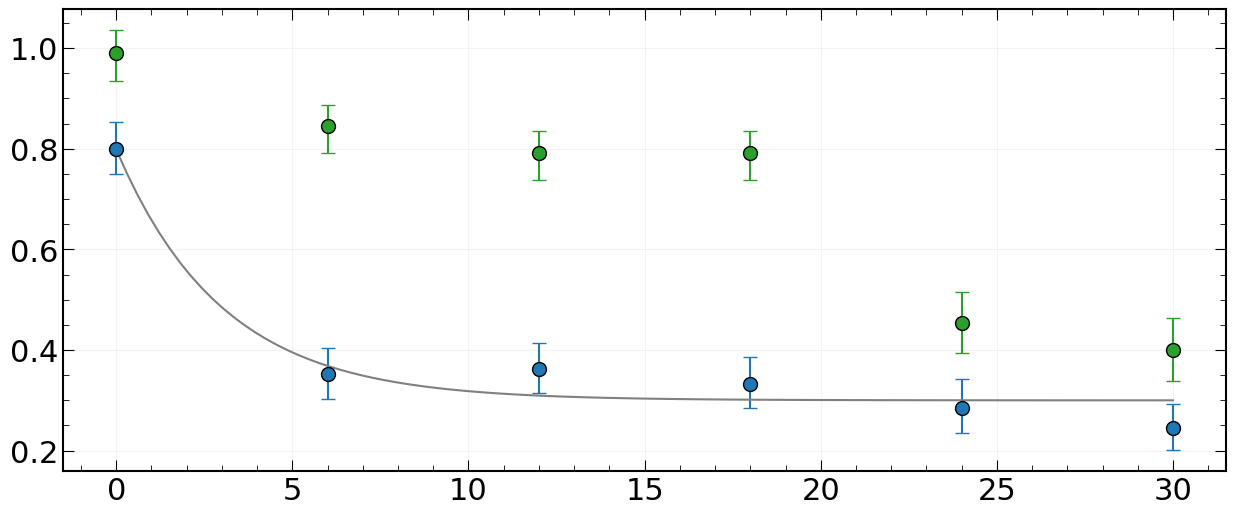

In [27]:
##pulse duration
reloadMyModules(24,'October')
fileId = 31
threshold = 120
dataset1 = ta.standardTransferAnalysis(fileId, loadTwoOpt, tOptions = [to.ThresholdOptions(manualThreshold = True, manualThresholdValue = threshold)]);
(tferAtomsVarAvg, tferAtomsVarErrs, loadAtomsVarAvg, initPicCounts, keyName, key1, repetitions, initThresholds, 
            fits, avgTferData1, avgTferErr1, avgFit, avgPics, genAvgs, genErrs, tferVarAvg, tferVarErr, initAtomImages, 
            tferAtomImages, tferPicCounts, tferThresholds, fitModules, basicInfoStr, ensembleHits, tOptions, analysisOpts,
            tferAtomsPs, tferAtomsPs, tferList, isAnnotated, hmm) = dataset1
color1 = 'tab:blue'
upperbound = []
lowerbound = []
for i in np.arange(0,len(avgTferErr1)):
    up = avgTferErr1[i][0]
    lo = avgTferErr1[i][1]
    upperbound.append(up)  
    lowerbound.append(lo)
err1= [upperbound,lowerbound]
avgTferData1[0] = .8

dataset2 = ta.standardTransferAnalysis(fileId, loadOneOpt, tOptions = [to.ThresholdOptions(manualThreshold = True, manualThresholdValue = threshold)]);
(tferAtomsVarAvg, tferAtomsVarErrs, loadAtomsVarAvg, initPicCounts, keyName, key2, repetitions, initThresholds, 
            fits, avgTferData2, avgTferErr2, avgFit, avgPics, genAvgs, genErrs, tferVarAvg, tferVarErr, initAtomImages, 
            tferAtomImages, tferPicCounts, tferThresholds, fitModules, basicInfoStr, ensembleHits, tOptions, analysisOpts,
            tferAtomsPs, tferAtomsPs, tferList, isAnnotated, hmm) = dataset2
color2 = 'tab:green'
upperbound = []
lowerbound = []
for i in np.arange(0,len(avgTferErr2)):
    up = avgTferErr2[i][0]
    lo = avgTferErr2[i][1]
    upperbound.append(up)  
    lowerbound.append(lo)
err2= [upperbound,lowerbound]
avgTferData2[0] = .99

x_data = key1
y_data = avgTferData1
initial_guess = [max(y_data), 0.1, min(y_data)]
popt, pcov = curve_fit(decay_exponential, x_data, y_data, p0=initial_guess)
x_fit = np.linspace(min(x_data), max(x_data), 100)
y_fit = decay_exponential(x_fit, *popt)
decay_constant = popt[1]
decay_constant_uncertainty = np.sqrt(pcov[1, 1])
one_over_e_time = 1 / decay_constant
one_over_e_time_uncertainty = decay_constant_uncertainty / decay_constant

fig, ax = plt.subplots(figsize=(15, 6))
font = {'family' : 'DejaVu Sans',
        'weight' : 'normal',
        'size'   : 22}
matplotlib.rc('font', **font)
decay_constant_str = f"{decay_constant:.4f}"
decay_constant_uncertainty_str = f"{decay_constant_uncertainty:.4f}"
legend_label = fr"$\Gamma$ = {decay_constant_str} ± {decay_constant_uncertainty_str}, $\tau$ = {one_over_e_time:.4f} ± {one_over_e_time_uncertainty:.4f}"
ticks = np.arange(key1[0], max(key1),len(key1))
ax.errorbar(key2,avgTferData2, yerr=err2,ls='none',ecolor=color2,marker = 'o',markersize = 10,
            markerfacecolor=color2,markeredgecolor='k',capsize=5)
ax.errorbar(key1,avgTferData1, yerr=err1,ls='none',ecolor=color1,marker = 'o',markersize = 10,
            markerfacecolor=color1,markeredgecolor='k',capsize=5)
plt.plot(x_fit, y_fit, 'gray',label=legend_label)
ax.plot(x_fit,P_survival_lin_heating(time, 30, 40e-6, U0=U0_tweezer_inK, T0=10e-6),label='heating rate = 30'  )
plt.legend(loc= 'upper right', ncol = 1,prop={'size': 15})
plt.ylim(0,1)
plt.ylabel('survival')
plt.xlabel(r'pulse duration (ms)')
plt.rcParams["axes.linewidth"] = 1.5
plt.ticklabel_format(style='plain') 


gamma_8SD287 = decay_constant
gamma_8SD287_unc  = decay_constant_uncertainty
tau_8SD287 = one_over_e_time
tau_8SD287_unc  = one_over_e_time_uncertainty
print('gamma =',decay_constant,'gamma uncertainty =',decay_constant_uncertainty)

### Plot Beta vs I 

In [28]:
def betaCalc(gamma,trap_depth,T,N): 
    KelvinToJoules = 1.380648780669e-23
    lmbda = 850e-9
    w_0 = 0.7e-6 # beam waist (radius)
    U = trap_depth*KelvinToJoules # depth in Joules
    w_r = np.sqrt(4*U/(mc.Rb87_M*w_0**2))# Hz
    w_a = w_r / (np.sqrt(2)*w_0*np.pi/lmbda) # Hz
    # w_r = 135000*(2*np.pi)
    # w_a = 25000*(2*np.pi)
    w = (w_r**2 * w_a)**(1/3)
    V = ((2*np.pi*mc.k_B * T/(mc.Rb87_M*w**2))**(3/2))*1e6
    beta = gamma*1e3*V*2*np.sqrt(2)*N*(N-1)
    # print('beta',beta,w_r/(2*np.pi),w_a/(2*np.pi))
    return beta


In [29]:
I = [0.1,0.5,1,2,4,8]
trapDepth=.25e-3
temp = 20e-6
beta_p1SD287 = betaCalc(gamma_p1SD287,trapDepth,temp,2)
beta_p5SD287 = betaCalc(gamma_p5SD287,trapDepth,temp,2)
beta_SD287 = betaCalc(gamma_SD287,trapDepth,temp,2)
beta_2SD287 = betaCalc(gamma_2SD287,trapDepth,temp,2)
beta_4SD287 = betaCalc(gamma_4SD287,trapDepth,temp,2)
beta_8SD287 = betaCalc(gamma_8SD287,trapDepth,temp,2)
beta_p1SD287_unc = betaCalc(gamma_p1SD287_unc,trapDepth,temp,2)
beta_p5SD287_unc = betaCalc(gamma_p5SD287_unc,trapDepth,temp,2)
beta_SD287_unc = betaCalc(gamma_SD287_unc,trapDepth,temp,2)
beta_2SD287_unc = betaCalc(gamma_2SD287_unc,trapDepth,temp,2)
beta_4SD287_unc = betaCalc(gamma_4SD287_unc,trapDepth,temp,2)
beta_8SD287_unc = betaCalc(gamma_8SD287_unc,trapDepth,temp,2)

beta = [beta_p1SD187,beta_p5SD187,beta_SD187,beta_2SD187,beta_4SD187,beta_8SD187]
beta_unc = [beta_p1SD187_unc,beta_p5SD187_unc,beta_SD187_unc,beta_2SD187_unc,beta_4SD187_unc,beta_8SD187_unc]
beta_error = [beta_unc,beta_unc]

color1 = 'tab:blue'
fig, ax = plt.subplots(figsize=(10, 6))
font = {'family' : 'DejaVu Sans',
        'weight' : 'normal',
        'size'   : 22}
matplotlib.rc('font', **font)
ax.errorbar(I,beta, yerr=beta_error,ls='none',ecolor=color1,marker = 'o',markersize = 10,
            markerfacecolor=color1,markeredgecolor='k',capsize=5)
# ax.set_ylim(1e-20,1.5e-12)
# ax.set_yscale('log')
plt.ylabel(r'$ \beta \ \ \mathrm{(cm^3s^{-1})} $')
plt.xlabel(r'$\mathrm{T_0 \ (\mu K)}$')
plt.title(r'U = 10 MHz, $ \Delta = -87.5 \ \mathrm{(MHz) \ D1 \ F=2-2}$',fontsize=15) 
plt.rcParams["axes.linewidth"] = 1.5
# plt.ticklabel_format(style='plain') 

NameError: name 'gamma_SD287' is not defined

## Beta vs Intensity -  Non-retro beam (quant. axis), U=10 MHz, $\Delta = 87.5$ D1 F=2-2' 

### 0.1 S

Number of Pictures: 1200; Picture Dimensions: 5 x 10
Variations: 6;	Repetitions: 100;	Exp File Version: 4;
Experiment started at (H:M:S) 9:18:58: on (Y-M-D) 2023-10-24, And ended at 9:26:5: on 2023-10-24
Experiment Notes: HDF5 NOT ANNOTATED: please call exp.Annotate() to annotate this file.

gamma = 0.010307756512654793 gamma uncertainty = 0.003687284672630624


/var/folders/p1/sslzk5t517d2pwp06md4xf_w0000gn/T/ipykernel_1154/604109091.py:2: RuntimeWarning:

overflow encountered in exp



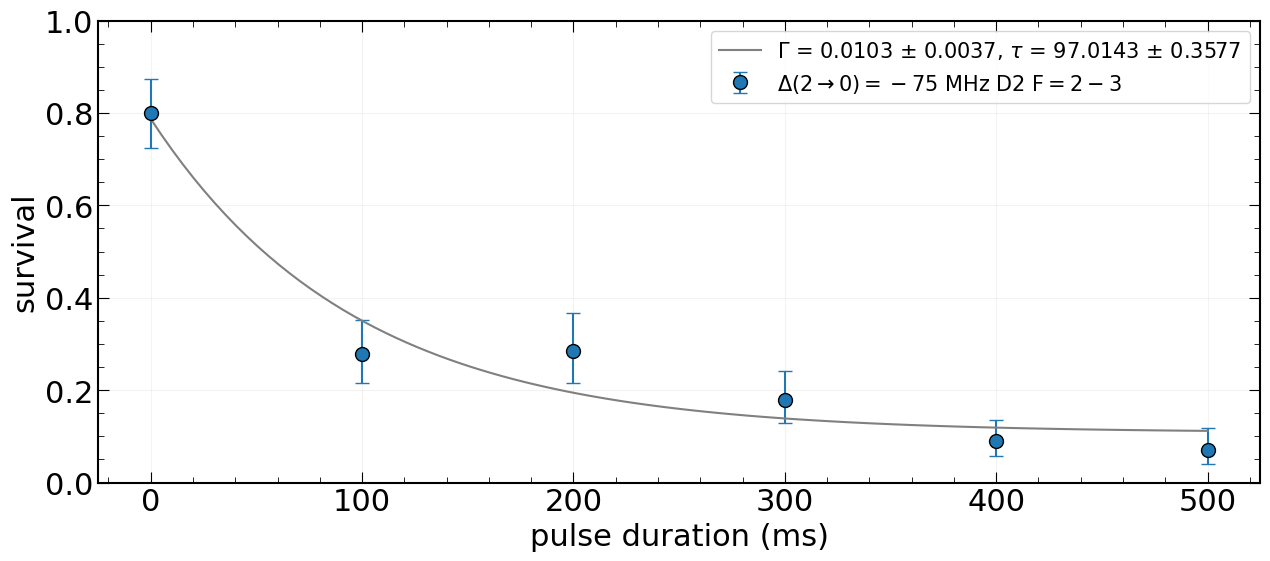

In [30]:
##pulse duration
reloadMyModules(24,'October')
fileId = 12
threshold = 80
dataset1 = ta.standardTransferAnalysis(fileId, loadTwoOpt, tOptions = [to.ThresholdOptions(manualThreshold = True, manualThresholdValue = threshold)]);
(tferAtomsVarAvg, tferAtomsVarErrs, loadAtomsVarAvg, initPicCounts, keyName, key1, repetitions, initThresholds, 
            fits, avgTferData1, avgTferErr1, avgFit, avgPics, genAvgs, genErrs, tferVarAvg, tferVarErr, initAtomImages, 
            tferAtomImages, tferPicCounts, tferThresholds, fitModules, basicInfoStr, ensembleHits, tOptions, analysisOpts,
            tferAtomsPs, tferAtomsPs, tferList, isAnnotated, hmm) = dataset1
color1 = 'tab:blue'
upperbound = []
lowerbound = []
for i in np.arange(0,len(avgTferErr1)):
    up = avgTferErr1[i][0]
    lo = avgTferErr1[i][1]
    upperbound.append(up)  
    lowerbound.append(lo)
err1= [upperbound,lowerbound]
avgTferData1[0] = 0.8

x_data = key1
y_data = avgTferData1
initial_guess = [max(y_data), 0.1, min(y_data)]
popt, pcov = curve_fit(decay_exponential, x_data, y_data, p0=initial_guess)
x_fit = np.linspace(min(x_data), max(x_data), 100)
y_fit = decay_exponential(x_fit, *popt)
decay_constant = popt[1]
decay_constant_uncertainty = np.sqrt(pcov[1, 1])
one_over_e_time = 1 / decay_constant
one_over_e_time_uncertainty = decay_constant_uncertainty / decay_constant

fig, ax = plt.subplots(figsize=(15, 6))
font = {'family' : 'DejaVu Sans',
        'weight' : 'normal',
        'size'   : 22}
matplotlib.rc('font', **font)
decay_constant_str = f"{decay_constant:.4f}"
decay_constant_uncertainty_str = f"{decay_constant_uncertainty:.4f}"
legend_label = fr"$\Gamma$ = {decay_constant_str} ± {decay_constant_uncertainty_str}, $\tau$ = {one_over_e_time:.4f} ± {one_over_e_time_uncertainty:.4f}"
ticks = np.arange(key1[0], max(key1),len(key1))
ax.errorbar(key1,avgTferData1, yerr=err1,ls='none',ecolor=color1,marker = 'o',markersize = 10,
            markerfacecolor=color1,markeredgecolor='k',capsize=5, label=r'$ \Delta(2 \rightarrow 0) = -75 \ \mathrm{MHz} \ \mathrm{D2 \ F=2-3} $')
plt.plot(x_fit, y_fit, 'gray',label=legend_label)
plt.legend(loc= 'upper right', ncol = 1,prop={'size': 15})
plt.ylim(0,1)
plt.ylabel('survival')
plt.xlabel(r'pulse duration (ms)')
plt.rcParams["axes.linewidth"] = 1.5
plt.ticklabel_format(style='plain') 


gamma_p1SD187_QA = decay_constant
gamma_p1SD187_QA_unc  = decay_constant_uncertainty
tau_p1SD187_QA = one_over_e_time
tau_p1SD187_QA_unc  = one_over_e_time_uncertainty
print('gamma =',decay_constant,'gamma uncertainty =',decay_constant_uncertainty)

### 0.5 S

Number of Pictures: 2400; Picture Dimensions: 5 x 10
Variations: 6;	Repetitions: 200;	Exp File Version: 4;
Experiment started at (H:M:S) 14:32:56: on (Y-M-D) 2023-10-24, And ended at 14:42:2: on 2023-10-24
Experiment Notes: HDF5 NOT ANNOTATED: please call exp.Annotate() to annotate this file.

gamma = 0.11601763530616029 gamma uncertainty = 0.011427423011652844


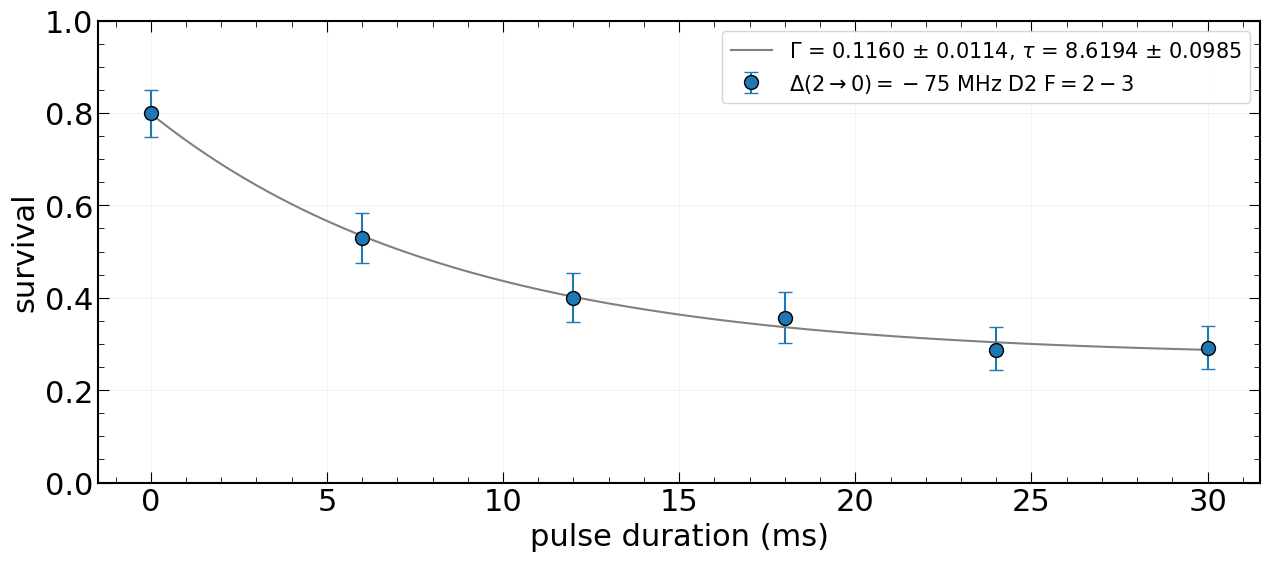

In [31]:
##pulse duration
reloadMyModules(24,'October')
fileId = 35
threshold = 60
dataset1 = ta.standardTransferAnalysis(fileId, loadTwoOpt, tOptions = [to.ThresholdOptions(manualThreshold = True, manualThresholdValue = threshold)]);
(tferAtomsVarAvg, tferAtomsVarErrs, loadAtomsVarAvg, initPicCounts, keyName, key1, repetitions, initThresholds, 
            fits, avgTferData1, avgTferErr1, avgFit, avgPics, genAvgs, genErrs, tferVarAvg, tferVarErr, initAtomImages, 
            tferAtomImages, tferPicCounts, tferThresholds, fitModules, basicInfoStr, ensembleHits, tOptions, analysisOpts,
            tferAtomsPs, tferAtomsPs, tferList, isAnnotated, hmm) = dataset1
color1 = 'tab:blue'
upperbound = []
lowerbound = []
for i in np.arange(0,len(avgTferErr1)):
    up = avgTferErr1[i][0]
    lo = avgTferErr1[i][1]
    upperbound.append(up)  
    lowerbound.append(lo)
err1= [upperbound,lowerbound]
avgTferData1[0] = 0.8

x_data = key1
y_data = avgTferData1
initial_guess = [max(y_data), 0.1, min(y_data)]
popt, pcov = curve_fit(decay_exponential, x_data, y_data, p0=initial_guess)
x_fit = np.linspace(min(x_data), max(x_data), 100)
y_fit = decay_exponential(x_fit, *popt)
decay_constant = popt[1]
decay_constant_uncertainty = np.sqrt(pcov[1, 1])
one_over_e_time = 1 / decay_constant
one_over_e_time_uncertainty = decay_constant_uncertainty / decay_constant

fig, ax = plt.subplots(figsize=(15, 6))
font = {'family' : 'DejaVu Sans',
        'weight' : 'normal',
        'size'   : 22}
matplotlib.rc('font', **font)
decay_constant_str = f"{decay_constant:.4f}"
decay_constant_uncertainty_str = f"{decay_constant_uncertainty:.4f}"
legend_label = fr"$\Gamma$ = {decay_constant_str} ± {decay_constant_uncertainty_str}, $\tau$ = {one_over_e_time:.4f} ± {one_over_e_time_uncertainty:.4f}"
ticks = np.arange(key1[0], max(key1),len(key1))
ax.errorbar(key1,avgTferData1, yerr=err1,ls='none',ecolor=color1,marker = 'o',markersize = 10,
            markerfacecolor=color1,markeredgecolor='k',capsize=5, label=r'$ \Delta(2 \rightarrow 0) = -75 \ \mathrm{MHz} \ \mathrm{D2 \ F=2-3} $')
plt.plot(x_fit, y_fit, 'gray',label=legend_label)
plt.legend(loc= 'upper right', ncol = 1,prop={'size': 15})
plt.ylim(0,1)
plt.ylabel('survival')
plt.xlabel(r'pulse duration (ms)')
plt.rcParams["axes.linewidth"] = 1.5
plt.ticklabel_format(style='plain') 


gamma_p5SD187_QA = decay_constant
gamma_p5SD187_QA_unc = decay_constant_uncertainty
tau_p5SD187_QA = one_over_e_time
tau_p5SD187_QA_unc = one_over_e_time_uncertainty
print('gamma =',decay_constant,'gamma uncertainty =',decay_constant_uncertainty)

### 1 S

Number of Pictures: 2400; Picture Dimensions: 5 x 10
Variations: 6;	Repetitions: 200;	Exp File Version: 4;
Experiment started at (H:M:S) 13:33:36: on (Y-M-D) 2023-10-24, And ended at 13:42:43: on 2023-10-24
Experiment Notes: HDF5 NOT ANNOTATED: please call exp.Annotate() to annotate this file.

gamma = 0.16219135545470104 gamma uncertainty = 0.014632922367169022


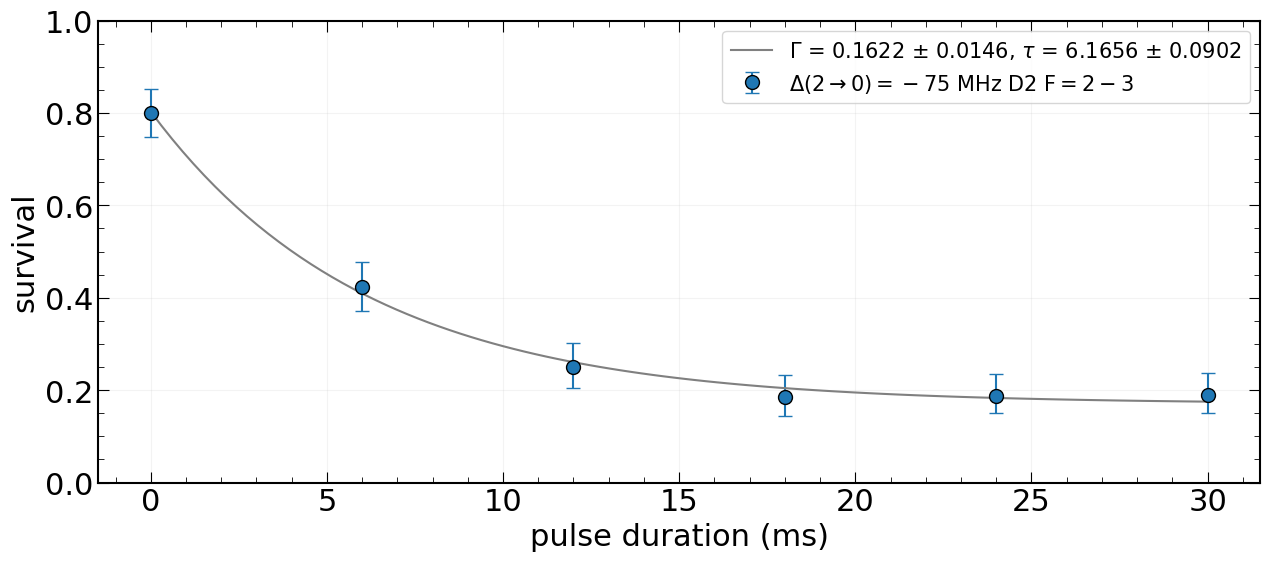

In [32]:
##pulse duration
reloadMyModules(24,'October')
fileId = 30
threshold = 80
dataset1 = ta.standardTransferAnalysis(fileId, loadTwoOpt, tOptions = [to.ThresholdOptions(manualThreshold = True, manualThresholdValue = threshold)]);
(tferAtomsVarAvg, tferAtomsVarErrs, loadAtomsVarAvg, initPicCounts, keyName, key1, repetitions, initThresholds, 
            fits, avgTferData1, avgTferErr1, avgFit, avgPics, genAvgs, genErrs, tferVarAvg, tferVarErr, initAtomImages, 
            tferAtomImages, tferPicCounts, tferThresholds, fitModules, basicInfoStr, ensembleHits, tOptions, analysisOpts,
            tferAtomsPs, tferAtomsPs, tferList, isAnnotated, hmm) = dataset1
color1 = 'tab:blue'
upperbound = []
lowerbound = []
for i in np.arange(0,len(avgTferErr1)):
    up = avgTferErr1[i][0]
    lo = avgTferErr1[i][1]
    upperbound.append(up)  
    lowerbound.append(lo)
err1= [upperbound,lowerbound]
avgTferData1[0] = 0.8

x_data = key1
y_data = avgTferData1
initial_guess = [max(y_data), 0.1, min(y_data)]
popt, pcov = curve_fit(decay_exponential, x_data, y_data, p0=initial_guess)
x_fit = np.linspace(min(x_data), max(x_data), 100)
y_fit = decay_exponential(x_fit, *popt)
decay_constant = popt[1]
decay_constant_uncertainty = np.sqrt(pcov[1, 1])
one_over_e_time = 1 / decay_constant
one_over_e_time_uncertainty = decay_constant_uncertainty / decay_constant

fig, ax = plt.subplots(figsize=(15, 6))
font = {'family' : 'DejaVu Sans',
        'weight' : 'normal',
        'size'   : 22}
matplotlib.rc('font', **font)
decay_constant_str = f"{decay_constant:.4f}"
decay_constant_uncertainty_str = f"{decay_constant_uncertainty:.4f}"
legend_label = fr"$\Gamma$ = {decay_constant_str} ± {decay_constant_uncertainty_str}, $\tau$ = {one_over_e_time:.4f} ± {one_over_e_time_uncertainty:.4f}"
ticks = np.arange(key1[0], max(key1),len(key1))
ax.errorbar(key1,avgTferData1, yerr=err1,ls='none',ecolor=color1,marker = 'o',markersize = 10,
            markerfacecolor=color1,markeredgecolor='k',capsize=5, label=r'$ \Delta(2 \rightarrow 0) = -75 \ \mathrm{MHz} \ \mathrm{D2 \ F=2-3} $')
plt.plot(x_fit, y_fit, 'gray',label=legend_label)
plt.legend(loc= 'upper right', ncol = 1,prop={'size': 15})
plt.ylim(0,1)
plt.ylabel('survival')
plt.xlabel(r'pulse duration (ms)')
plt.rcParams["axes.linewidth"] = 1.5
plt.ticklabel_format(style='plain') 


gamma_SD187_QA = decay_constant
gamma_SD187_QA_unc = decay_constant_uncertainty
tau_SD187_QA = one_over_e_time
tau_SD187_QA_unc  = one_over_e_time_uncertainty
print('gamma =',decay_constant,'gamma uncertainty =',decay_constant_uncertainty)

### 2 S

Number of Pictures: 2400; Picture Dimensions: 5 x 10
Variations: 6;	Repetitions: 200;	Exp File Version: 4;
Experiment started at (H:M:S) 13:44:21: on (Y-M-D) 2023-10-24, And ended at 13:53:28: on 2023-10-24
Experiment Notes:  

gamma = 0.16818402335237848 gamma uncertainty = 0.03916392531301733


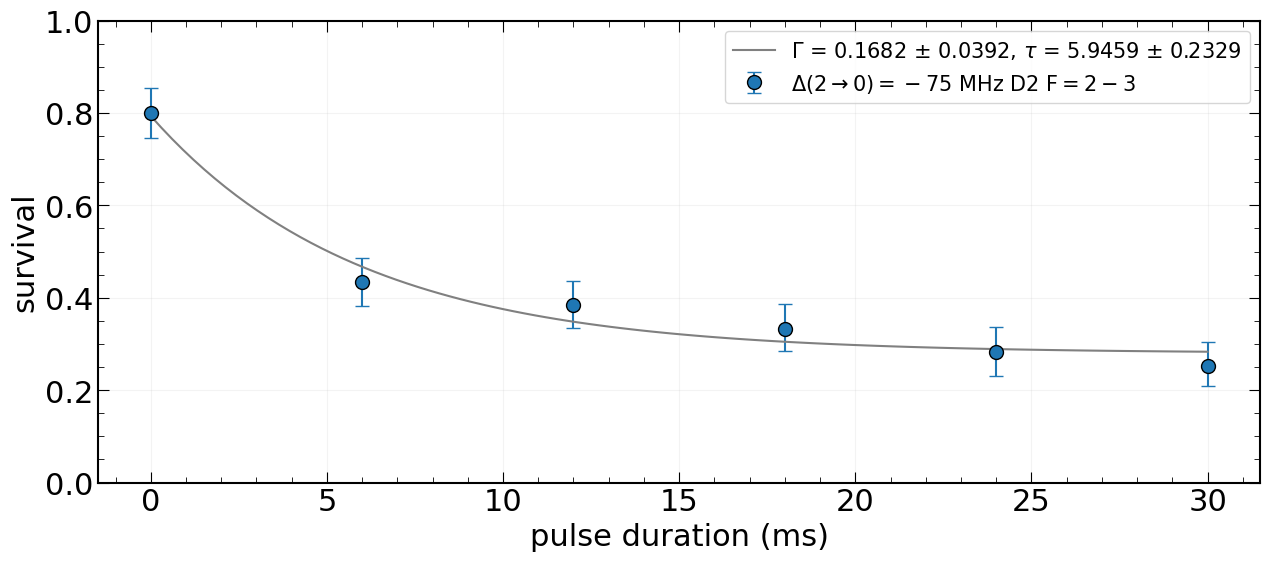

In [33]:
##pulse duration
reloadMyModules(24,'October')
fileId = 31
threshold = 75
dataset1 = ta.standardTransferAnalysis(fileId, loadTwoOpt, tOptions = [to.ThresholdOptions(manualThreshold = True, manualThresholdValue = threshold)]);
(tferAtomsVarAvg, tferAtomsVarErrs, loadAtomsVarAvg, initPicCounts, keyName, key1, repetitions, initThresholds, 
            fits, avgTferData1, avgTferErr1, avgFit, avgPics, genAvgs, genErrs, tferVarAvg, tferVarErr, initAtomImages, 
            tferAtomImages, tferPicCounts, tferThresholds, fitModules, basicInfoStr, ensembleHits, tOptions, analysisOpts,
            tferAtomsPs, tferAtomsPs, tferList, isAnnotated, hmm) = dataset1
color1 = 'tab:blue'
upperbound = []
lowerbound = []
for i in np.arange(0,len(avgTferErr1)):
    up = avgTferErr1[i][0]
    lo = avgTferErr1[i][1]
    upperbound.append(up)  
    lowerbound.append(lo)
err1= [upperbound,lowerbound]
avgTferData1[0] = 0.8

x_data = key1
y_data = avgTferData1
initial_guess = [max(y_data), 0.1, min(y_data)]
popt, pcov = curve_fit(decay_exponential, x_data, y_data, p0=initial_guess)
x_fit = np.linspace(min(x_data), max(x_data), 100)
y_fit = decay_exponential(x_fit, *popt)
decay_constant = popt[1]
decay_constant_uncertainty = np.sqrt(pcov[1, 1])
one_over_e_time = 1 / decay_constant
one_over_e_time_uncertainty = decay_constant_uncertainty / decay_constant

fig, ax = plt.subplots(figsize=(15, 6))
font = {'family' : 'DejaVu Sans',
        'weight' : 'normal',
        'size'   : 22}
matplotlib.rc('font', **font)
decay_constant_str = f"{decay_constant:.4f}"
decay_constant_uncertainty_str = f"{decay_constant_uncertainty:.4f}"
legend_label = fr"$\Gamma$ = {decay_constant_str} ± {decay_constant_uncertainty_str}, $\tau$ = {one_over_e_time:.4f} ± {one_over_e_time_uncertainty:.4f}"
ticks = np.arange(key1[0], max(key1),len(key1))
ax.errorbar(key1,avgTferData1, yerr=err1,ls='none',ecolor=color1,marker = 'o',markersize = 10,
            markerfacecolor=color1,markeredgecolor='k',capsize=5, label=r'$ \Delta(2 \rightarrow 0) = -75 \ \mathrm{MHz} \ \mathrm{D2 \ F=2-3} $')
plt.plot(x_fit, y_fit, 'gray',label=legend_label)
plt.legend(loc= 'upper right', ncol = 1,prop={'size': 15})
plt.ylim(0,1)
plt.ylabel('survival')
plt.xlabel(r'pulse duration (ms)')
plt.rcParams["axes.linewidth"] = 1.5
plt.ticklabel_format(style='plain') 


gamma_2SD187_QA = decay_constant
gamma_2SD187_QA_unc = decay_constant_uncertainty
tau_2SD187_QA = one_over_e_time
tau_2SD187_QA_unc  = one_over_e_time_uncertainty
print('gamma =',decay_constant,'gamma uncertainty =',decay_constant_uncertainty)

### 3 S

Number of Pictures: 1200; Picture Dimensions: 5 x 10
Variations: 6;	Repetitions: 100;	Exp File Version: 4;
Experiment started at (H:M:S) 13:12:12: on (Y-M-D) 2023-10-24, And ended at 13:16:55: on 2023-10-24
Experiment Notes: HDF5 NOT ANNOTATED: please call exp.Annotate() to annotate this file.

gamma = 0.13493812284700096 gamma uncertainty = 0.02195923916764229


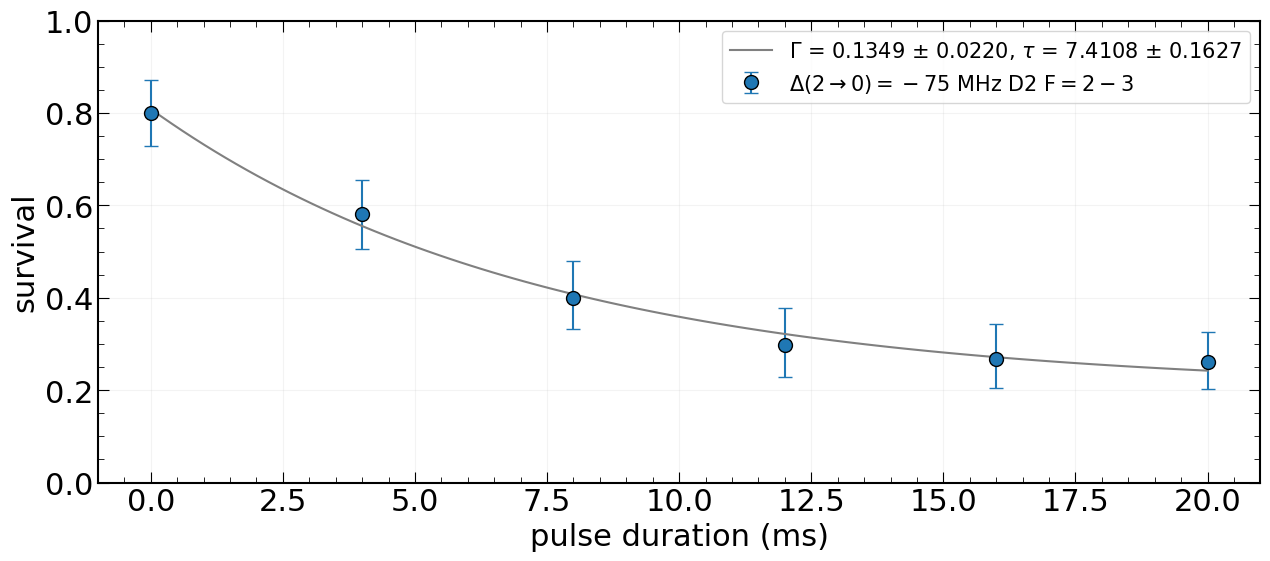

In [34]:
##pulse duration
reloadMyModules(24,'October')
fileId = 27
threshold = 70
dataset1 = ta.standardTransferAnalysis(fileId, loadTwoOpt, tOptions = [to.ThresholdOptions(manualThreshold = True, manualThresholdValue = threshold)]);
(tferAtomsVarAvg, tferAtomsVarErrs, loadAtomsVarAvg, initPicCounts, keyName, key1, repetitions, initThresholds, 
            fits, avgTferData1, avgTferErr1, avgFit, avgPics, genAvgs, genErrs, tferVarAvg, tferVarErr, initAtomImages, 
            tferAtomImages, tferPicCounts, tferThresholds, fitModules, basicInfoStr, ensembleHits, tOptions, analysisOpts,
            tferAtomsPs, tferAtomsPs, tferList, isAnnotated, hmm) = dataset1
color1 = 'tab:blue'
upperbound = []
lowerbound = []
for i in np.arange(0,len(avgTferErr1)):
    up = avgTferErr1[i][0]
    lo = avgTferErr1[i][1]
    upperbound.append(up)  
    lowerbound.append(lo)
err1= [upperbound,lowerbound]
avgTferData1[0] = 0.8
avgTferData1[2] = 0.4
x_data = key1
y_data = avgTferData1
initial_guess = [max(y_data), 0.1, min(y_data)]
popt, pcov = curve_fit(decay_exponential, x_data, y_data, p0=initial_guess)
x_fit = np.linspace(min(x_data), max(x_data), 100)
y_fit = decay_exponential(x_fit, *popt)
decay_constant = popt[1]
decay_constant_uncertainty = np.sqrt(pcov[1, 1])
one_over_e_time = 1 / decay_constant
one_over_e_time_uncertainty = decay_constant_uncertainty / decay_constant

fig, ax = plt.subplots(figsize=(15, 6))
font = {'family' : 'DejaVu Sans',
        'weight' : 'normal',
        'size'   : 22}
matplotlib.rc('font', **font)
decay_constant_str = f"{decay_constant:.4f}"
decay_constant_uncertainty_str = f"{decay_constant_uncertainty:.4f}"
legend_label = fr"$\Gamma$ = {decay_constant_str} ± {decay_constant_uncertainty_str}, $\tau$ = {one_over_e_time:.4f} ± {one_over_e_time_uncertainty:.4f}"
ticks = np.arange(key1[0], max(key1),len(key1))
ax.errorbar(key1,avgTferData1, yerr=err1,ls='none',ecolor=color1,marker = 'o',markersize = 10,
            markerfacecolor=color1,markeredgecolor='k',capsize=5, label=r'$ \Delta(2 \rightarrow 0) = -75 \ \mathrm{MHz} \ \mathrm{D2 \ F=2-3} $')
plt.plot(x_fit, y_fit, 'gray',label=legend_label)
plt.legend(loc= 'upper right', ncol = 1,prop={'size': 15})
plt.ylim(0,1)
plt.ylabel('survival')
plt.xlabel(r'pulse duration (ms)')
plt.rcParams["axes.linewidth"] = 1.5
plt.ticklabel_format(style='plain') 


gamma_3SD187_QA = decay_constant
gamma_3SD187_QA_unc = decay_constant_uncertainty
tau_3SD187_QA = one_over_e_time
tau_3SD187_QA_unc  = one_over_e_time_uncertainty
print('gamma =',decay_constant,'gamma uncertainty =',decay_constant_uncertainty)

### Plot Beta vs I 

In [35]:
def betaCalc(gamma,trap_depth,T,N): 
    KelvinToJoules = 1.380648780669e-23
    lmbda = 850e-9
    w_0 = 0.7e-6 # beam waist (radius)
    U = trap_depth*KelvinToJoules # depth in Joules
    w_r = np.sqrt(4*U/(mc.Rb87_M*w_0**2))# Hz
    w_a = w_r / (np.sqrt(2)*w_0*np.pi/lmbda) # Hz
    # w_r = 135000*(2*np.pi)
    # w_a = 25000*(2*np.pi)
    w = (w_r**2 * w_a)**(1/3)
    V = ((2*np.pi*mc.k_B * T/(mc.Rb87_M*w**2))**(3/2))*1e6
    beta = gamma*1e3*V*2*np.sqrt(2)*N*(N-1)
    # print('beta',beta,w_r/(2*np.pi),w_a/(2*np.pi))
    return beta


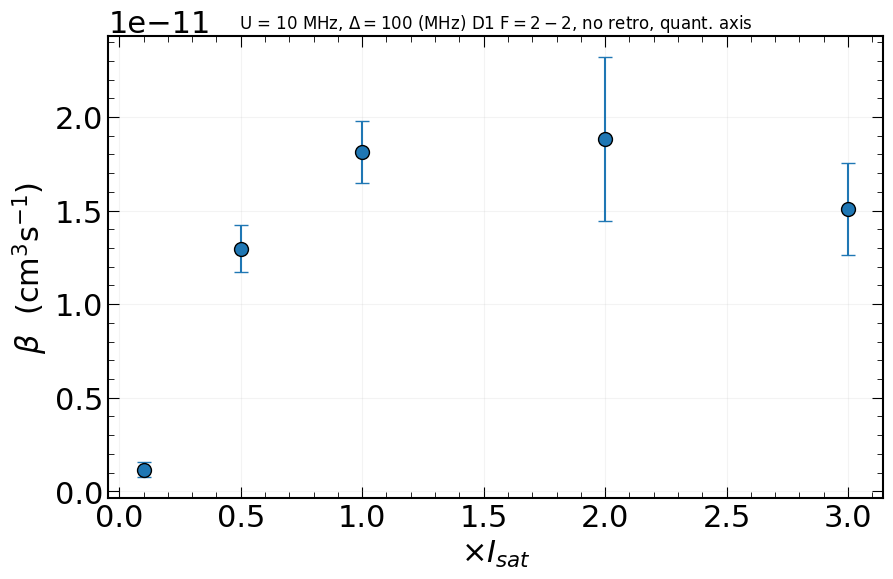

In [36]:
I = [0.1,0.5,1,2,3]
trapDepth=.5e-3
temp = 20e-6
beta_p1SD187_QA = betaCalc(gamma_p1SD187_QA,trapDepth,temp,2)
beta_p5SD187_QA = betaCalc(gamma_p5SD187_QA,trapDepth,temp,2)
beta_SD187_QA = betaCalc(gamma_SD187_QA,trapDepth,temp,2)
beta_2SD187_QA = betaCalc(gamma_2SD187_QA,trapDepth,temp,2)
beta_3SD187_QA = betaCalc(gamma_3SD187_QA,trapDepth,temp,2)
beta_p1SD187_QA_unc = betaCalc(gamma_p1SD187_QA_unc,trapDepth,temp,2)
beta_p5SD187_QA_unc = betaCalc(gamma_p5SD187_QA_unc,trapDepth,temp,2)
beta_SD187_QA_unc = betaCalc(gamma_SD187_QA_unc,trapDepth,temp,2)
beta_2SD187_QA_unc = betaCalc(gamma_2SD187_QA_unc,trapDepth,temp,2)
beta_3SD187_QA_unc = betaCalc(gamma_3SD187_QA_unc,trapDepth,temp,2)
beta_QA = [beta_p1SD187_QA,beta_p5SD187_QA,beta_SD187_QA,beta_2SD187_QA,beta_3SD187_QA]
beta_QA_unc = [beta_p1SD187_QA_unc,beta_p5SD187_QA_unc,beta_SD187_QA_unc,beta_2SD187_QA_unc,beta_3SD187_QA_unc]
beta_error_QA = [beta_QA_unc,beta_QA_unc]

color1 = 'tab:blue'
fig, ax = plt.subplots(figsize=(10, 6))
font = {'family' : 'DejaVu Sans',
        'weight' : 'normal',
        'size'   : 22}
matplotlib.rc('font', **font)
ax.errorbar(I,beta_QA, yerr=beta_error_QA,ls='none',ecolor=color1,marker = 'o',markersize = 10,
            markerfacecolor=color1,markeredgecolor='k',capsize=5)
# ax.set_ylim(1e-20,1.5e-12)
# ax.set_yscale('log')
plt.ylabel(r'$ \beta \ \ \mathrm{(cm^3s^{-1})} $')
plt.xlabel(r'$\times I_{sat}$')
plt.title(r'U = 10 MHz, $ \Delta = 100 \ \mathrm{(MHz) \ D1 \ F=2-2}$, no retro, quant. axis',fontsize=12) 
plt.rcParams["axes.linewidth"] = 1.5
# plt.ticklabel_format(style='plain') 

## Beta vs Intensity -  Non-retro beam (zero fields), U=10 MHz, $\Delta = 87.5$ D1 F=2-2' 

### 0.1 S

Number of Pictures: 2400; Picture Dimensions: 5 x 10
Variations: 6;	Repetitions: 200;	Exp File Version: 4;
Experiment started at (H:M:S) 15:3:6: on (Y-M-D) 2023-10-24, And ended at 15:12:52: on 2023-10-24
Experiment Notes: HDF5 NOT ANNOTATED: please call exp.Annotate() to annotate this file.

gamma = 0.05575588703557318 gamma uncertainty = 0.01978552376381623


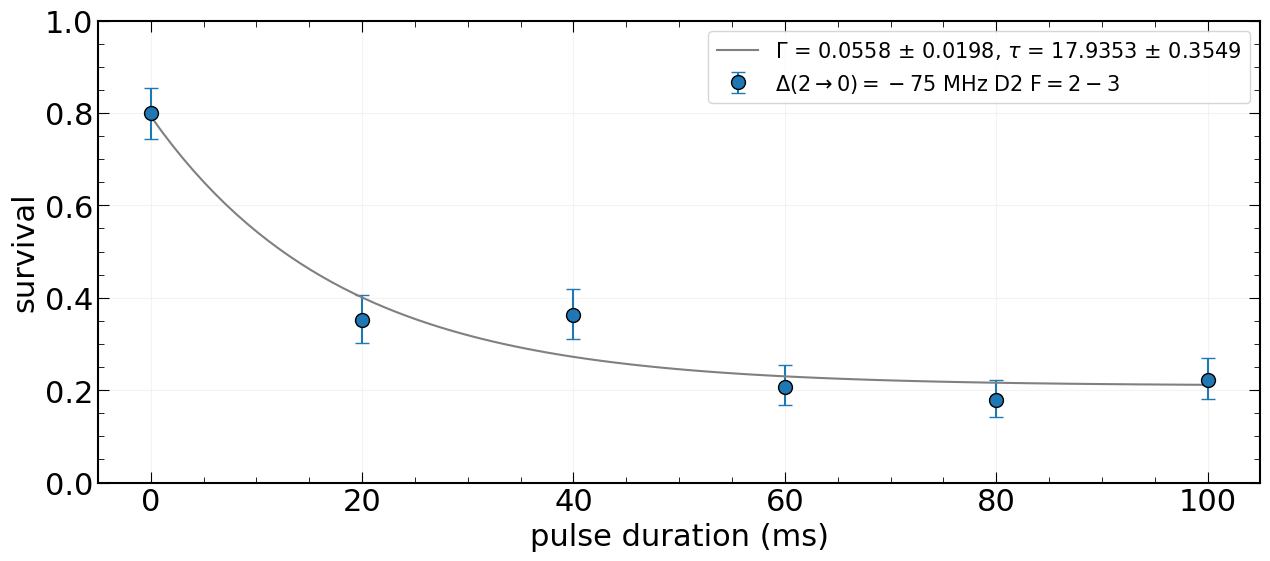

In [37]:
##pulse duration
reloadMyModules(24,'October')
fileId = 37
threshold = 65
dataset1 = ta.standardTransferAnalysis(fileId, loadTwoOpt, tOptions = [to.ThresholdOptions(manualThreshold = True, manualThresholdValue = threshold)]);
(tferAtomsVarAvg, tferAtomsVarErrs, loadAtomsVarAvg, initPicCounts, keyName, key1, repetitions, initThresholds, 
            fits, avgTferData1, avgTferErr1, avgFit, avgPics, genAvgs, genErrs, tferVarAvg, tferVarErr, initAtomImages, 
            tferAtomImages, tferPicCounts, tferThresholds, fitModules, basicInfoStr, ensembleHits, tOptions, analysisOpts,
            tferAtomsPs, tferAtomsPs, tferList, isAnnotated, hmm) = dataset1
color1 = 'tab:blue'
upperbound = []
lowerbound = []
for i in np.arange(0,len(avgTferErr1)):
    up = avgTferErr1[i][0]
    lo = avgTferErr1[i][1]
    upperbound.append(up)  
    lowerbound.append(lo)
err1= [upperbound,lowerbound]
avgTferData1[0] = 0.8

x_data = key1
y_data = avgTferData1
initial_guess = [max(y_data), 0.1, min(y_data)]
popt, pcov = curve_fit(decay_exponential, x_data, y_data, p0=initial_guess)
x_fit = np.linspace(min(x_data), max(x_data), 100)
y_fit = decay_exponential(x_fit, *popt)
decay_constant = popt[1]
decay_constant_uncertainty = np.sqrt(pcov[1, 1])
one_over_e_time = 1 / decay_constant
one_over_e_time_uncertainty = decay_constant_uncertainty / decay_constant

fig, ax = plt.subplots(figsize=(15, 6))
font = {'family' : 'DejaVu Sans',
        'weight' : 'normal',
        'size'   : 22}
matplotlib.rc('font', **font)
decay_constant_str = f"{decay_constant:.4f}"
decay_constant_uncertainty_str = f"{decay_constant_uncertainty:.4f}"
legend_label = fr"$\Gamma$ = {decay_constant_str} ± {decay_constant_uncertainty_str}, $\tau$ = {one_over_e_time:.4f} ± {one_over_e_time_uncertainty:.4f}"
ticks = np.arange(key1[0], max(key1),len(key1))
ax.errorbar(key1,avgTferData1, yerr=err1,ls='none',ecolor=color1,marker = 'o',markersize = 10,
            markerfacecolor=color1,markeredgecolor='k',capsize=5, label=r'$ \Delta(2 \rightarrow 0) = -75 \ \mathrm{MHz} \ \mathrm{D2 \ F=2-3} $')
plt.plot(x_fit, y_fit, 'gray',label=legend_label)
plt.legend(loc= 'upper right', ncol = 1,prop={'size': 15})
plt.ylim(0,1)
plt.ylabel('survival')
plt.xlabel(r'pulse duration (ms)')
plt.rcParams["axes.linewidth"] = 1.5
plt.ticklabel_format(style='plain') 


gamma_p1SD187_ZF = decay_constant
gamma_p1SD187_ZF_unc  = decay_constant_uncertainty
tau_p1SD187_ZF = one_over_e_time
tau_p1SD187_ZF_unc  = one_over_e_time_uncertainty
print('gamma =',decay_constant,'gamma uncertainty =',decay_constant_uncertainty)

### 0.5 S

Number of Pictures: 2400; Picture Dimensions: 5 x 10
Variations: 6;	Repetitions: 200;	Exp File Version: 4;
Experiment started at (H:M:S) 14:21:12: on (Y-M-D) 2023-10-24, And ended at 14:30:18: on 2023-10-24
Experiment Notes: HDF5 NOT ANNOTATED: please call exp.Annotate() to annotate this file.

gamma = 0.19039313905543048 gamma uncertainty = 0.05372785055127528


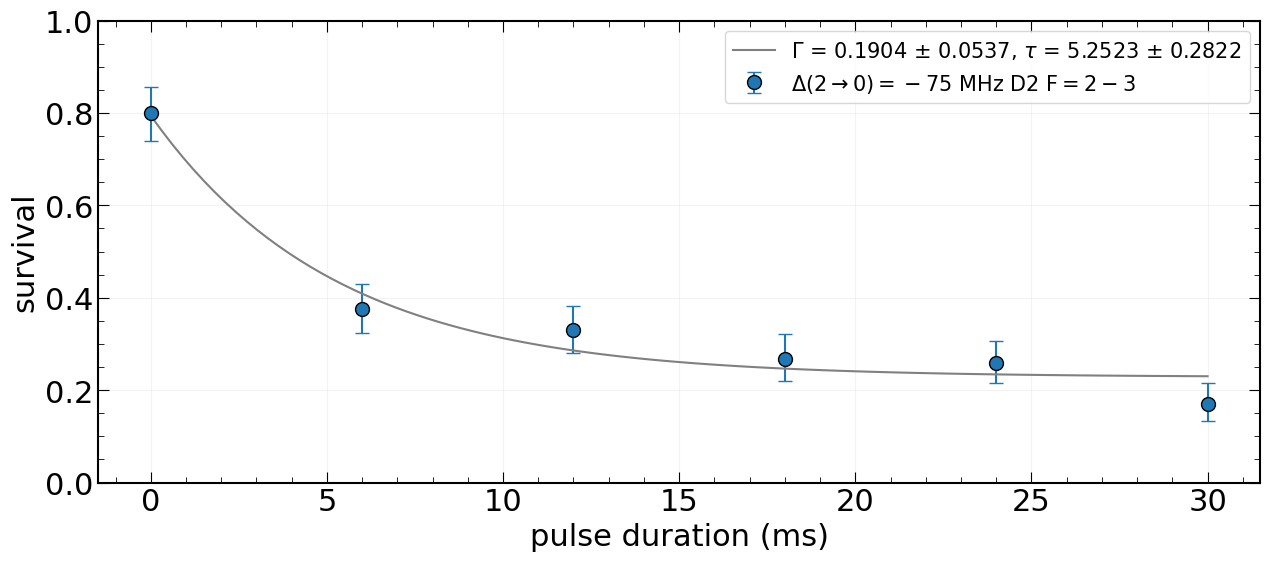

In [38]:
##pulse duration
reloadMyModules(24,'October')
fileId = 34
threshold = 70
dataset1 = ta.standardTransferAnalysis(fileId, loadTwoOpt, tOptions = [to.ThresholdOptions(manualThreshold = True, manualThresholdValue = threshold)]);
(tferAtomsVarAvg, tferAtomsVarErrs, loadAtomsVarAvg, initPicCounts, keyName, key1, repetitions, initThresholds, 
            fits, avgTferData1, avgTferErr1, avgFit, avgPics, genAvgs, genErrs, tferVarAvg, tferVarErr, initAtomImages, 
            tferAtomImages, tferPicCounts, tferThresholds, fitModules, basicInfoStr, ensembleHits, tOptions, analysisOpts,
            tferAtomsPs, tferAtomsPs, tferList, isAnnotated, hmm) = dataset1
color1 = 'tab:blue'
upperbound = []
lowerbound = []
for i in np.arange(0,len(avgTferErr1)):
    up = avgTferErr1[i][0]
    lo = avgTferErr1[i][1]
    upperbound.append(up)  
    lowerbound.append(lo)
err1= [upperbound,lowerbound]
avgTferData1[0] = 0.8

x_data = key1
y_data = avgTferData1
initial_guess = [max(y_data), 0.1, min(y_data)]
popt, pcov = curve_fit(decay_exponential, x_data, y_data, p0=initial_guess)
x_fit = np.linspace(min(x_data), max(x_data), 100)
y_fit = decay_exponential(x_fit, *popt)
decay_constant = popt[1]
decay_constant_uncertainty = np.sqrt(pcov[1, 1])
one_over_e_time = 1 / decay_constant
one_over_e_time_uncertainty = decay_constant_uncertainty / decay_constant

fig, ax = plt.subplots(figsize=(15, 6))
font = {'family' : 'DejaVu Sans',
        'weight' : 'normal',
        'size'   : 22}
matplotlib.rc('font', **font)
decay_constant_str = f"{decay_constant:.4f}"
decay_constant_uncertainty_str = f"{decay_constant_uncertainty:.4f}"
legend_label = fr"$\Gamma$ = {decay_constant_str} ± {decay_constant_uncertainty_str}, $\tau$ = {one_over_e_time:.4f} ± {one_over_e_time_uncertainty:.4f}"
ticks = np.arange(key1[0], max(key1),len(key1))
ax.errorbar(key1,avgTferData1, yerr=err1,ls='none',ecolor=color1,marker = 'o',markersize = 10,
            markerfacecolor=color1,markeredgecolor='k',capsize=5, label=r'$ \Delta(2 \rightarrow 0) = -75 \ \mathrm{MHz} \ \mathrm{D2 \ F=2-3} $')
plt.plot(x_fit, y_fit, 'gray',label=legend_label)
plt.legend(loc= 'upper right', ncol = 1,prop={'size': 15})
plt.ylim(0,1)
plt.ylabel('survival')
plt.xlabel(r'pulse duration (ms)')
plt.rcParams["axes.linewidth"] = 1.5
plt.ticklabel_format(style='plain') 


gamma_p5SD187_ZF = decay_constant
gamma_p5SD187_ZF_unc = decay_constant_uncertainty
tau_p5SD187_ZF = one_over_e_time
tau_p5SD187_ZF_unc = one_over_e_time_uncertainty
print('gamma =',decay_constant,'gamma uncertainty =',decay_constant_uncertainty)

### 1 S

Number of Pictures: 2400; Picture Dimensions: 5 x 10
Variations: 6;	Repetitions: 200;	Exp File Version: 4;
Experiment started at (H:M:S) 15:59:39: on (Y-M-D) 2023-10-24, And ended at 16:8:34: on 2023-10-24
Experiment Notes: HDF5 NOT ANNOTATED: please call exp.Annotate() to annotate this file.

gamma = 0.2741650236510031 gamma uncertainty = 0.06925025028456708


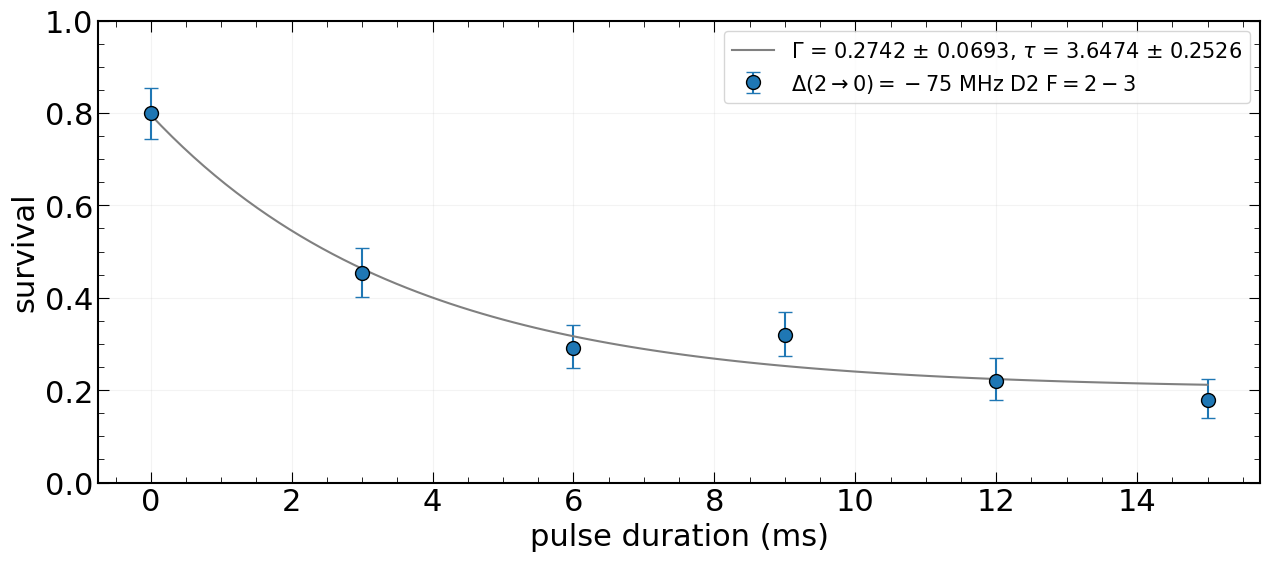

In [39]:
##pulse duration
reloadMyModules(24,'October')
fileId = 45
threshold = 60
dataset1 = ta.standardTransferAnalysis(fileId, loadTwoOpt, tOptions = [to.ThresholdOptions(manualThreshold = True, manualThresholdValue = threshold)]);
(tferAtomsVarAvg, tferAtomsVarErrs, loadAtomsVarAvg, initPicCounts, keyName, key1, repetitions, initThresholds, 
            fits, avgTferData1, avgTferErr1, avgFit, avgPics, genAvgs, genErrs, tferVarAvg, tferVarErr, initAtomImages, 
            tferAtomImages, tferPicCounts, tferThresholds, fitModules, basicInfoStr, ensembleHits, tOptions, analysisOpts,
            tferAtomsPs, tferAtomsPs, tferList, isAnnotated, hmm) = dataset1
color1 = 'tab:blue'
upperbound = []
lowerbound = []
for i in np.arange(0,len(avgTferErr1)):
    up = avgTferErr1[i][0]
    lo = avgTferErr1[i][1]
    upperbound.append(up)  
    lowerbound.append(lo)
err1= [upperbound,lowerbound]
avgTferData1[0] = 0.8

x_data = key1
y_data = avgTferData1
initial_guess = [max(y_data), 0.1, min(y_data)]
popt, pcov = curve_fit(decay_exponential, x_data, y_data, p0=initial_guess)
x_fit = np.linspace(min(x_data), max(x_data), 100)
y_fit = decay_exponential(x_fit, *popt)
decay_constant = popt[1]
decay_constant_uncertainty = np.sqrt(pcov[1, 1])
one_over_e_time = 1 / decay_constant
one_over_e_time_uncertainty = decay_constant_uncertainty / decay_constant

fig, ax = plt.subplots(figsize=(15, 6))
font = {'family' : 'DejaVu Sans',
        'weight' : 'normal',
        'size'   : 22}
matplotlib.rc('font', **font)
decay_constant_str = f"{decay_constant:.4f}"
decay_constant_uncertainty_str = f"{decay_constant_uncertainty:.4f}"
legend_label = fr"$\Gamma$ = {decay_constant_str} ± {decay_constant_uncertainty_str}, $\tau$ = {one_over_e_time:.4f} ± {one_over_e_time_uncertainty:.4f}"
ticks = np.arange(key1[0], max(key1),len(key1))
ax.errorbar(key1,avgTferData1, yerr=err1,ls='none',ecolor=color1,marker = 'o',markersize = 10,
            markerfacecolor=color1,markeredgecolor='k',capsize=5, label=r'$ \Delta(2 \rightarrow 0) = -75 \ \mathrm{MHz} \ \mathrm{D2 \ F=2-3} $')
plt.plot(x_fit, y_fit, 'gray',label=legend_label)
plt.legend(loc= 'upper right', ncol = 1,prop={'size': 15})
plt.ylim(0,1)
plt.ylabel('survival')
plt.xlabel(r'pulse duration (ms)')
plt.rcParams["axes.linewidth"] = 1.5
plt.ticklabel_format(style='plain') 


gamma_SD187_ZF = decay_constant
gamma_SD187_ZF_unc = decay_constant_uncertainty
tau_SD187_ZF = one_over_e_time
tau_SD187_ZF_unc  = one_over_e_time_uncertainty
print('gamma =',decay_constant,'gamma uncertainty =',decay_constant_uncertainty)

### 2 S

Number of Pictures: 2400; Picture Dimensions: 5 x 10
Variations: 6;	Repetitions: 200;	Exp File Version: 4;
Experiment started at (H:M:S) 15:15:0: on (Y-M-D) 2023-10-24, And ended at 15:24:4: on 2023-10-24
Experiment Notes: HDF5 NOT ANNOTATED: please call exp.Annotate() to annotate this file.

gamma = 0.38483567062968066 gamma uncertainty = 0.12578350787401346


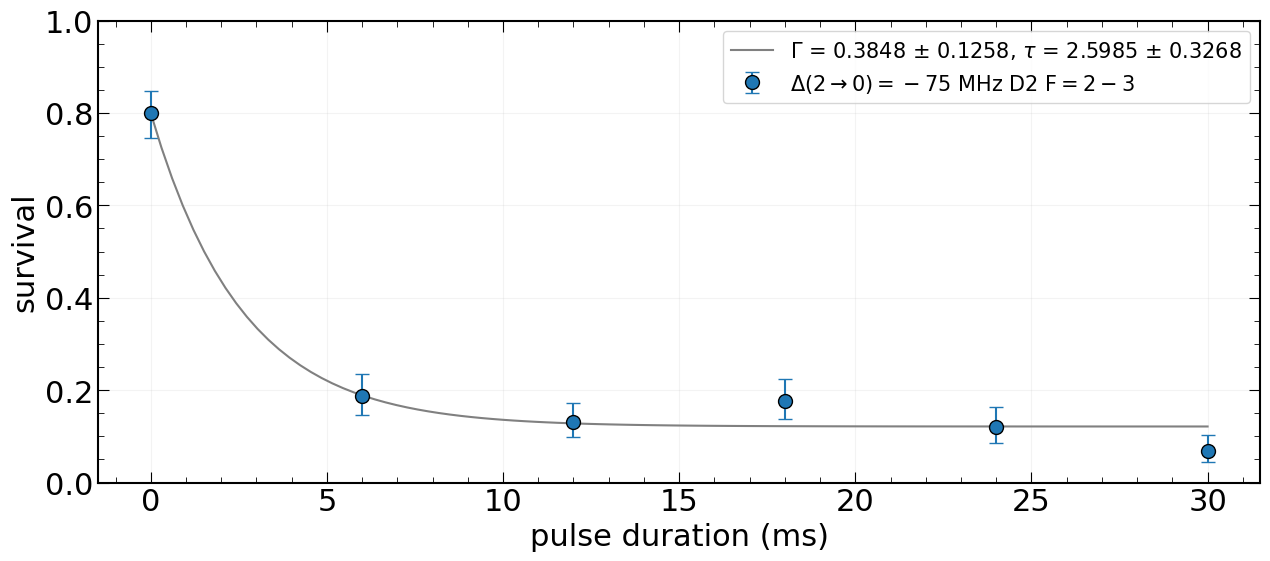

In [40]:
##pulse duration
reloadMyModules(24,'October')
fileId = 38
threshold = 65
dataset1 = ta.standardTransferAnalysis(fileId, loadTwoOpt, tOptions = [to.ThresholdOptions(manualThreshold = True, manualThresholdValue = threshold)]);
(tferAtomsVarAvg, tferAtomsVarErrs, loadAtomsVarAvg, initPicCounts, keyName, key1, repetitions, initThresholds, 
            fits, avgTferData1, avgTferErr1, avgFit, avgPics, genAvgs, genErrs, tferVarAvg, tferVarErr, initAtomImages, 
            tferAtomImages, tferPicCounts, tferThresholds, fitModules, basicInfoStr, ensembleHits, tOptions, analysisOpts,
            tferAtomsPs, tferAtomsPs, tferList, isAnnotated, hmm) = dataset1
color1 = 'tab:blue'
upperbound = []
lowerbound = []
for i in np.arange(0,len(avgTferErr1)):
    up = avgTferErr1[i][0]
    lo = avgTferErr1[i][1]
    upperbound.append(up)  
    lowerbound.append(lo)
err1= [upperbound,lowerbound]
avgTferData1[0] = 0.8

x_data = key1
y_data = avgTferData1
initial_guess = [max(y_data), 0.1, min(y_data)]
popt, pcov = curve_fit(decay_exponential, x_data, y_data, p0=initial_guess)
x_fit = np.linspace(min(x_data), max(x_data), 100)
y_fit = decay_exponential(x_fit, *popt)
decay_constant = popt[1]
decay_constant_uncertainty = np.sqrt(pcov[1, 1])
one_over_e_time = 1 / decay_constant
one_over_e_time_uncertainty = decay_constant_uncertainty / decay_constant

fig, ax = plt.subplots(figsize=(15, 6))
font = {'family' : 'DejaVu Sans',
        'weight' : 'normal',
        'size'   : 22}
matplotlib.rc('font', **font)
decay_constant_str = f"{decay_constant:.4f}"
decay_constant_uncertainty_str = f"{decay_constant_uncertainty:.4f}"
legend_label = fr"$\Gamma$ = {decay_constant_str} ± {decay_constant_uncertainty_str}, $\tau$ = {one_over_e_time:.4f} ± {one_over_e_time_uncertainty:.4f}"
ticks = np.arange(key1[0], max(key1),len(key1))
ax.errorbar(key1,avgTferData1, yerr=err1,ls='none',ecolor=color1,marker = 'o',markersize = 10,
            markerfacecolor=color1,markeredgecolor='k',capsize=5, label=r'$ \Delta(2 \rightarrow 0) = -75 \ \mathrm{MHz} \ \mathrm{D2 \ F=2-3} $')
plt.plot(x_fit, y_fit, 'gray',label=legend_label)
plt.legend(loc= 'upper right', ncol = 1,prop={'size': 15})
plt.ylim(0,1)
plt.ylabel('survival')
plt.xlabel(r'pulse duration (ms)')
plt.rcParams["axes.linewidth"] = 1.5
plt.ticklabel_format(style='plain') 


gamma_2SD187_ZF = decay_constant
gamma_2SD187_ZF_unc = decay_constant_uncertainty
tau_2SD187_ZF = one_over_e_time
tau_2SD187_ZF_unc  = one_over_e_time_uncertainty
print('gamma =',decay_constant,'gamma uncertainty =',decay_constant_uncertainty)

### 3 S

Number of Pictures: 2400; Picture Dimensions: 5 x 10
Variations: 6;	Repetitions: 200;	Exp File Version: 4;
Experiment started at (H:M:S) 15:59:39: on (Y-M-D) 2023-10-24, And ended at 16:8:34: on 2023-10-24
Experiment Notes: HDF5 NOT ANNOTATED: please call exp.Annotate() to annotate this file.

gamma = 0.2741650236510031 gamma uncertainty = 0.06925025028456708


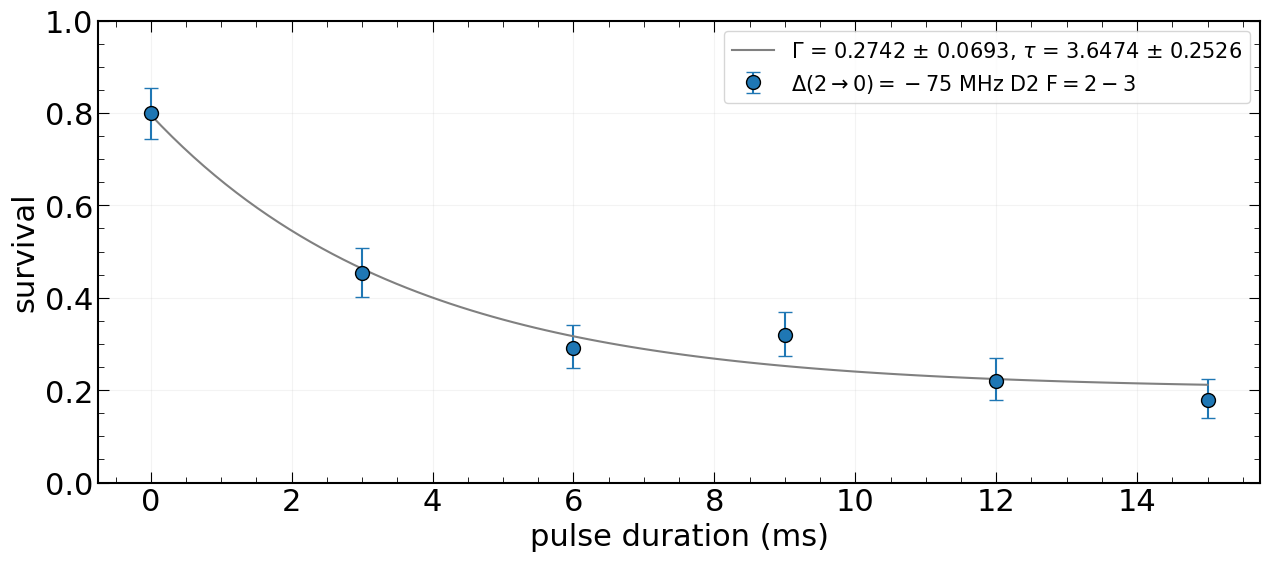

In [42]:
##pulse duration
reloadMyModules(24,'October')
fileId = 45
threshold = 60
dataset1 = ta.standardTransferAnalysis(fileId, loadTwoOpt, tOptions = [to.ThresholdOptions(manualThreshold = True, manualThresholdValue = threshold)]);
(tferAtomsVarAvg, tferAtomsVarErrs, loadAtomsVarAvg, initPicCounts, keyName, key1, repetitions, initThresholds, 
            fits, avgTferData1, avgTferErr1, avgFit, avgPics, genAvgs, genErrs, tferVarAvg, tferVarErr, initAtomImages, 
            tferAtomImages, tferPicCounts, tferThresholds, fitModules, basicInfoStr, ensembleHits, tOptions, analysisOpts,
            tferAtomsPs, tferAtomsPs, tferList, isAnnotated, hmm) = dataset1
color1 = 'tab:blue'
upperbound = []
lowerbound = []
for i in np.arange(0,len(avgTferErr1)):
    up = avgTferErr1[i][0]
    lo = avgTferErr1[i][1]
    upperbound.append(up)  
    lowerbound.append(lo)
err1= [upperbound,lowerbound]
avgTferData1[0] = 0.8

x_data = key1
y_data = avgTferData1
initial_guess = [max(y_data), 0.1, min(y_data)]
popt, pcov = curve_fit(decay_exponential, x_data, y_data, p0=initial_guess)
x_fit = np.linspace(min(x_data), max(x_data), 100)
y_fit = decay_exponential(x_fit, *popt)
decay_constant = popt[1]
decay_constant_uncertainty = np.sqrt(pcov[1, 1])
one_over_e_time = 1 / decay_constant
one_over_e_time_uncertainty = decay_constant_uncertainty / decay_constant

fig, ax = plt.subplots(figsize=(15, 6))
font = {'family' : 'DejaVu Sans',
        'weight' : 'normal',
        'size'   : 22}
matplotlib.rc('font', **font)
decay_constant_str = f"{decay_constant:.4f}"
decay_constant_uncertainty_str = f"{decay_constant_uncertainty:.4f}"
legend_label = fr"$\Gamma$ = {decay_constant_str} ± {decay_constant_uncertainty_str}, $\tau$ = {one_over_e_time:.4f} ± {one_over_e_time_uncertainty:.4f}"
ticks = np.arange(key1[0], max(key1),len(key1))
ax.errorbar(key1,avgTferData1, yerr=err1,ls='none',ecolor=color1,marker = 'o',markersize = 10,
            markerfacecolor=color1,markeredgecolor='k',capsize=5, label=r'$ \Delta(2 \rightarrow 0) = -75 \ \mathrm{MHz} \ \mathrm{D2 \ F=2-3} $')
plt.plot(x_fit, y_fit, 'gray',label=legend_label)
plt.legend(loc= 'upper right', ncol = 1,prop={'size': 15})
plt.ylim(0,1)
plt.ylabel('survival')
plt.xlabel(r'pulse duration (ms)')
plt.rcParams["axes.linewidth"] = 1.5
plt.ticklabel_format(style='plain') 


gamma_3SD187_ZF = decay_constant
gamma_3SD187_ZF_unc = decay_constant_uncertainty
tau_3SD187_ZF = one_over_e_time
tau_3SD187_ZF_unc  = one_over_e_time_uncertainty
print('gamma =',decay_constant,'gamma uncertainty =',decay_constant_uncertainty)

### Plot Beta vs I 

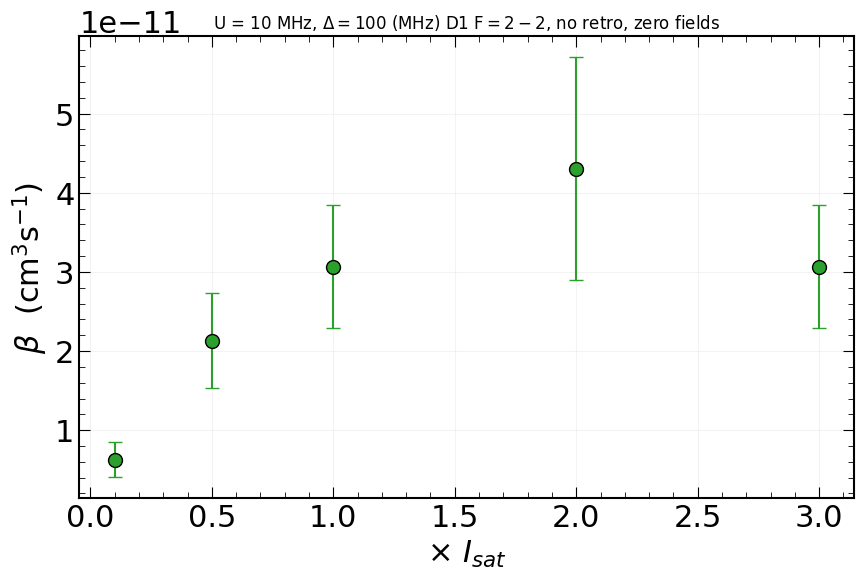

In [43]:
I = [0.1,0.5,1,2,3]
trapDepth=.5e-3
temp = 20e-6
beta_p1SD187_ZF = betaCalc(gamma_p1SD187_ZF,trapDepth,temp,2)
beta_p5SD187_ZF = betaCalc(gamma_p5SD187_ZF,trapDepth,temp,2)
beta_SD187_ZF = betaCalc(gamma_SD187_ZF,trapDepth,temp,2)
beta_2SD187_ZF = betaCalc(gamma_2SD187_ZF,trapDepth,temp,2)
beta_3SD187_ZF = betaCalc(gamma_3SD187_ZF,trapDepth,temp,2)
beta_p1SD187_ZF_unc = betaCalc(gamma_p1SD187_ZF_unc,trapDepth,temp,2)
beta_p5SD187_ZF_unc = betaCalc(gamma_p5SD187_ZF_unc,trapDepth,temp,2)
beta_SD187_ZF_unc = betaCalc(gamma_SD187_ZF_unc,trapDepth,temp,2)
beta_2SD187_ZF_unc = betaCalc(gamma_2SD187_ZF_unc,trapDepth,temp,2)
beta_3SD187_ZF_unc = betaCalc(gamma_3SD187_ZF_unc,trapDepth,temp,2)
beta_ZF = [beta_p1SD187_ZF,beta_p5SD187_ZF,beta_SD187_ZF,beta_2SD187_ZF,beta_3SD187_ZF]
beta_unc_ZF = [beta_p1SD187_ZF_unc,beta_p5SD187_ZF_unc,beta_SD187_ZF_unc,beta_2SD187_ZF_unc,beta_3SD187_ZF_unc]
beta_error_ZF = [beta_unc_ZF,beta_unc_ZF]


color1 = 'tab:green'
fig, ax = plt.subplots(figsize=(10, 6))
font = {'family' : 'DejaVu Sans',
        'weight' : 'normal',
        'size'   : 22}
matplotlib.rc('font', **font)
ax.errorbar(I,beta_ZF, yerr=beta_error_ZF,ls='none',ecolor=color1,marker = 'o',markersize = 10,
            markerfacecolor=color1,markeredgecolor='k',capsize=5)
# ax.set_ylim(1e-20,1.5e-12)
# ax.set_yscale('log')
plt.ylabel(r'$ \beta \ \ \mathrm{(cm^3s^{-1})} $')
plt.xlabel(r'$\times \ I_{sat}$')
plt.title(r'U = 10 MHz, $ \Delta = 100 \ \mathrm{(MHz) \ D1 \ F=2-2}$, no retro, zero fields',fontsize=12) 
plt.rcParams["axes.linewidth"] = 1.5
# plt.ticklabel_format(style='plain') 

## Beta vs Intensity -  Retro beam, U=10 MHz, $\Delta = 100$ D1 F=2-2' 

### 0.1 S

Number of Pictures: 2400; Picture Dimensions: 5 x 10
Variations: 6;	Repetitions: 200;	Exp File Version: 4;
Experiment started at (H:M:S) 12:34:18: on (Y-M-D) 2023-10-25, And ended at 12:44:5: on 2023-10-25
Experiment Notes: HDF5 NOT ANNOTATED: please call exp.Annotate() to annotate this file.

gamma = 0.04819699602236669 gamma uncertainty = 0.012631624270920936


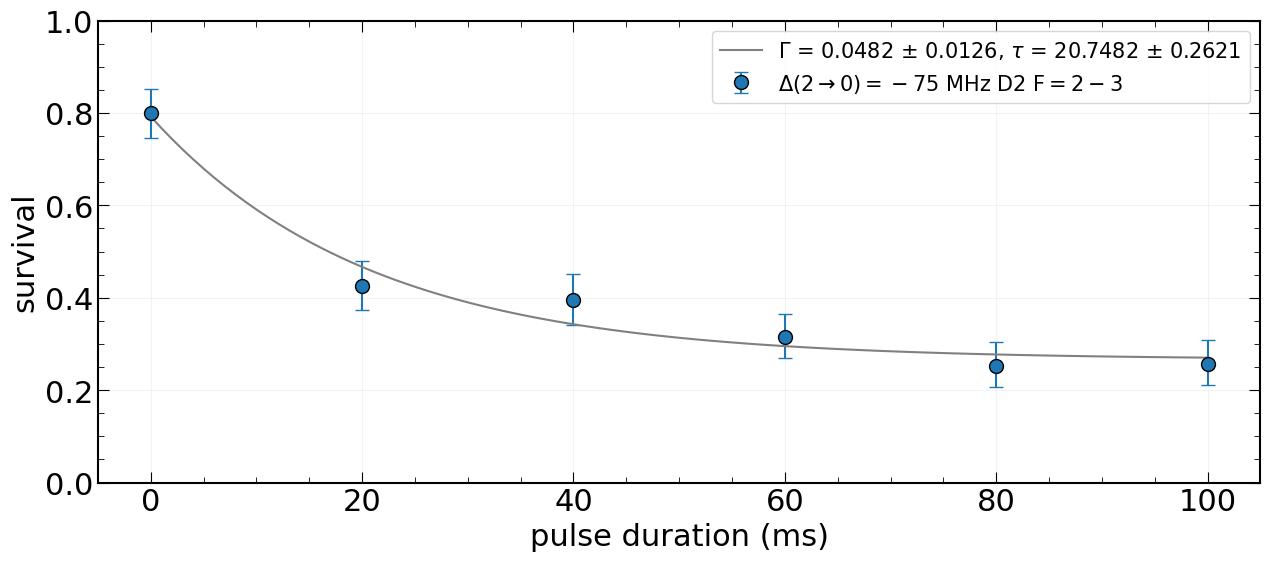

In [44]:
##pulse duration
reloadMyModules(25,'October')
fileId = 24
threshold = 80
dataset1 = ta.standardTransferAnalysis(fileId, loadTwoOpt, tOptions = [to.ThresholdOptions(manualThreshold = True, manualThresholdValue = threshold)]);
(tferAtomsVarAvg, tferAtomsVarErrs, loadAtomsVarAvg, initPicCounts, keyName, key1, repetitions, initThresholds, 
            fits, avgTferData1, avgTferErr1, avgFit, avgPics, genAvgs, genErrs, tferVarAvg, tferVarErr, initAtomImages, 
            tferAtomImages, tferPicCounts, tferThresholds, fitModules, basicInfoStr, ensembleHits, tOptions, analysisOpts,
            tferAtomsPs, tferAtomsPs, tferList, isAnnotated, hmm) = dataset1
color1 = 'tab:blue'
upperbound = []
lowerbound = []
for i in np.arange(0,len(avgTferErr1)):
    up = avgTferErr1[i][0]
    lo = avgTferErr1[i][1]
    upperbound.append(up)  
    lowerbound.append(lo)
err1= [upperbound,lowerbound]
avgTferData1[0] = 0.8

x_data = key1
y_data = avgTferData1
initial_guess = [max(y_data), 0.1, min(y_data)]
popt, pcov = curve_fit(decay_exponential, x_data, y_data, p0=initial_guess)
x_fit = np.linspace(min(x_data), max(x_data), 100)
y_fit = decay_exponential(x_fit, *popt)
decay_constant = popt[1]
decay_constant_uncertainty = np.sqrt(pcov[1, 1])
one_over_e_time = 1 / decay_constant
one_over_e_time_uncertainty = decay_constant_uncertainty / decay_constant

fig, ax = plt.subplots(figsize=(15, 6))
font = {'family' : 'DejaVu Sans',
        'weight' : 'normal',
        'size'   : 22}
matplotlib.rc('font', **font)
decay_constant_str = f"{decay_constant:.4f}"
decay_constant_uncertainty_str = f"{decay_constant_uncertainty:.4f}"
legend_label = fr"$\Gamma$ = {decay_constant_str} ± {decay_constant_uncertainty_str}, $\tau$ = {one_over_e_time:.4f} ± {one_over_e_time_uncertainty:.4f}"
ticks = np.arange(key1[0], max(key1),len(key1))
ax.errorbar(key1,avgTferData1, yerr=err1,ls='none',ecolor=color1,marker = 'o',markersize = 10,
            markerfacecolor=color1,markeredgecolor='k',capsize=5, label=r'$ \Delta(2 \rightarrow 0) = -75 \ \mathrm{MHz} \ \mathrm{D2 \ F=2-3} $')
plt.plot(x_fit, y_fit, 'gray',label=legend_label)
plt.legend(loc= 'upper right', ncol = 1,prop={'size': 15})
plt.ylim(0,1)
plt.ylabel('survival')
plt.xlabel(r'pulse duration (ms)')
plt.rcParams["axes.linewidth"] = 1.5
plt.ticklabel_format(style='plain') 


gamma_p1SD187_ZFRetro = decay_constant
gamma_p1SD187_ZFRetro_unc  = decay_constant_uncertainty
tau_p1SD187_ZFRetro = one_over_e_time
tau_p1SD187_ZFRetro_unc  = one_over_e_time_uncertainty
print('gamma =',decay_constant,'gamma uncertainty =',decay_constant_uncertainty)

### 0.5 S

Number of Pictures: 600; Picture Dimensions: 5 x 10
Variations: 6;	Repetitions: 50;	Exp File Version: 4;
Experiment started at (H:M:S) 12:59:42: on (Y-M-D) 2023-10-25, And ended at 13:2:15: on 2023-10-25
Experiment Notes: HDF5 NOT ANNOTATED: please call exp.Annotate() to annotate this file.

gamma = 0.626870784586378 gamma uncertainty = 0.14205031134159493


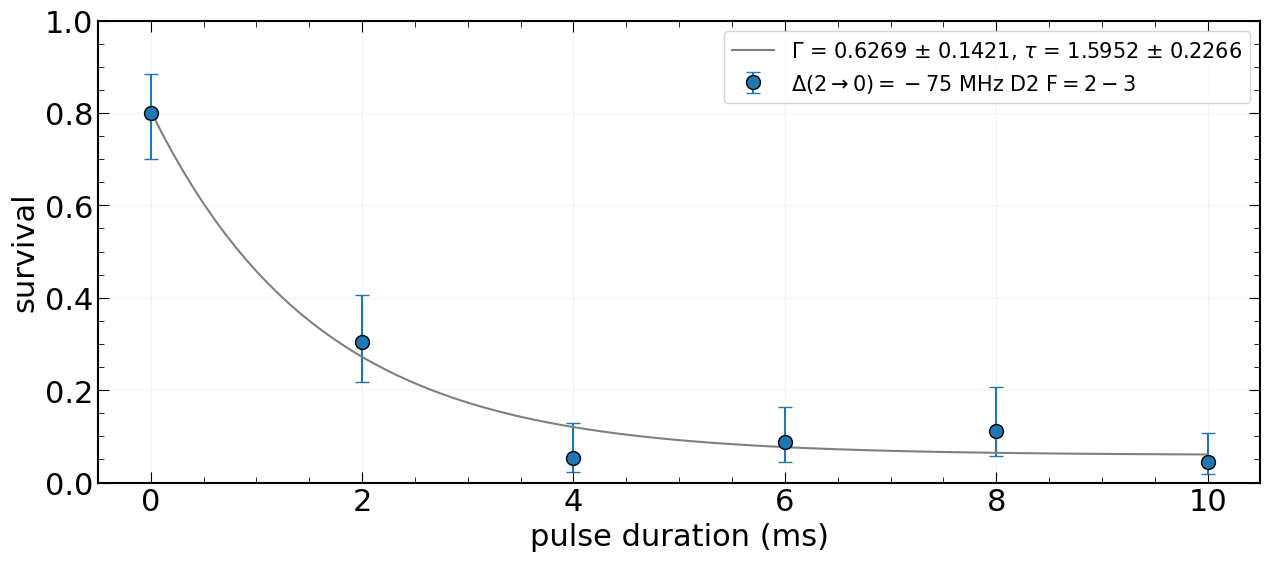

In [45]:
##pulse duration
reloadMyModules(25,'October')
fileId = 26
threshold = 90
dataset1 = ta.standardTransferAnalysis(fileId, loadTwoOpt, tOptions = [to.ThresholdOptions(manualThreshold = True, manualThresholdValue = threshold)]);
(tferAtomsVarAvg, tferAtomsVarErrs, loadAtomsVarAvg, initPicCounts, keyName, key1, repetitions, initThresholds, 
            fits, avgTferData1, avgTferErr1, avgFit, avgPics, genAvgs, genErrs, tferVarAvg, tferVarErr, initAtomImages, 
            tferAtomImages, tferPicCounts, tferThresholds, fitModules, basicInfoStr, ensembleHits, tOptions, analysisOpts,
            tferAtomsPs, tferAtomsPs, tferList, isAnnotated, hmm) = dataset1
color1 = 'tab:blue'
upperbound = []
lowerbound = []
for i in np.arange(0,len(avgTferErr1)):
    up = avgTferErr1[i][0]
    lo = avgTferErr1[i][1]
    upperbound.append(up)  
    lowerbound.append(lo)
err1= [upperbound,lowerbound]
avgTferData1[0] = 0.8

x_data = key1
y_data = avgTferData1
initial_guess = [max(y_data), 0.1, min(y_data)]
popt, pcov = curve_fit(decay_exponential, x_data, y_data, p0=initial_guess)
x_fit = np.linspace(min(x_data), max(x_data), 100)
y_fit = decay_exponential(x_fit, *popt)
decay_constant = popt[1]
decay_constant_uncertainty = np.sqrt(pcov[1, 1])
one_over_e_time = 1 / decay_constant
one_over_e_time_uncertainty = decay_constant_uncertainty / decay_constant

fig, ax = plt.subplots(figsize=(15, 6))
font = {'family' : 'DejaVu Sans',
        'weight' : 'normal',
        'size'   : 22}
matplotlib.rc('font', **font)
decay_constant_str = f"{decay_constant:.4f}"
decay_constant_uncertainty_str = f"{decay_constant_uncertainty:.4f}"
legend_label = fr"$\Gamma$ = {decay_constant_str} ± {decay_constant_uncertainty_str}, $\tau$ = {one_over_e_time:.4f} ± {one_over_e_time_uncertainty:.4f}"
ticks = np.arange(key1[0], max(key1),len(key1))
ax.errorbar(key1,avgTferData1, yerr=err1,ls='none',ecolor=color1,marker = 'o',markersize = 10,
            markerfacecolor=color1,markeredgecolor='k',capsize=5, label=r'$ \Delta(2 \rightarrow 0) = -75 \ \mathrm{MHz} \ \mathrm{D2 \ F=2-3} $')
plt.plot(x_fit, y_fit, 'gray',label=legend_label)
plt.legend(loc= 'upper right', ncol = 1,prop={'size': 15})
plt.ylim(0,1)
plt.ylabel('survival')
plt.xlabel(r'pulse duration (ms)')
plt.rcParams["axes.linewidth"] = 1.5
plt.ticklabel_format(style='plain') 


gamma_p5SD187_ZFRetro = decay_constant
gamma_p5SD187_ZFRetro_unc = decay_constant_uncertainty
tau_p5SD187_ZFRetro = one_over_e_time
tau_p5SD187_ZFRetro_unc = one_over_e_time_uncertainty
print('gamma =',decay_constant,'gamma uncertainty =',decay_constant_uncertainty)

### 1 S

Number of Pictures: 600; Picture Dimensions: 5 x 10
Variations: 6;	Repetitions: 50;	Exp File Version: 4;
Experiment started at (H:M:S) 13:3:50: on (Y-M-D) 2023-10-25, And ended at 13:6:23: on 2023-10-25
Experiment Notes: HDF5 NOT ANNOTATED: please call exp.Annotate() to annotate this file.

gamma = 1.3309292404412332 gamma uncertainty = 0.23956537663141173


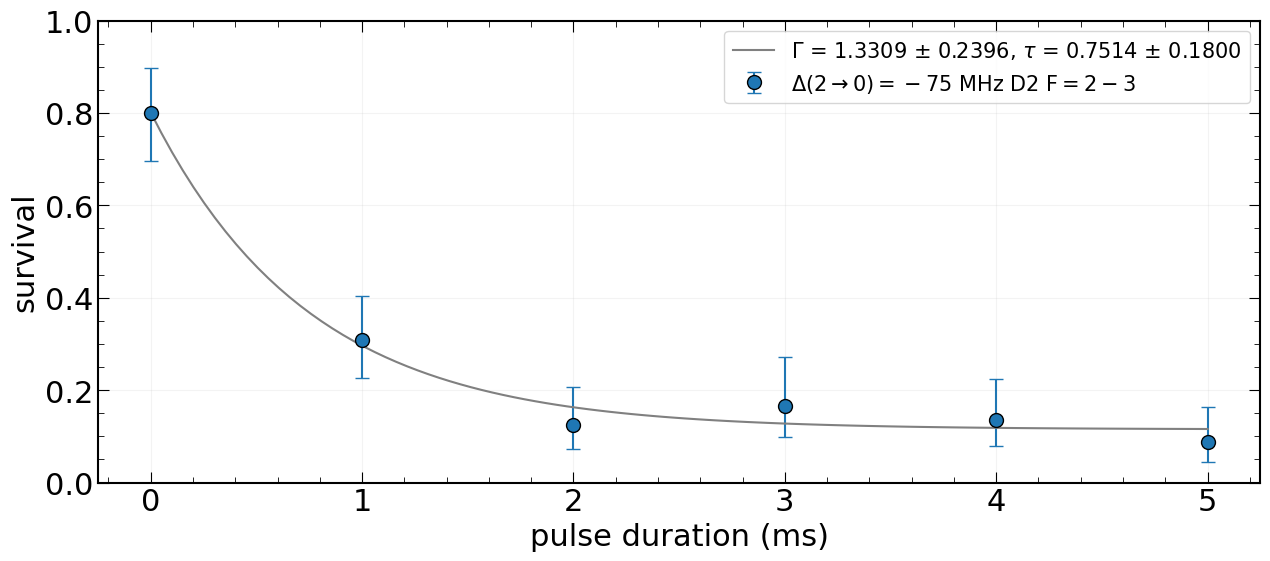

In [46]:
##pulse duration
reloadMyModules(25,'October')
fileId = 27
threshold = 70
dataset1 = ta.standardTransferAnalysis(fileId, loadTwoOpt, tOptions = [to.ThresholdOptions(manualThreshold = True, manualThresholdValue = threshold)]);
(tferAtomsVarAvg, tferAtomsVarErrs, loadAtomsVarAvg, initPicCounts, keyName, key1, repetitions, initThresholds, 
            fits, avgTferData1, avgTferErr1, avgFit, avgPics, genAvgs, genErrs, tferVarAvg, tferVarErr, initAtomImages, 
            tferAtomImages, tferPicCounts, tferThresholds, fitModules, basicInfoStr, ensembleHits, tOptions, analysisOpts,
            tferAtomsPs, tferAtomsPs, tferList, isAnnotated, hmm) = dataset1
color1 = 'tab:blue'
upperbound = []
lowerbound = []
for i in np.arange(0,len(avgTferErr1)):
    up = avgTferErr1[i][0]
    lo = avgTferErr1[i][1]
    upperbound.append(up)  
    lowerbound.append(lo)
err1= [upperbound,lowerbound]
avgTferData1[0] = 0.8

x_data = key1
y_data = avgTferData1
initial_guess = [max(y_data), 0.1, min(y_data)]
popt, pcov = curve_fit(decay_exponential, x_data, y_data, p0=initial_guess)
x_fit = np.linspace(min(x_data), max(x_data), 100)
y_fit = decay_exponential(x_fit, *popt)
decay_constant = popt[1]
decay_constant_uncertainty = np.sqrt(pcov[1, 1])
one_over_e_time = 1 / decay_constant
one_over_e_time_uncertainty = decay_constant_uncertainty / decay_constant

fig, ax = plt.subplots(figsize=(15, 6))
font = {'family' : 'DejaVu Sans',
        'weight' : 'normal',
        'size'   : 22}
matplotlib.rc('font', **font)
decay_constant_str = f"{decay_constant:.4f}"
decay_constant_uncertainty_str = f"{decay_constant_uncertainty:.4f}"
legend_label = fr"$\Gamma$ = {decay_constant_str} ± {decay_constant_uncertainty_str}, $\tau$ = {one_over_e_time:.4f} ± {one_over_e_time_uncertainty:.4f}"
ticks = np.arange(key1[0], max(key1),len(key1))
ax.errorbar(key1,avgTferData1, yerr=err1,ls='none',ecolor=color1,marker = 'o',markersize = 10,
            markerfacecolor=color1,markeredgecolor='k',capsize=5, label=r'$ \Delta(2 \rightarrow 0) = -75 \ \mathrm{MHz} \ \mathrm{D2 \ F=2-3} $')
plt.plot(x_fit, y_fit, 'gray',label=legend_label)
plt.legend(loc= 'upper right', ncol = 1,prop={'size': 15})
plt.ylim(0,1)
plt.ylabel('survival')
plt.xlabel(r'pulse duration (ms)')
plt.rcParams["axes.linewidth"] = 1.5
plt.ticklabel_format(style='plain') 


gamma_SD187_ZFRetro = decay_constant
gamma_SD187_ZFRetro_unc = decay_constant_uncertainty
tau_SD187_ZFRetro = one_over_e_time
tau_SD187_ZFRetro_unc  = one_over_e_time_uncertainty
print('gamma =',decay_constant,'gamma uncertainty =',decay_constant_uncertainty)

### 2 S

Number of Pictures: 1200; Picture Dimensions: 5 x 10
Variations: 6;	Repetitions: 100;	Exp File Version: 4;
Experiment started at (H:M:S) 13:8:8: on (Y-M-D) 2023-10-25, And ended at 13:12:47: on 2023-10-25
Experiment Notes: HDF5 NOT ANNOTATED: please call exp.Annotate() to annotate this file.

gamma = 1.9502557224382668 gamma uncertainty = 0.18571003033600555


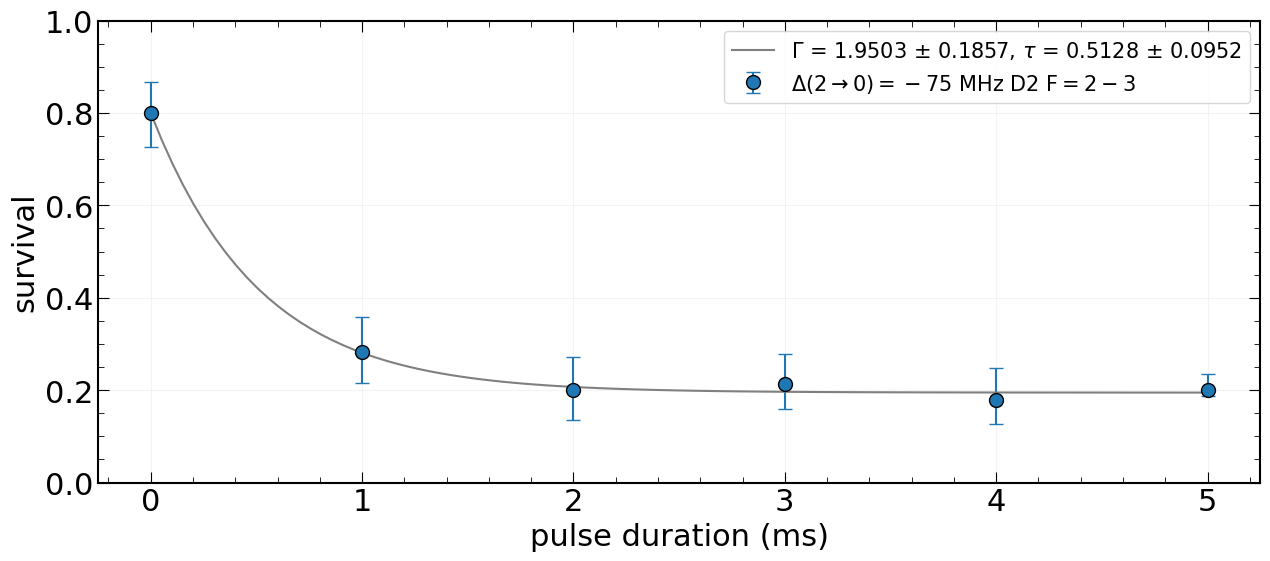

In [47]:
##pulse duration
reloadMyModules(25,'October')
fileId = 28
threshold = 70
dataset1 = ta.standardTransferAnalysis(fileId, loadTwoOpt, tOptions = [to.ThresholdOptions(manualThreshold = True, manualThresholdValue = threshold)]);
(tferAtomsVarAvg, tferAtomsVarErrs, loadAtomsVarAvg, initPicCounts, keyName, key1, repetitions, initThresholds, 
            fits, avgTferData1, avgTferErr1, avgFit, avgPics, genAvgs, genErrs, tferVarAvg, tferVarErr, initAtomImages, 
            tferAtomImages, tferPicCounts, tferThresholds, fitModules, basicInfoStr, ensembleHits, tOptions, analysisOpts,
            tferAtomsPs, tferAtomsPs, tferList, isAnnotated, hmm) = dataset1
color1 = 'tab:blue'
upperbound = []
lowerbound = []
for i in np.arange(0,len(avgTferErr1)):
    up = avgTferErr1[i][0]
    lo = avgTferErr1[i][1]
    upperbound.append(up)  
    lowerbound.append(lo)
err1= [upperbound,lowerbound]
avgTferData1[0] = 0.8
avgTferData1[2] = 0.2
avgTferData1[5] = 0.2

x_data = key1
y_data = avgTferData1
initial_guess = [max(y_data), 0.1, min(y_data)]
popt, pcov = curve_fit(decay_exponential, x_data, y_data, p0=initial_guess)
x_fit = np.linspace(min(x_data), max(x_data), 100)
y_fit = decay_exponential(x_fit, *popt)
decay_constant = popt[1]
decay_constant_uncertainty = np.sqrt(pcov[1, 1])
one_over_e_time = 1 / decay_constant
one_over_e_time_uncertainty = decay_constant_uncertainty / decay_constant

fig, ax = plt.subplots(figsize=(15, 6))
font = {'family' : 'DejaVu Sans',
        'weight' : 'normal',
        'size'   : 22}
matplotlib.rc('font', **font)
decay_constant_str = f"{decay_constant:.4f}"
decay_constant_uncertainty_str = f"{decay_constant_uncertainty:.4f}"
legend_label = fr"$\Gamma$ = {decay_constant_str} ± {decay_constant_uncertainty_str}, $\tau$ = {one_over_e_time:.4f} ± {one_over_e_time_uncertainty:.4f}"
ticks = np.arange(key1[0], max(key1),len(key1))
ax.errorbar(key1,avgTferData1, yerr=err1,ls='none',ecolor=color1,marker = 'o',markersize = 10,
            markerfacecolor=color1,markeredgecolor='k',capsize=5, label=r'$ \Delta(2 \rightarrow 0) = -75 \ \mathrm{MHz} \ \mathrm{D2 \ F=2-3} $')
plt.plot(x_fit, y_fit, 'gray',label=legend_label)
plt.legend(loc= 'upper right', ncol = 1,prop={'size': 15})
plt.ylim(0,1)
plt.ylabel('survival')
plt.xlabel(r'pulse duration (ms)')
plt.rcParams["axes.linewidth"] = 1.5
plt.ticklabel_format(style='plain') 


gamma_2SD187_ZFRetro = decay_constant
gamma_2SD187_ZFRetro_unc = decay_constant_uncertainty
tau_2SD187_ZFRetro = one_over_e_time
tau_2SD187_ZFRetro_unc  = one_over_e_time_uncertainty
print('gamma =',decay_constant,'gamma uncertainty =',decay_constant_uncertainty)

### 3 S

Number of Pictures: 1200; Picture Dimensions: 5 x 10
Variations: 6;	Repetitions: 100;	Exp File Version: 4;
Experiment started at (H:M:S) 13:15:24: on (Y-M-D) 2023-10-25, And ended at 13:20:2: on 2023-10-25
Experiment Notes: HDF5 NOT ANNOTATED: please call exp.Annotate() to annotate this file.

gamma = 1.133571757596778 gamma uncertainty = 0.19210085438246724


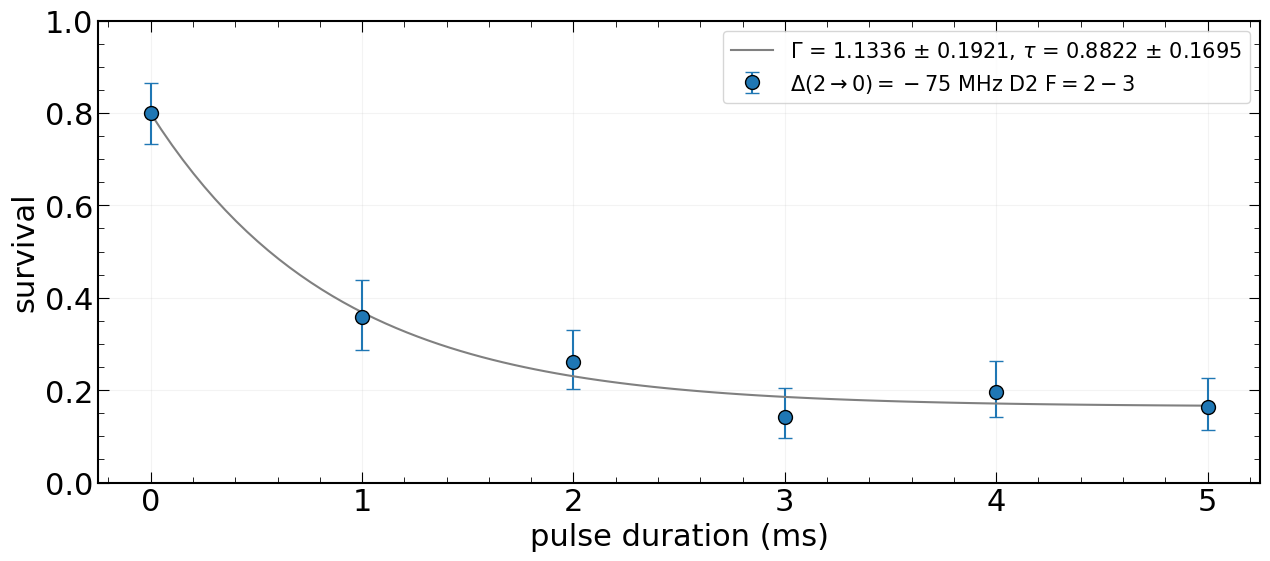

In [48]:
##pulse duration
reloadMyModules(25,'October')
fileId = 29
threshold = 70
dataset1 = ta.standardTransferAnalysis(fileId, loadTwoOpt, tOptions = [to.ThresholdOptions(manualThreshold = True, manualThresholdValue = threshold)]);
(tferAtomsVarAvg, tferAtomsVarErrs, loadAtomsVarAvg, initPicCounts, keyName, key1, repetitions, initThresholds, 
            fits, avgTferData1, avgTferErr1, avgFit, avgPics, genAvgs, genErrs, tferVarAvg, tferVarErr, initAtomImages, 
            tferAtomImages, tferPicCounts, tferThresholds, fitModules, basicInfoStr, ensembleHits, tOptions, analysisOpts,
            tferAtomsPs, tferAtomsPs, tferList, isAnnotated, hmm) = dataset1
color1 = 'tab:blue'
upperbound = []
lowerbound = []
for i in np.arange(0,len(avgTferErr1)):
    up = avgTferErr1[i][0]
    lo = avgTferErr1[i][1]
    upperbound.append(up)  
    lowerbound.append(lo)
err1= [upperbound,lowerbound]
avgTferData1[0] = 0.8
# avgTferData1[4] = 0.25
x_data = key1
y_data = avgTferData1
initial_guess = [max(y_data), 0.1, min(y_data)]
popt, pcov = curve_fit(decay_exponential, x_data, y_data, p0=initial_guess)
x_fit = np.linspace(min(x_data), max(x_data), 100)
y_fit = decay_exponential(x_fit, *popt)
decay_constant = popt[1]
decay_constant_uncertainty = np.sqrt(pcov[1, 1])
one_over_e_time = 1 / decay_constant
one_over_e_time_uncertainty = decay_constant_uncertainty / decay_constant

fig, ax = plt.subplots(figsize=(15, 6))
font = {'family' : 'DejaVu Sans',
        'weight' : 'normal',
        'size'   : 22}
matplotlib.rc('font', **font)
decay_constant_str = f"{decay_constant:.4f}"
decay_constant_uncertainty_str = f"{decay_constant_uncertainty:.4f}"
legend_label = fr"$\Gamma$ = {decay_constant_str} ± {decay_constant_uncertainty_str}, $\tau$ = {one_over_e_time:.4f} ± {one_over_e_time_uncertainty:.4f}"
ticks = np.arange(key1[0], max(key1),len(key1))
ax.errorbar(key1,avgTferData1, yerr=err1,ls='none',ecolor=color1,marker = 'o',markersize = 10,
            markerfacecolor=color1,markeredgecolor='k',capsize=5, label=r'$ \Delta(2 \rightarrow 0) = -75 \ \mathrm{MHz} \ \mathrm{D2 \ F=2-3} $')
plt.plot(x_fit, y_fit, 'gray',label=legend_label)
plt.legend(loc= 'upper right', ncol = 1,prop={'size': 15})
plt.ylim(0,1)
plt.ylabel('survival')
plt.xlabel(r'pulse duration (ms)')
plt.rcParams["axes.linewidth"] = 1.5
plt.ticklabel_format(style='plain') 


gamma_3SD187_ZFRetro = decay_constant
gamma_3SD187_ZFRetro_unc = decay_constant_uncertainty
tau_3SD187_ZFRetro = one_over_e_time
tau_3SD187_ZFRetro_unc  = one_over_e_time_uncertainty
print('gamma =',decay_constant,'gamma uncertainty =',decay_constant_uncertainty)

### Plot Beta vs I 

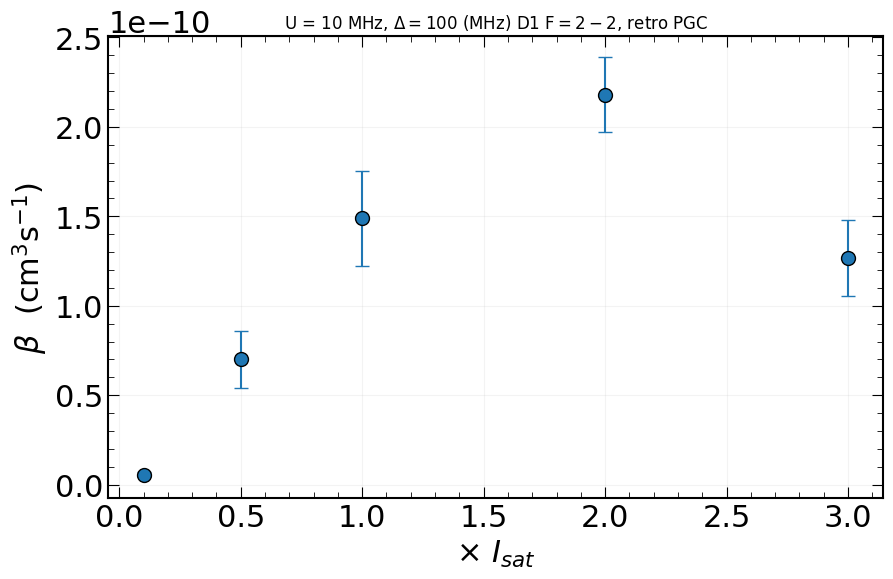

In [49]:
I = [0.1,0.5,1,2,3]
trapDepth=.5e-3
temp = 20e-6
beta_p1SD187_ZFRetro = betaCalc(gamma_p1SD187_ZFRetro,trapDepth,temp,2)
beta_p5SD187_ZFRetro = betaCalc(gamma_p5SD187_ZFRetro,trapDepth,temp,2)
beta_SD187_ZFRetro = betaCalc(gamma_SD187_ZFRetro,trapDepth,temp,2)
beta_2SD187_ZFRetro = betaCalc(gamma_2SD187_ZFRetro,trapDepth,temp,2)
beta_3SD187_ZFRetro = betaCalc(gamma_3SD187_ZFRetro,trapDepth,temp,2)
beta_p1SD187_ZFRetro_unc = betaCalc(gamma_p1SD187_ZFRetro_unc,trapDepth,temp,2)
beta_p5SD187_ZFRetro_unc = betaCalc(gamma_p5SD187_ZFRetro_unc,trapDepth,temp,2)
beta_SD187_ZFRetro_unc = betaCalc(gamma_SD187_ZFRetro_unc,trapDepth,temp,2)
beta_2SD187_ZFRetro_unc = betaCalc(gamma_2SD187_ZFRetro_unc,trapDepth,temp,2)
beta_3SD187_ZFRetro_unc = betaCalc(gamma_3SD187_ZFRetro_unc,trapDepth,temp,2)
beta_ZFRetro = [beta_p1SD187_ZFRetro,beta_p5SD187_ZFRetro,beta_SD187_ZFRetro,
                beta_2SD187_ZFRetro,beta_3SD187_ZFRetro]
beta_unc_ZFRetro = [beta_p1SD187_ZFRetro_unc,beta_p5SD187_ZFRetro_unc,beta_SD187_ZFRetro_unc,
               beta_2SD187_ZFRetro_unc,beta_3SD187_ZFRetro_unc]
beta_error_ZFRetro = [beta_unc_ZFRetro,beta_unc_ZFRetro]


color1 = 'tab:blue'
fig, ax = plt.subplots(figsize=(10, 6))
font = {'family' : 'DejaVu Sans',
        'weight' : 'normal',
        'size'   : 22}
matplotlib.rc('font', **font)
ax.errorbar(I,beta_ZFRetro, yerr=beta_error_ZFRetro,ls='none',ecolor=color1,marker = 'o',markersize = 10,
            markerfacecolor=color1,markeredgecolor='k',capsize=5)
# ax.set_ylim(1e-20,1.5e-12)
# ax.set_yscale('log')
plt.ylabel(r'$ \beta \ \ \mathrm{(cm^3s^{-1})} $')
plt.xlabel(r'$\times \ I_{sat}$')
plt.title(r'U = 10 MHz, $ \Delta = 100 \ \mathrm{(MHz) \ D1 \ F=2-2}$, retro PGC',fontsize=12) 
plt.rcParams["axes.linewidth"] = 1.5
# plt.ticklabel_format(style='plain') 

## Beta vs Intensity -  Retro beam, U=10 MHz, $\Delta = 250$ D1 F=2-2' 

### 0.1 S

Number of Pictures: 2400; Picture Dimensions: 5 x 10
Variations: 6;	Repetitions: 200;	Exp File Version: 4;
Experiment started at (H:M:S) 12:34:18: on (Y-M-D) 2023-10-25, And ended at 12:44:5: on 2023-10-25
Experiment Notes: HDF5 NOT ANNOTATED: please call exp.Annotate() to annotate this file.

gamma = 0.04819699602236669 gamma uncertainty = 0.012631624270920936


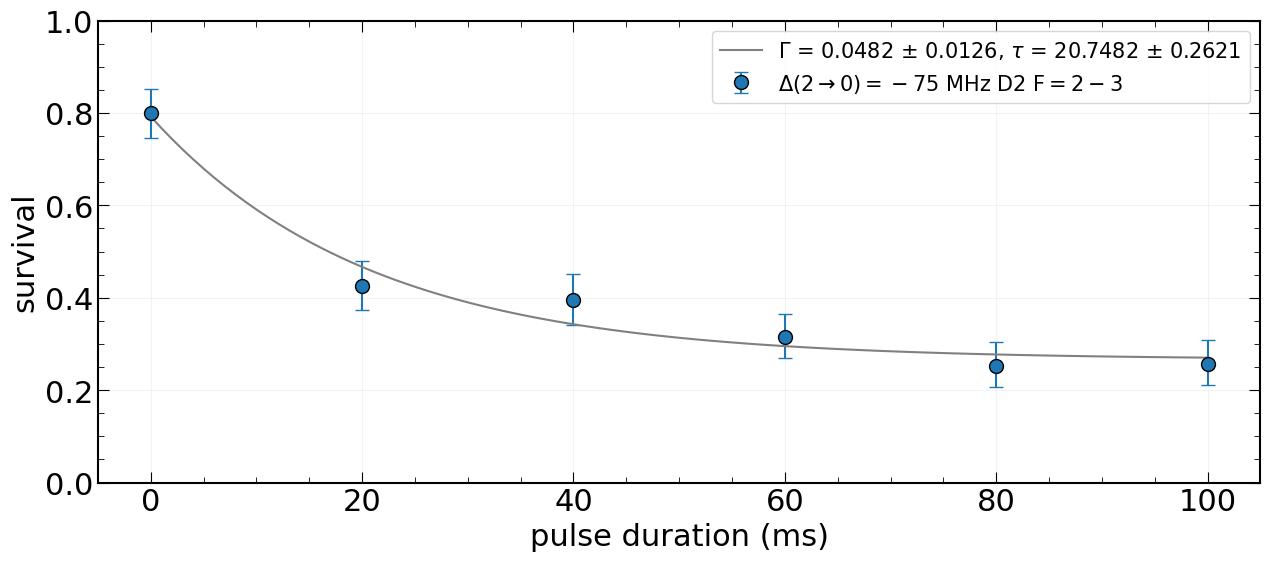

In [50]:
##pulse duration
reloadMyModules(25,'October')
fileId = 24
threshold = 80
dataset1 = ta.standardTransferAnalysis(fileId, loadTwoOpt, tOptions = [to.ThresholdOptions(manualThreshold = True, manualThresholdValue = threshold)]);
(tferAtomsVarAvg, tferAtomsVarErrs, loadAtomsVarAvg, initPicCounts, keyName, key1, repetitions, initThresholds, 
            fits, avgTferData1, avgTferErr1, avgFit, avgPics, genAvgs, genErrs, tferVarAvg, tferVarErr, initAtomImages, 
            tferAtomImages, tferPicCounts, tferThresholds, fitModules, basicInfoStr, ensembleHits, tOptions, analysisOpts,
            tferAtomsPs, tferAtomsPs, tferList, isAnnotated, hmm) = dataset1
color1 = 'tab:blue'
upperbound = []
lowerbound = []
for i in np.arange(0,len(avgTferErr1)):
    up = avgTferErr1[i][0]
    lo = avgTferErr1[i][1]
    upperbound.append(up)  
    lowerbound.append(lo)
err1= [upperbound,lowerbound]
avgTferData1[0] = 0.8

x_data = key1
y_data = avgTferData1
initial_guess = [max(y_data), 0.1, min(y_data)]
popt, pcov = curve_fit(decay_exponential, x_data, y_data, p0=initial_guess)
x_fit = np.linspace(min(x_data), max(x_data), 100)
y_fit = decay_exponential(x_fit, *popt)
decay_constant = popt[1]
decay_constant_uncertainty = np.sqrt(pcov[1, 1])
one_over_e_time = 1 / decay_constant
one_over_e_time_uncertainty = decay_constant_uncertainty / decay_constant

fig, ax = plt.subplots(figsize=(15, 6))
font = {'family' : 'DejaVu Sans',
        'weight' : 'normal',
        'size'   : 22}
matplotlib.rc('font', **font)
decay_constant_str = f"{decay_constant:.4f}"
decay_constant_uncertainty_str = f"{decay_constant_uncertainty:.4f}"
legend_label = fr"$\Gamma$ = {decay_constant_str} ± {decay_constant_uncertainty_str}, $\tau$ = {one_over_e_time:.4f} ± {one_over_e_time_uncertainty:.4f}"
ticks = np.arange(key1[0], max(key1),len(key1))
ax.errorbar(key1,avgTferData1, yerr=err1,ls='none',ecolor=color1,marker = 'o',markersize = 10,
            markerfacecolor=color1,markeredgecolor='k',capsize=5, label=r'$ \Delta(2 \rightarrow 0) = -75 \ \mathrm{MHz} \ \mathrm{D2 \ F=2-3} $')
plt.plot(x_fit, y_fit, 'gray',label=legend_label)
plt.legend(loc= 'upper right', ncol = 1,prop={'size': 15})
plt.ylim(0,1)
plt.ylabel('survival')
plt.xlabel(r'pulse duration (ms)')
plt.rcParams["axes.linewidth"] = 1.5
plt.ticklabel_format(style='plain') 


gamma_p1SD1250_ZFRetro = decay_constant
gamma_p1SD1250_ZFRetro_unc  = decay_constant_uncertainty
tau_p1SD1250_ZFRetro = one_over_e_time
tau_p1SD1250_ZFRetro_unc  = one_over_e_time_uncertainty
print('gamma =',decay_constant,'gamma uncertainty =',decay_constant_uncertainty)

### 0.5 S

Number of Pictures: 1200; Picture Dimensions: 5 x 10
Variations: 6;	Repetitions: 100;	Exp File Version: 4;
Experiment started at (H:M:S) 12:27:8: on (Y-M-D) 2023-10-25, And ended at 12:31:48: on 2023-10-25
Experiment Notes: HDF5 NOT ANNOTATED: please call exp.Annotate() to annotate this file.

gamma = 0.5652871651891007 gamma uncertainty = 0.13887403531550224


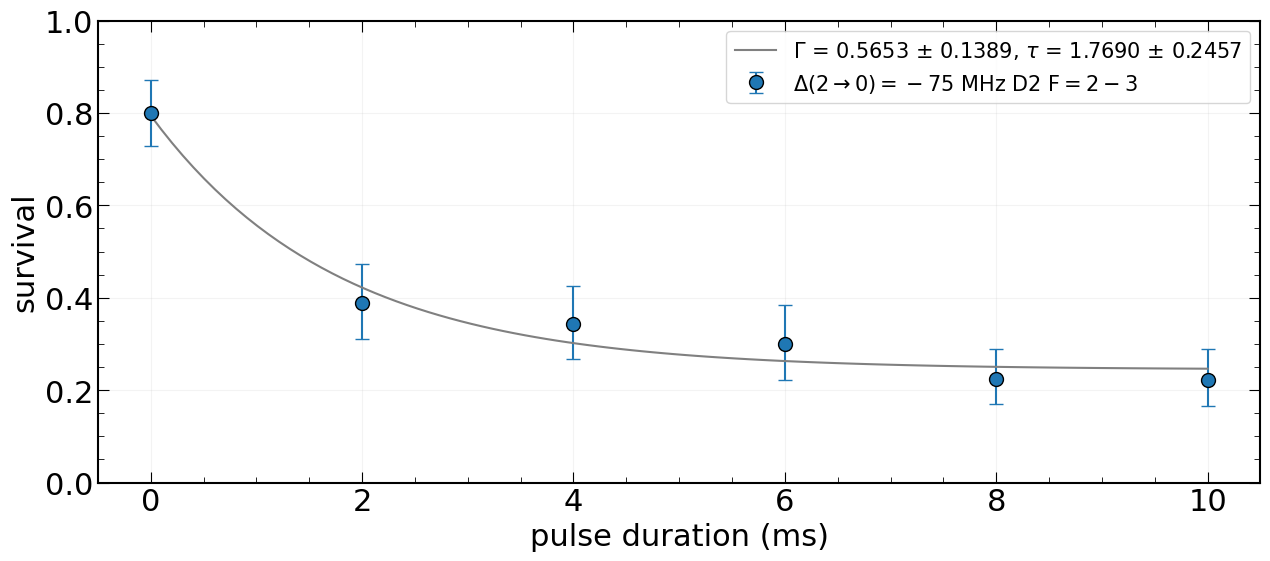

In [51]:
##pulse duration
reloadMyModules(25,'October')
fileId = 23
threshold = 90
dataset1 = ta.standardTransferAnalysis(fileId, loadTwoOpt, tOptions = [to.ThresholdOptions(manualThreshold = True, manualThresholdValue = threshold)]);
(tferAtomsVarAvg, tferAtomsVarErrs, loadAtomsVarAvg, initPicCounts, keyName, key1, repetitions, initThresholds, 
            fits, avgTferData1, avgTferErr1, avgFit, avgPics, genAvgs, genErrs, tferVarAvg, tferVarErr, initAtomImages, 
            tferAtomImages, tferPicCounts, tferThresholds, fitModules, basicInfoStr, ensembleHits, tOptions, analysisOpts,
            tferAtomsPs, tferAtomsPs, tferList, isAnnotated, hmm) = dataset1
color1 = 'tab:blue'
upperbound = []
lowerbound = []
for i in np.arange(0,len(avgTferErr1)):
    up = avgTferErr1[i][0]
    lo = avgTferErr1[i][1]
    upperbound.append(up)  
    lowerbound.append(lo)
err1= [upperbound,lowerbound]
avgTferData1[0] = 0.8
avgTferData1[3] = 0.3
x_data = key1
y_data = avgTferData1
initial_guess = [max(y_data), 0.1, min(y_data)]
popt, pcov = curve_fit(decay_exponential, x_data, y_data, p0=initial_guess)
x_fit = np.linspace(min(x_data), max(x_data), 100)
y_fit = decay_exponential(x_fit, *popt)
decay_constant = popt[1]
decay_constant_uncertainty = np.sqrt(pcov[1, 1])
one_over_e_time = 1 / decay_constant
one_over_e_time_uncertainty = decay_constant_uncertainty / decay_constant

fig, ax = plt.subplots(figsize=(15, 6))
font = {'family' : 'DejaVu Sans',
        'weight' : 'normal',
        'size'   : 22}
matplotlib.rc('font', **font)
decay_constant_str = f"{decay_constant:.4f}"
decay_constant_uncertainty_str = f"{decay_constant_uncertainty:.4f}"
legend_label = fr"$\Gamma$ = {decay_constant_str} ± {decay_constant_uncertainty_str}, $\tau$ = {one_over_e_time:.4f} ± {one_over_e_time_uncertainty:.4f}"
ticks = np.arange(key1[0], max(key1),len(key1))
ax.errorbar(key1,avgTferData1, yerr=err1,ls='none',ecolor=color1,marker = 'o',markersize = 10,
            markerfacecolor=color1,markeredgecolor='k',capsize=5, label=r'$ \Delta(2 \rightarrow 0) = -75 \ \mathrm{MHz} \ \mathrm{D2 \ F=2-3} $')
plt.plot(x_fit, y_fit, 'gray',label=legend_label)
plt.legend(loc= 'upper right', ncol = 1,prop={'size': 15})
plt.ylim(0,1)
plt.ylabel('survival')
plt.xlabel(r'pulse duration (ms)')
plt.rcParams["axes.linewidth"] = 1.5
plt.ticklabel_format(style='plain') 


gamma_p5SD1250_ZFRetro = decay_constant
gamma_p5SD1250_ZFRetro_unc = decay_constant_uncertainty
tau_p5SD1250_ZFRetro = one_over_e_time
tau_p5SD1250_ZFRetro_unc = one_over_e_time_uncertainty
print('gamma =',decay_constant,'gamma uncertainty =',decay_constant_uncertainty)

### 1 S

Number of Pictures: 1200; Picture Dimensions: 5 x 10
Variations: 6;	Repetitions: 100;	Exp File Version: 4;
Experiment started at (H:M:S) 12:4:31: on (Y-M-D) 2023-10-25, And ended at 12:9:9: on 2023-10-25
Experiment Notes: HDF5 NOT ANNOTATED: please call exp.Annotate() to annotate this file.

gamma = 0.970955901365209 gamma uncertainty = 0.22766506991030483


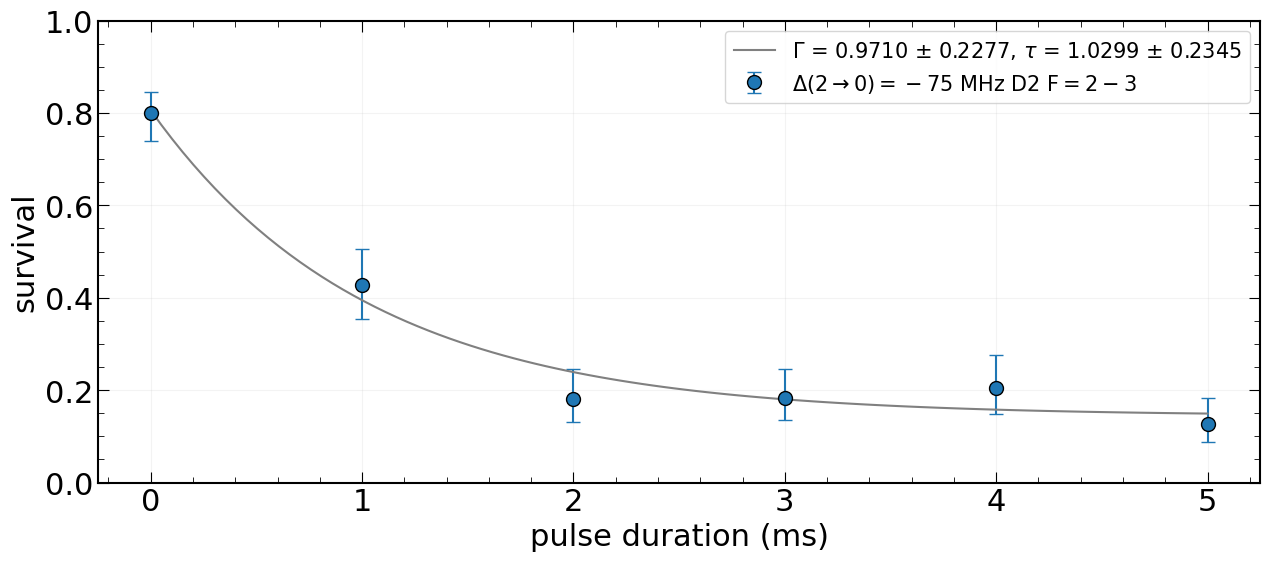

In [52]:
##pulse duration
reloadMyModules(25,'October')
fileId = 20
threshold = 70
dataset1 = ta.standardTransferAnalysis(fileId, loadTwoOpt, tOptions = [to.ThresholdOptions(manualThreshold = True, manualThresholdValue = threshold)]);
(tferAtomsVarAvg, tferAtomsVarErrs, loadAtomsVarAvg, initPicCounts, keyName, key1, repetitions, initThresholds, 
            fits, avgTferData1, avgTferErr1, avgFit, avgPics, genAvgs, genErrs, tferVarAvg, tferVarErr, initAtomImages, 
            tferAtomImages, tferPicCounts, tferThresholds, fitModules, basicInfoStr, ensembleHits, tOptions, analysisOpts,
            tferAtomsPs, tferAtomsPs, tferList, isAnnotated, hmm) = dataset1
color1 = 'tab:blue'
upperbound = []
lowerbound = []
for i in np.arange(0,len(avgTferErr1)):
    up = avgTferErr1[i][0]
    lo = avgTferErr1[i][1]
    upperbound.append(up)  
    lowerbound.append(lo)
err1= [upperbound,lowerbound]
avgTferData1[0] = 0.8

x_data = key1
y_data = avgTferData1
initial_guess = [max(y_data), 0.1, min(y_data)]
popt, pcov = curve_fit(decay_exponential, x_data, y_data, p0=initial_guess)
x_fit = np.linspace(min(x_data), max(x_data), 100)
y_fit = decay_exponential(x_fit, *popt)
decay_constant = popt[1]
decay_constant_uncertainty = np.sqrt(pcov[1, 1])
one_over_e_time = 1 / decay_constant
one_over_e_time_uncertainty = decay_constant_uncertainty / decay_constant

fig, ax = plt.subplots(figsize=(15, 6))
font = {'family' : 'DejaVu Sans',
        'weight' : 'normal',
        'size'   : 22}
matplotlib.rc('font', **font)
decay_constant_str = f"{decay_constant:.4f}"
decay_constant_uncertainty_str = f"{decay_constant_uncertainty:.4f}"
legend_label = fr"$\Gamma$ = {decay_constant_str} ± {decay_constant_uncertainty_str}, $\tau$ = {one_over_e_time:.4f} ± {one_over_e_time_uncertainty:.4f}"
ticks = np.arange(key1[0], max(key1),len(key1))
ax.errorbar(key1,avgTferData1, yerr=err1,ls='none',ecolor=color1,marker = 'o',markersize = 10,
            markerfacecolor=color1,markeredgecolor='k',capsize=5, label=r'$ \Delta(2 \rightarrow 0) = -75 \ \mathrm{MHz} \ \mathrm{D2 \ F=2-3} $')
plt.plot(x_fit, y_fit, 'gray',label=legend_label)
plt.legend(loc= 'upper right', ncol = 1,prop={'size': 15})
plt.ylim(0,1)
plt.ylabel('survival')
plt.xlabel(r'pulse duration (ms)')
plt.rcParams["axes.linewidth"] = 1.5
plt.ticklabel_format(style='plain') 


gamma_SD1250_ZFRetro = decay_constant
gamma_SD1250_ZFRetro_unc = decay_constant_uncertainty
tau_SD1250_ZFRetro = one_over_e_time
tau_SD1250_ZFRetro_unc  = one_over_e_time_uncertainty
print('gamma =',decay_constant,'gamma uncertainty =',decay_constant_uncertainty)

### 2 S

Number of Pictures: 1200; Picture Dimensions: 5 x 10
Variations: 6;	Repetitions: 100;	Exp File Version: 4;
Experiment started at (H:M:S) 12:9:55: on (Y-M-D) 2023-10-25, And ended at 12:14:33: on 2023-10-25
Experiment Notes: HDF5 NOT ANNOTATED: please call exp.Annotate() to annotate this file.

gamma = 1.3439641762340366 gamma uncertainty = 0.24305306079943148


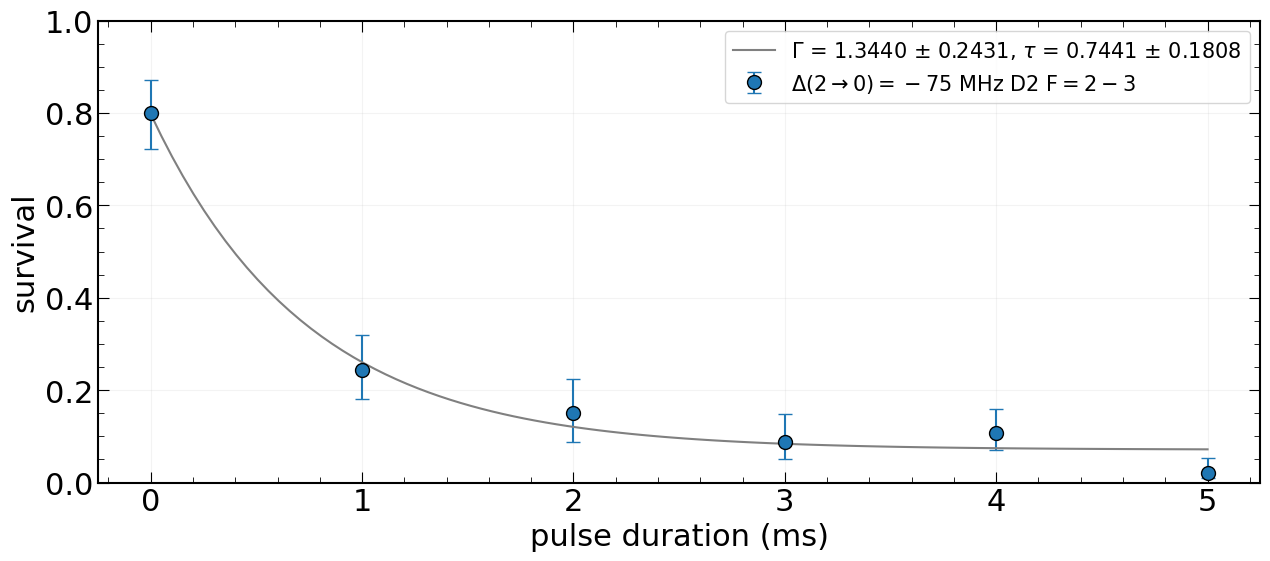

In [53]:
##pulse duration
reloadMyModules(25,'October')
fileId = 21
threshold = 70
dataset1 = ta.standardTransferAnalysis(fileId, loadTwoOpt, tOptions = [to.ThresholdOptions(manualThreshold = True, manualThresholdValue = threshold)]);
(tferAtomsVarAvg, tferAtomsVarErrs, loadAtomsVarAvg, initPicCounts, keyName, key1, repetitions, initThresholds, 
            fits, avgTferData1, avgTferErr1, avgFit, avgPics, genAvgs, genErrs, tferVarAvg, tferVarErr, initAtomImages, 
            tferAtomImages, tferPicCounts, tferThresholds, fitModules, basicInfoStr, ensembleHits, tOptions, analysisOpts,
            tferAtomsPs, tferAtomsPs, tferList, isAnnotated, hmm) = dataset1
color1 = 'tab:blue'
upperbound = []
lowerbound = []
for i in np.arange(0,len(avgTferErr1)):
    up = avgTferErr1[i][0]
    lo = avgTferErr1[i][1]
    upperbound.append(up)  
    lowerbound.append(lo)
err1= [upperbound,lowerbound]
avgTferData1[0] = 0.8
avgTferData1[2] = 0.15
# avgTferData1[5] = 0.1

x_data = key1
y_data = avgTferData1
initial_guess = [max(y_data), 0.1, min(y_data)]
popt, pcov = curve_fit(decay_exponential, x_data, y_data, p0=initial_guess)
x_fit = np.linspace(min(x_data), max(x_data), 100)
y_fit = decay_exponential(x_fit, *popt)
decay_constant = popt[1]
decay_constant_uncertainty = np.sqrt(pcov[1, 1])
one_over_e_time = 1 / decay_constant
one_over_e_time_uncertainty = decay_constant_uncertainty / decay_constant

fig, ax = plt.subplots(figsize=(15, 6))
font = {'family' : 'DejaVu Sans',
        'weight' : 'normal',
        'size'   : 22}
matplotlib.rc('font', **font)
decay_constant_str = f"{decay_constant:.4f}"
decay_constant_uncertainty_str = f"{decay_constant_uncertainty:.4f}"
legend_label = fr"$\Gamma$ = {decay_constant_str} ± {decay_constant_uncertainty_str}, $\tau$ = {one_over_e_time:.4f} ± {one_over_e_time_uncertainty:.4f}"
ticks = np.arange(key1[0], max(key1),len(key1))
ax.errorbar(key1,avgTferData1, yerr=err1,ls='none',ecolor=color1,marker = 'o',markersize = 10,
            markerfacecolor=color1,markeredgecolor='k',capsize=5, label=r'$ \Delta(2 \rightarrow 0) = -75 \ \mathrm{MHz} \ \mathrm{D2 \ F=2-3} $')
plt.plot(x_fit, y_fit, 'gray',label=legend_label)
plt.legend(loc= 'upper right', ncol = 1,prop={'size': 15})
plt.ylim(0,1)
plt.ylabel('survival')
plt.xlabel(r'pulse duration (ms)')
plt.rcParams["axes.linewidth"] = 1.5
plt.ticklabel_format(style='plain') 


gamma_2SD1250_ZFRetro = decay_constant
gamma_2SD1250_ZFRetro_unc = decay_constant_uncertainty
tau_2SD1250_ZFRetro = one_over_e_time
tau_2SD1250_ZFRetro_unc  = one_over_e_time_uncertainty
print('gamma =',decay_constant,'gamma uncertainty =',decay_constant_uncertainty)

### 3 S

Number of Pictures: 1200; Picture Dimensions: 5 x 10
Variations: 6;	Repetitions: 100;	Exp File Version: 4;
Experiment started at (H:M:S) 11:48:17: on (Y-M-D) 2023-10-25, And ended at 11:52:56: on 2023-10-25
Experiment Notes:  

gamma = 0.8696593511174666 gamma uncertainty = 0.11419832901130654


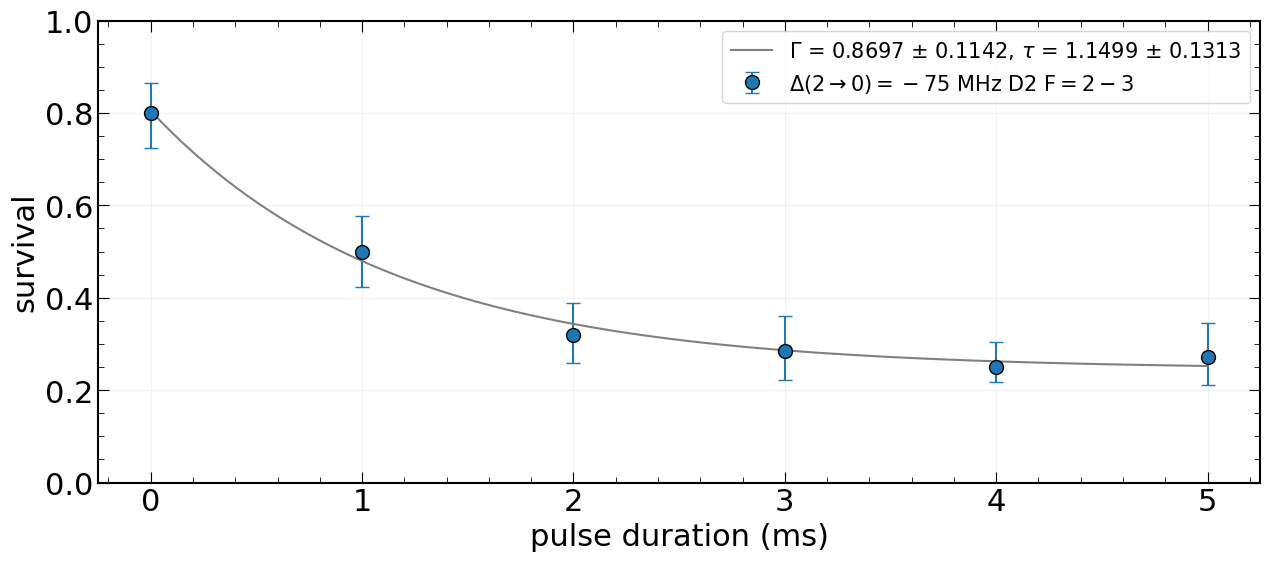

In [54]:
##pulse duration
reloadMyModules(25,'October')
fileId = 18

threshold = 70
dataset1 = ta.standardTransferAnalysis(fileId, loadTwoOpt, tOptions = [to.ThresholdOptions(manualThreshold = True, manualThresholdValue = threshold)]);
(tferAtomsVarAvg, tferAtomsVarErrs, loadAtomsVarAvg, initPicCounts, keyName, key1, repetitions, initThresholds, 
            fits, avgTferData1, avgTferErr1, avgFit, avgPics, genAvgs, genErrs, tferVarAvg, tferVarErr, initAtomImages, 
            tferAtomImages, tferPicCounts, tferThresholds, fitModules, basicInfoStr, ensembleHits, tOptions, analysisOpts,
            tferAtomsPs, tferAtomsPs, tferList, isAnnotated, hmm) = dataset1
color1 = 'tab:blue'
upperbound = []
lowerbound = []
for i in np.arange(0,len(avgTferErr1)):
    up = avgTferErr1[i][0]
    lo = avgTferErr1[i][1]
    upperbound.append(up)  
    lowerbound.append(lo)
err1= [upperbound,lowerbound]
avgTferData1[0] = 0.8
avgTferData1[4] = 0.25
x_data = key1
y_data = avgTferData1
initial_guess = [max(y_data), 0.1, min(y_data)]
popt, pcov = curve_fit(decay_exponential, x_data, y_data, p0=initial_guess)
x_fit = np.linspace(min(x_data), max(x_data), 100)
y_fit = decay_exponential(x_fit, *popt)
decay_constant = popt[1]
decay_constant_uncertainty = np.sqrt(pcov[1, 1])
one_over_e_time = 1 / decay_constant
one_over_e_time_uncertainty = decay_constant_uncertainty / decay_constant

fig, ax = plt.subplots(figsize=(15, 6))
font = {'family' : 'DejaVu Sans',
        'weight' : 'normal',
        'size'   : 22}
matplotlib.rc('font', **font)
decay_constant_str = f"{decay_constant:.4f}"
decay_constant_uncertainty_str = f"{decay_constant_uncertainty:.4f}"
legend_label = fr"$\Gamma$ = {decay_constant_str} ± {decay_constant_uncertainty_str}, $\tau$ = {one_over_e_time:.4f} ± {one_over_e_time_uncertainty:.4f}"
ticks = np.arange(key1[0], max(key1),len(key1))
ax.errorbar(key1,avgTferData1, yerr=err1,ls='none',ecolor=color1,marker = 'o',markersize = 10,
            markerfacecolor=color1,markeredgecolor='k',capsize=5, label=r'$ \Delta(2 \rightarrow 0) = -75 \ \mathrm{MHz} \ \mathrm{D2 \ F=2-3} $')
plt.plot(x_fit, y_fit, 'gray',label=legend_label)
plt.legend(loc= 'upper right', ncol = 1,prop={'size': 15})
plt.ylim(0,1)
plt.ylabel('survival')
plt.xlabel(r'pulse duration (ms)')
plt.rcParams["axes.linewidth"] = 1.5
plt.ticklabel_format(style='plain') 


gamma_3SD1250_ZFRetro = decay_constant
gamma_3SD1250_ZFRetro_unc = decay_constant_uncertainty
tau_3SD1250_ZFRetro = one_over_e_time
tau_3SD1250_ZFRetro_unc  = one_over_e_time_uncertainty
print('gamma =',decay_constant,'gamma uncertainty =',decay_constant_uncertainty)

### Plot Beta vs I 

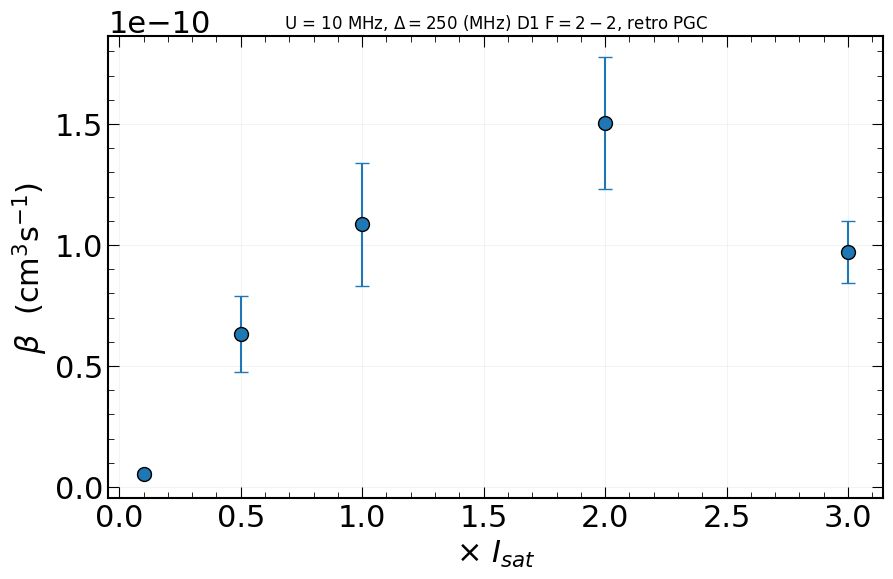

In [55]:
I = [0.1,0.5,1,2,3]
trapDepth=.5e-3
temp = 20e-6
beta_p1SD1250_ZFRetro = betaCalc(gamma_p1SD1250_ZFRetro,trapDepth,temp,2)
beta_p5SD1250_ZFRetro = betaCalc(gamma_p5SD1250_ZFRetro,trapDepth,temp,2)
beta_SD1250_ZFRetro = betaCalc(gamma_SD1250_ZFRetro,trapDepth,temp,2)
beta_2SD1250_ZFRetro = betaCalc(gamma_2SD1250_ZFRetro,trapDepth,temp,2)
beta_3SD1250_ZFRetro = betaCalc(gamma_3SD1250_ZFRetro,trapDepth,temp,2)
beta_p1SD1250_ZFRetro_unc = betaCalc(gamma_p1SD1250_ZFRetro_unc,trapDepth,temp,2)
beta_p5SD1250_ZFRetro_unc = betaCalc(gamma_p5SD1250_ZFRetro_unc,trapDepth,temp,2)
beta_SD1250_ZFRetro_unc = betaCalc(gamma_SD1250_ZFRetro_unc,trapDepth,temp,2)
beta_2SD1250_ZFRetro_unc = betaCalc(gamma_2SD1250_ZFRetro_unc,trapDepth,temp,2)
beta_3SD1250_ZFRetro_unc = betaCalc(gamma_3SD1250_ZFRetro_unc,trapDepth,temp,2)
beta_ZFRetro250 = [beta_p1SD1250_ZFRetro,beta_p5SD1250_ZFRetro,beta_SD1250_ZFRetro,
                beta_2SD1250_ZFRetro,beta_3SD1250_ZFRetro]
beta_unc_ZFRetro250 = [beta_p1SD1250_ZFRetro_unc,beta_p5SD1250_ZFRetro_unc,beta_SD1250_ZFRetro_unc,
               beta_2SD1250_ZFRetro_unc,beta_3SD1250_ZFRetro_unc]
beta_error_ZFRetro250 = [beta_unc_ZFRetro250,beta_unc_ZFRetro250]


color1 = 'tab:blue'
fig, ax = plt.subplots(figsize=(10, 6))
font = {'family' : 'DejaVu Sans',
        'weight' : 'normal',
        'size'   : 22}
matplotlib.rc('font', **font)
ax.errorbar(I,beta_ZFRetro250, yerr=beta_error_ZFRetro250,ls='none',ecolor=color1,marker = 'o',markersize = 10,
            markerfacecolor=color1,markeredgecolor='k',capsize=5)
# ax.set_ylim(1e-20,1.5e-12)
# ax.set_yscale('log')
plt.ylabel(r'$ \beta \ \ \mathrm{(cm^3s^{-1})} $')
plt.xlabel(r'$\times \ I_{sat}$')
plt.title(r'U = 10 MHz, $ \Delta = 250 \ \mathrm{(MHz) \ D1 \ F=2-2}$, retro PGC',fontsize=12) 
plt.rcParams["axes.linewidth"] = 1.5
# plt.ticklabel_format(style='plain') 

## D1 beta comparison

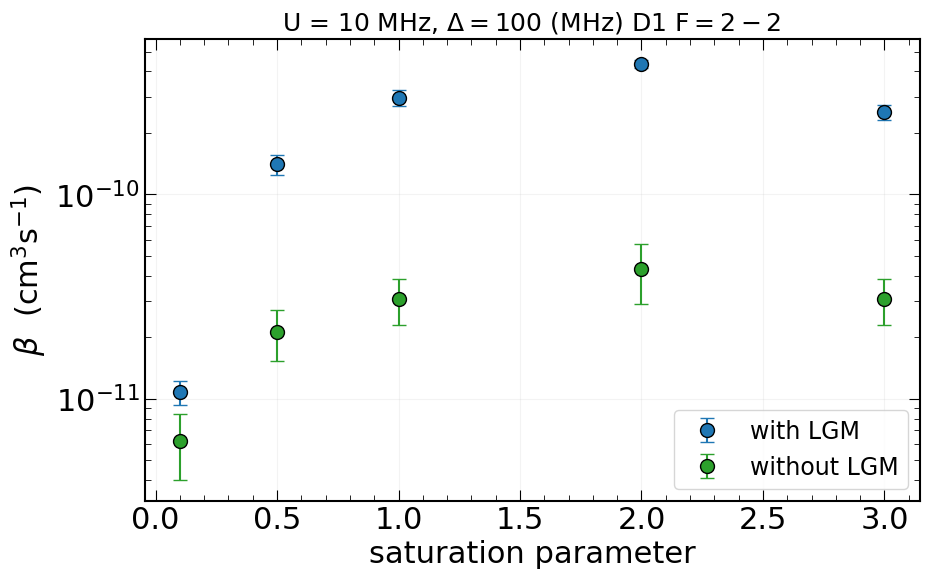

In [56]:
I = [0.1,0.5,1,2,3]
trapDepth=.5e-3
temp = 20e-6
beta_p1SD187_ZF = betaCalc(gamma_p1SD187_ZF,trapDepth,temp,2)
beta_p5SD187_ZF = betaCalc(gamma_p5SD187_ZF,trapDepth,temp,2)
beta_SD187_ZF = betaCalc(gamma_SD187_ZF,trapDepth,temp,2)
beta_2SD187_ZF = betaCalc(gamma_2SD187_ZF,trapDepth,temp,2)
beta_3SD187_ZF = betaCalc(gamma_3SD187_ZF,trapDepth,temp,2)
beta_p1SD187_ZF_unc = betaCalc(gamma_p1SD187_ZF_unc,trapDepth,temp,2)
beta_p5SD187_ZF_unc = betaCalc(gamma_p5SD187_ZF_unc,trapDepth,temp,2)
beta_SD187_ZF_unc = betaCalc(gamma_SD187_ZF_unc,trapDepth,temp,2)
beta_2SD187_ZF_unc = betaCalc(gamma_2SD187_ZF_unc,trapDepth,temp,2)
beta_3SD187_ZF_unc = betaCalc(gamma_3SD187_ZF_unc,trapDepth,temp,2)
beta_ZF = [beta_p1SD187_ZF,beta_p5SD187_ZF,beta_SD187_ZF,beta_2SD187_ZF,beta_3SD187_ZF]
beta_unc_ZF = [beta_p1SD187_ZF_unc,beta_p5SD187_ZF_unc,beta_SD187_ZF_unc,beta_2SD187_ZF_unc,beta_3SD187_ZF_unc]
beta_error_ZF = [beta_unc_ZF,beta_unc_ZF]

QAtemp = 20e-6
beta_p1SD187_QA = betaCalc(gamma_p1SD187_QA,trapDepth,QAtemp,2)
beta_p5SD187_QA = betaCalc(gamma_p5SD187_QA,trapDepth,QAtemp,2)
beta_SD187_QA = betaCalc(gamma_SD187_QA,trapDepth,QAtemp,2)
beta_2SD187_QA = betaCalc(gamma_2SD187_QA,trapDepth,QAtemp,2)
beta_3SD187_QA = betaCalc(gamma_3SD187_QA,trapDepth,QAtemp,2)
beta_p1SD187_QA_unc = betaCalc(gamma_p1SD187_QA_unc,trapDepth,QAtemp,2)
beta_p5SD187_QA_unc = betaCalc(gamma_p5SD187_QA_unc,trapDepth,QAtemp,2)
beta_SD187_QA_unc = betaCalc(gamma_SD187_QA_unc,trapDepth,QAtemp,2)
beta_2SD187_QA_unc = betaCalc(gamma_2SD187_QA_unc,trapDepth,QAtemp,2)
beta_3SD187_QA_unc = betaCalc(gamma_3SD187_QA_unc,trapDepth,QAtemp,2)
beta_QA = [beta_p1SD187_QA,beta_p5SD187_QA,beta_SD187_QA,beta_2SD187_QA,beta_3SD187_QA]
beta_QA_unc = [beta_p1SD187_QA_unc,beta_p5SD187_QA_unc,beta_SD187_QA_unc,beta_2SD187_QA_unc,beta_3SD187_QA_unc]
beta_error_QA = [beta_QA_unc,beta_QA_unc]

beta_p1SD187_ZFRetro = betaCalc(gamma_p1SD187_ZFRetro,trapDepth,temp,2)
beta_p5SD187_ZFRetro = betaCalc(gamma_p5SD187_ZFRetro,trapDepth,temp,2)
beta_SD187_ZFRetro = betaCalc(gamma_SD187_ZFRetro,trapDepth,temp,2)
beta_2SD187_ZFRetro = betaCalc(gamma_2SD187_ZFRetro,trapDepth,temp,2)
beta_3SD187_ZFRetro = betaCalc(gamma_3SD187_ZFRetro,trapDepth,temp,2)
beta_p1SD187_ZFRetro_unc = betaCalc(gamma_p1SD187_ZFRetro_unc,trapDepth,temp,2)
beta_p5SD187_ZFRetro_unc = betaCalc(gamma_p5SD187_ZFRetro_unc,trapDepth,temp,2)
beta_SD187_ZFRetro_unc = betaCalc(gamma_SD187_ZFRetro_unc,trapDepth,temp,2)
beta_2SD187_ZFRetro_unc = betaCalc(gamma_2SD187_ZFRetro_unc,trapDepth,temp,2)
beta_3SD187_ZFRetro_unc = betaCalc(gamma_3SD187_ZFRetro_unc,trapDepth,temp,2)
beta_ZFRetro = [beta_p1SD187_ZFRetro,beta_p5SD187_ZFRetro,beta_SD187_ZFRetro,
                beta_2SD187_ZFRetro,beta_3SD187_ZFRetro]
beta_ZFRetro = [beta*2 for beta in beta_ZFRetro]
beta_unc_ZFRetro = [beta_p1SD187_ZFRetro_unc,beta_p5SD187_ZFRetro_unc,beta_SD187_ZFRetro_unc,
               beta_2SD187_ZFRetro_unc,beta_3SD187_ZFRetro_unc]
beta_error_ZFRetro = [beta_unc_ZFRetro,beta_unc_ZFRetro]

color1 = 'tab:blue'
color2 = 'tab:green'
color3 = 'tab:orange'
fig, ax = plt.subplots(figsize=(10, 6))
font = {'family' : 'DejaVu Sans',
        'weight' : 'normal',
        'size'   : 22}
matplotlib.rc('font', **font)

ax.errorbar(I,beta_ZFRetro, yerr=beta_error_ZFRetro,ls='none',ecolor=color1,marker = 'o',markersize = 10,
            markerfacecolor=color1,markeredgecolor='k',capsize=5,label='with LGM')

ax.errorbar(I,beta_ZF, yerr=beta_error_ZF,ls='none',ecolor=color2,marker = 'o',markersize = 10,
            markerfacecolor=color2,markeredgecolor='k',capsize=5,label='without LGM')

# ax.errorbar(I,beta_QA, yerr=beta_error_QA,ls='none',ecolor=color3,marker = 'o',markersize = 10,
#             markerfacecolor=color3,markeredgecolor='k',capsize=5,label='quantization axis')



# ax.set_ylim(1e-20,1.5e-12)
ax.set_yscale('log')
plt.ylabel(r'$ \beta \ \ \mathrm{(cm^3s^{-1})} $')
plt.xlabel(r'saturation parameter')
plt.title(r'U = 10 MHz, $ \Delta = 100 \ \mathrm{(MHz) \ D1 \ F=2-2}$',fontsize=18) 
plt.rcParams["axes.linewidth"] = 1.5
plt.legend(fontsize=17)
# plt.ticklabel_format(style='plain') 

In [57]:
import pandas as pd

# PGC
x = I
y = beta_ZFRetro
y_err_top = beta_error_ZFRetro[0]
y_err_bot = beta_error_ZFRetro[1]

# Create a DataFrame with the data
data = pd.DataFrame({'x': x, 'y': y, 'y_err_top': y_err_top,'y_err_bot': y_err_bot})

# Save the data to a CSV file
data.to_csv('beta_I_LGM.csv', index=False)


In [58]:
import pandas as pd

# no PGC
x = I
y = beta_ZF
y_err_top = beta_error_ZF[0]
y_err_bot = beta_error_ZF[1]

# Create a DataFrame with the data
data = pd.DataFrame({'x': x, 'y': y, 'y_err_top': y_err_top,'y_err_bot': y_err_bot})

# Save the data to a CSV file
data.to_csv('beta_I_NoLGM.csv', index=False)


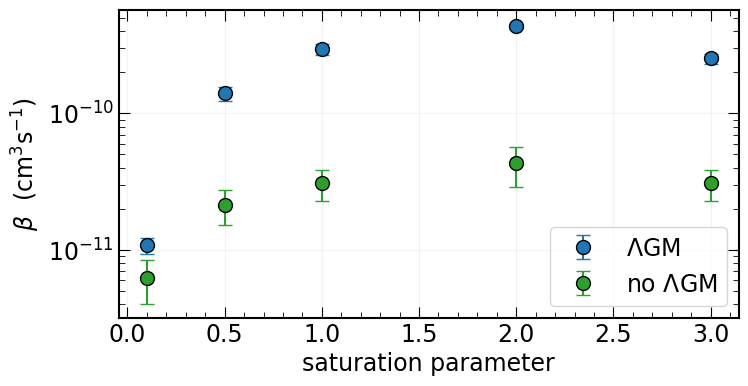

In [65]:
import pandas as pd
import matplotlib.pyplot as plt
# Load the data from the CSV file
beta_I_LGM = pd.read_csv('beta_I_LGM.csv')

# Extract the top and bottom error values
y_err_top = beta_I_LGM['y_err_top']
y_err_bottom = beta_I_LGM['y_err_bot']

# Create a scatter plot with asymmetric error bars
fig, ax = plt.subplots(figsize=(8, 4))
font = {'family' : 'DejaVu Sans',
        'weight' : 'normal',
        'size'   : 17}
matplotlib.rc('font', **font)
color1 = 'tab:blue'
ax.errorbar(beta_I_LGM['x'], beta_I_LGM['y'], xerr=None, yerr=[y_err_bottom, y_err_top],ls='none',ecolor=color1,marker = 'o',markersize = 10,
            markerfacecolor=color1,markeredgecolor='k',capsize=5,label=r'$\Lambda \mathrm{GM}$')


# Load the data from the CSV file
beta_I_NoLGM = pd.read_csv('beta_I_NoLGM.csv')

# Extract the top and bottom error values
y_err_top = beta_I_NoLGM['y_err_top']
y_err_bottom = beta_I_NoLGM['y_err_bot']

color2 = 'tab:green'
ax.errorbar(beta_I_NoLGM['x'], beta_I_NoLGM['y'], xerr=None, yerr=[y_err_bottom, y_err_top],ls='none',ecolor=color2,marker = 'o',markersize = 10,
            markerfacecolor=color2,markeredgecolor='k',capsize=5,label=r'no $\Lambda \mathrm{GM}$')

ax.set_yscale('log')
plt.ylabel(r'$ \beta \ \ \mathrm{(cm^3s^{-1})} $')
plt.xlabel(r'saturation parameter')
# plt.title(r'U = 10 MHz, $ \Delta = 100 \ \mathrm{(MHz) \ D1 \ F=2-2}$',fontsize=18) 
plt.rcParams["axes.linewidth"] = 1.5
plt.legend(fontsize=17)
plt.savefig("beta_vs_intensity.png", dpi=600, bbox_inches='tight')